In [463]:
import glob
import sqlite3
import pandasql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sweetviz as sv
import dtale
from statannotations.Annotator import Annotator
from itertools import combinations
import matplotlib.font_manager
import itertools
from itertools import permutations

In [464]:
df = pd.read_csv('data/community_dataset.csv')

distance_to_vasculature — расстояние до ближайших сосудов;

distance_to_largest_cell — расстояние до ближайшей крупной клетки;

immune_marker_1 — экспрессия иммунного маркера 1 в данной клетке;

immune_marker_2 — экспрессия иммунного маркера 2 в данной клетке;

cell_interaction - микроокружение;

cell_type — тип клетки;

area_of_cell — размер клетки;

case_id — уникальный ID пациента.


In [465]:
df.head()

distance_to_vasculature  distance_to_largest_cell  immune_marker_1  \
0               988.509380                612.076506        10.803755   
1               787.852379                637.787202        11.749179   
2               960.635580                700.283468        15.124372   
3               702.033032                676.409695        14.221883   
4               830.399371                863.269930        19.978977   

   immune_marker_2 cell_interaction     cell_type  case_id  area_of_cell  \
0       187.998971      community_1  Stroma cells      891           185   
1       155.357076      community_1  Stroma cells      891           209   
2       182.626888      community_2  Stroma cells      891           254   
3       158.381917      community_3  Unclassified      891           156   
4       159.071269      community_3  Unclassified      891           194   

     age_group  
0  elder_group  
1  elder_group  
2  elder_group  
3  elder_group  
4  elder_group

    1 вопрос. Есть ли стат-значимость между типом клетки и:
В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

а) Размером клетки (area_of_cell), добавьте hue по возрастным группам.



Здесь попробую сравнить по двум выборкам: 1 - молодые, 2 - пожилые, выборка из определенной группы клеток. Поэтому мы сравниваем 2 выборки с 1 зависимой переменной (размер клетки) - и поэтому мы можем использовать t-test_ind (парный t-test)

In [466]:
H0 = 'Размеры клеток равны'
HA = 'Размеры клеток отличаются'

In [467]:
df['cell_type'] = df['cell_type'].astype('category')
df['cell_interaction'] = df['cell_interaction'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269442 entries, 0 to 269441
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   distance_to_vasculature   269442 non-null  float64 
 1   distance_to_largest_cell  269442 non-null  float64 
 2   immune_marker_1           269442 non-null  float64 
 3   immune_marker_2           269442 non-null  float64 
 4   cell_interaction          269442 non-null  category
 5   cell_type                 269442 non-null  category
 6   case_id                   269442 non-null  int64   
 7   area_of_cell              269442 non-null  int64   
 8   age_group                 269442 non-null  category
dtypes: category(3), float64(4), int64(2)
memory usage: 13.1 MB


In [468]:
df['cell_type'].nunique()

8

In [469]:
df.groupby(['cell_type', 'age_group'])['area_of_cell'].describe()

count         mean          std    min     25%  \
cell_type     age_group                                                        
Blood cells   elder_group     521.0   328.142035   134.964251   79.0  218.00   
              young_group    2297.0   326.284284   123.729884   72.0  237.00   
Bone cells    elder_group     391.0   308.521739   114.840152  107.0  224.00   
              young_group    2164.0   290.379852   104.941002   90.0  217.00   
Immune type 1 elder_group    1583.0   255.677827   103.619068   63.0  185.00   
              young_group    3992.0   244.812876    94.409429   63.0  181.00   
Immune type 2 elder_group    7557.0   227.658330    69.374779   59.0  175.00   
              young_group    8647.0   221.531167    75.839323   65.0  163.00   
Largest cells elder_group     879.0   613.687144   806.572420   79.0  188.00   
              young_group    1109.0  1460.441839  1234.883968   62.0  329.00   
Stroma cells  elder_group   45784.0   244.781365    94.682794   57.0  179.00   
              young_group  127408.0   254.555703    93.795775   52.0  188.00   
Unclassified  elder_group   23735.0   225.895344    89.405947   59.0  169.00   
              young_group   43231.0   235.383336   102.661999   45.0  168.00   
Vasculature   elder_group      92.0   244.684783   108.452038   96.0  174.75   
              young_group      52.0   231.173077    77.100322  125.0  175.00   

                              50%      75%     max  
cell_type     age_group                             
Blood cells   elder_group   304.0   405.00   766.0  
              young_group   313.0   393.00   782.0  
Bone cells    elder_group   293.0   366.50   762.0  
              young_group   276.0   340.00   803.0  
Immune type 1 elder_group   240.0   303.00  1005.0  
              young_group   229.0   289.00  1052.0  
Immune type 2 elder_group   220.0   275.00   439.0  
              young_group   206.0   271.00   441.0  
Largest cells elder_group   263.0   576.00  6807.0  
              young_group  1099.0  2320.00  6311.0  
Stroma cells  elder_group   229.0   292.00  1035.0  
              young_group   240.0   303.00  1055.0  
Unclassified  elder_group   210.0   264.00  2371.0  
              young_group   214.0   278.00  3200.0  
Vasculature   elder_group   217.0   292.75   674.0  
              young_group   210.0   269.50   487.0

In [470]:
cell_type_group = pd.pivot_table(
    data=df,
    index=['cell_type','age_group'],
    values=['area_of_cell']
)

cell_type_group.head()

area_of_cell
cell_type     age_group                
Blood cells   elder_group    328.142035
              young_group    326.284284
Bone cells    elder_group    308.521739
              young_group    290.379852
Immune type 1 elder_group    255.677827

In [471]:
report = dtale.show(df)
report

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\views.py:746: FutureWarning:

['cell_interaction', 'cell_type', 'age_group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



По разведовательному анализу данных вижу, что распределение колонки "area_of_cell" близко к лог-нормалону, теперь попробуем самстоятельно проверить

In [472]:
stats.shapiro(df['area_of_cell'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.48864686489105225, pvalue=0.0)

In [473]:
stats.normaltest(df['area_of_cell'])

NormaltestResult(statistic=466941.97446327074, pvalue=0.0)

((array([-4.55878463, -4.36887615, -4.26588095, ...,  4.26588095,
          4.36887615,  4.55878463]),
  array([3.8286414 , 3.97029191, 3.98898405, ..., 8.7384149 , 8.75020786,
         8.82585367])),
 (0.37637688365056815, 5.451617570927533, 0.9859438319526949))

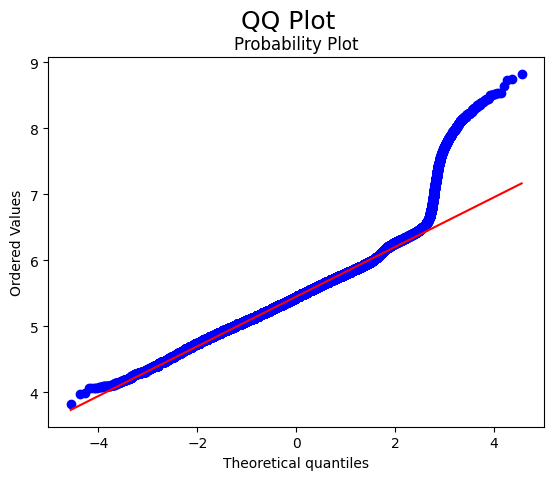

In [474]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(df['area_of_cell']), dist="norm", plot=ax1
)

    Сначала я попробую долгий способ сравнения размера клеток по возрастам

In [475]:
H0 = "Клетки равны по размеру у людей разного возраста"
HA = 'Клетки не равны по размеру'

In [476]:
df['cell_type'].unique()

['Stroma cells', 'Unclassified', 'Immune type 2', 'Blood cells', 'Bone cells', 'Largest cells', 'Immune type 1', 'Vasculature']
Categories (8, object): ['Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2', 'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature']

In [477]:
Stroma_cells = df[(df['cell_type']=='Stroma cells')]

((array([-4.46506719, -4.27135065, -4.1661616 , ...,  4.1661616 ,
          4.27135065,  4.46506719]),
  array([3.97029191, 3.98898405, 4.06044301, ..., 6.94312242, 6.94408721,
         6.96224346])),
 (0.3547561720809702, 5.469741479481213, 0.9992455836406079))

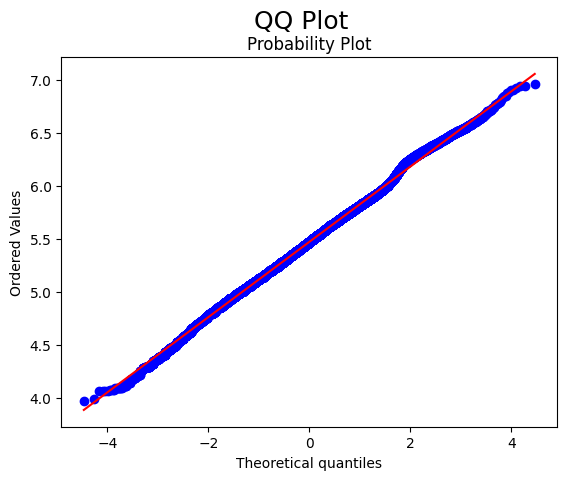

In [478]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Stroma_cells['area_of_cell']), dist="norm", plot=ax1
)

In [479]:
stats.shapiro(Stroma_cells['area_of_cell'])

ShapiroResult(statistic=0.9243260025978088, pvalue=0.0)

elder_group vs. young_group: t-test independent samples, P_val:4.762e-81 t=-1.908e+01


(<AxesSubplot: title={'center': 'Stroma cells'}, xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d6b7151670>])

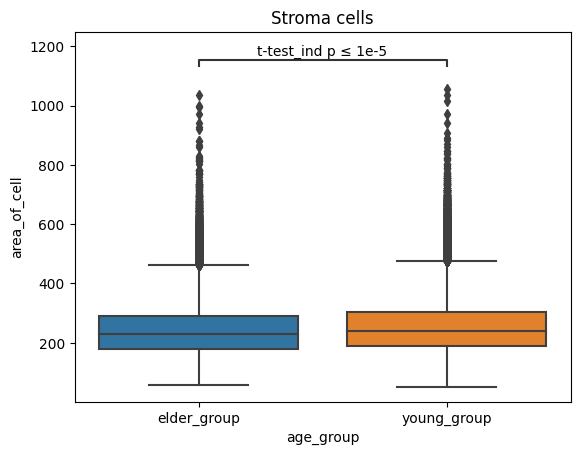

In [480]:
x='age_group'
y='area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))

ax = sns.boxplot(data=Stroma_cells, x='age_group', y='area_of_cell')
plt.title('Stroma cells')

annotator = Annotator(ax, pairs, data=Stroma_cells, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='inside')
annotator.apply_and_annotate()

In [481]:
Unclassified = df[df['cell_type']=='Unclassified']
Unclassified

distance_to_vasculature  distance_to_largest_cell  immune_marker_1  \
3                    702.033032                676.409695        14.221883   
4                    830.399371                863.269930        19.978977   
5                    812.104009                845.400332        17.557133   
9                    810.869444                687.209613        16.600478   
10                   766.624118                699.938237        22.002075   
...                         ...                       ...              ...   
269412               933.366096               1061.980943         4.625777   
269425               962.382450                773.724088        10.116604   
269429              1186.013536                815.514952         7.690244   
269432              1235.761624                872.789510        10.452193   
269439               754.601247                688.651619        10.351852   

        immune_marker_2 cell_interaction     cell_type  case_id  area_of_cell  \
3            158.381917      community_3  Unclassified      891           156   
4            159.071269      community_3  Unclassified      891           194   
5            172.700050      community_3  Unclassified      891           196   
9            210.507683      community_3  Unclassified      891           140   
10           229.014747      community_3  Unclassified      891           170   
...                 ...              ...           ...      ...           ...   
269412        13.900044      community_3  Unclassified      983           140   
269425        29.037607      community_5  Unclassified      983           288   
269429        32.580612      community_6  Unclassified      983           166   
269432        41.964221      community_4  Unclassified      983           168   
269439        22.967870      community_3  Unclassified      983           190   

          age_group  
3       elder_group  
4       elder_group  
5       elder_group  
9       elder_group  
10      elder_group  
...             ...  
269412  young_group  
269425  young_group  
269429  young_group  
269432  young_group  
269439  young_group  

[66966 rows x 9 columns]

In [482]:
stats.shapiro(Unclassified['area_of_cell'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.8322182297706604, pvalue=0.0)

((array([-4.25718873, -4.05446531, -3.94405627, ...,  3.94405627,
          4.05446531,  4.25718873]),
  array([3.8286414 , 4.06044301, 4.09434456, ..., 7.88419993, 7.91388671,
         8.07121854])),
 (0.36742061554930944, 5.3799737873751985, 0.9966093636830307))

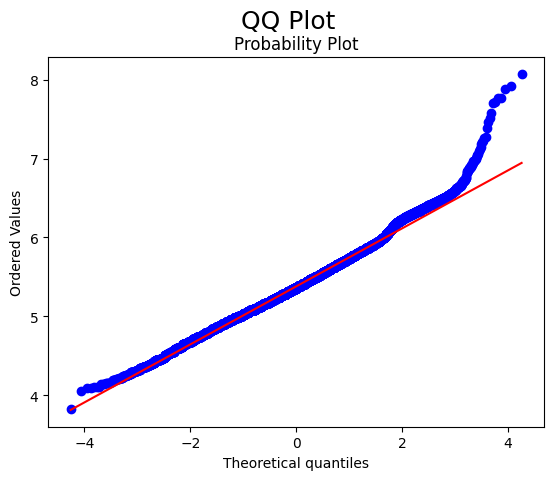

In [483]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Unclassified['area_of_cell']), dist="norm", plot=ax1
)

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:6.329e-13 U_stat=4.958e+08


(<AxesSubplot: title={'center': 'Unclassified'}, xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d69e87ffa0>])

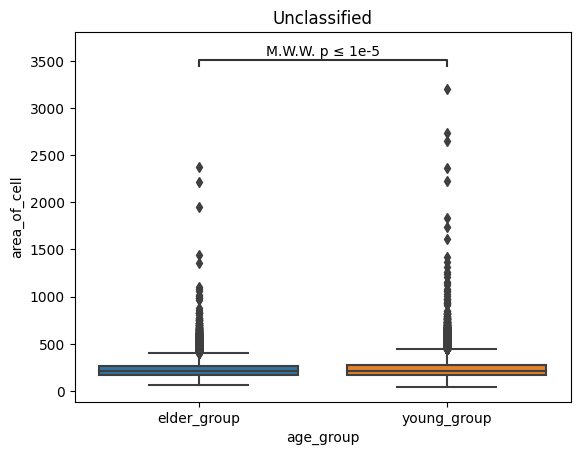

In [484]:
x='age_group'
y='area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))

ax = sns.boxplot(data=Unclassified, x='age_group', y='area_of_cell')
plt.title('Unclassified')

annotator = Annotator(ax, pairs, data=Unclassified, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='simple', loc='inside')
annotator.apply_and_annotate()

In [485]:
Immune_type_2 = df[df['cell_type']=='Immune type 2']
Immune_type_2.head()

distance_to_vasculature  distance_to_largest_cell  immune_marker_1  \
35               578.795873                604.065091        28.111050   
36               627.113559                636.046148        31.701647   
44               576.109024                637.306127        50.650625   
60               794.976218                603.989367        15.021383   
63               790.529070               1320.641427        14.800876   

    immune_marker_2 cell_interaction      cell_type  case_id  area_of_cell  \
35       117.141031      community_2  Immune type 2      891           223   
36       136.872857      community_2  Immune type 2      891           214   
44       350.538476      community_2  Immune type 2      891           221   
60       152.144077      community_3  Immune type 2      891           281   
63       168.830195      community_1  Immune type 2      891           215   

      age_group  
35  elder_group  
36  elder_group  
44  elder_group  
60  elder_group  
63  elder_group

((array([-3.92829348, -3.7095108 , -3.58968041, ...,  3.58968041,
          3.7095108 ,  3.92829348]),
  array([4.09434456, 4.17438727, 4.18965474, ..., 6.08677473, 6.08677473,
         6.09130988])),
 (0.32846327005579296, 5.364755862594037, 0.9961613865796569))

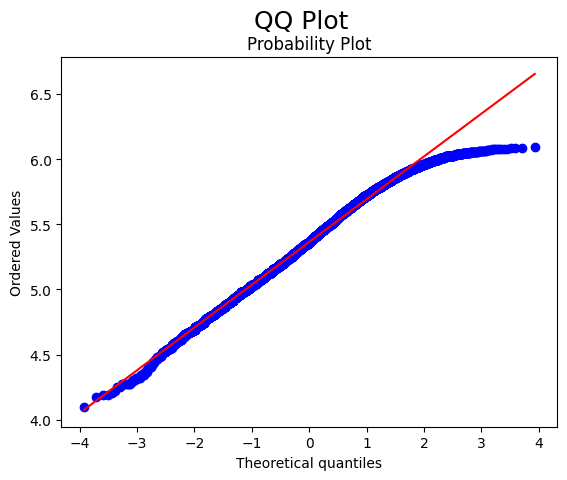

In [486]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Immune_type_2['area_of_cell']), dist="norm", plot=ax1
)

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.074e-16 U_stat=3.510e+07


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d69e80db80>])

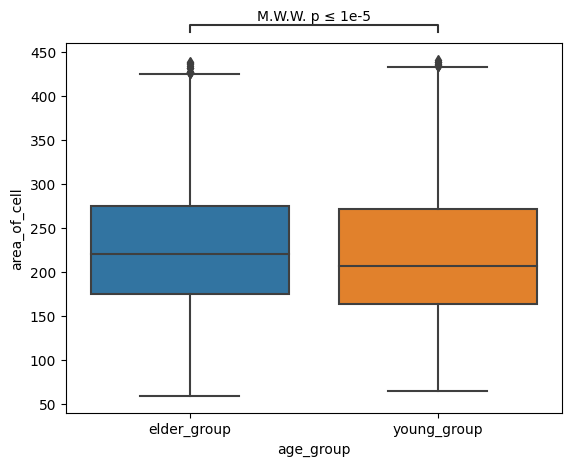

In [487]:
x='age_group'
y='area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))

ax = sns.boxplot(data=Immune_type_2, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Immune_type_2, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='simple', loc='outside')
annotator.apply_and_annotate()

((array([-3.66364926, -3.43001498, -3.30133217, ...,  3.30133217,
          3.43001498,  3.66364926]),
  array([4.15888308, 4.15888308, 4.18965474, ..., 6.88448665, 6.91373735,
         6.95939851])),
 (0.3633702016311378, 5.449660063892482, 0.9986239861749692))

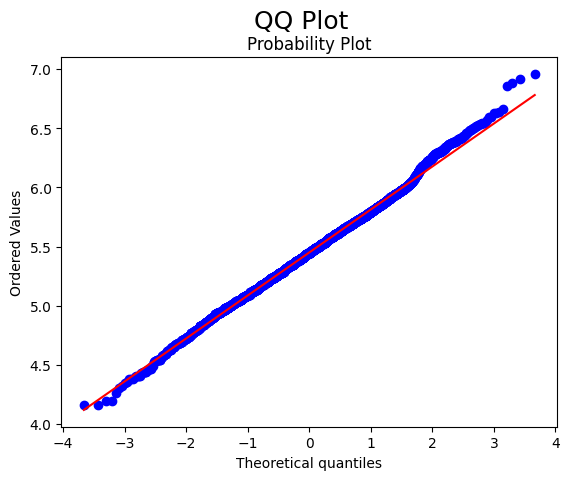

In [488]:
Immune_type_1 = df[df['cell_type']=='Immune type 1']

fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Immune_type_1['area_of_cell']), dist="norm", plot=ax1
)

In [489]:
stats.shapiro(Immune_type_1['area_of_cell'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.8993671536445618, pvalue=0.0)

elder_group vs. young_group: t-test independent samples, P_val:1.671e-04 t=3.767e+00


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d6b412db50>])

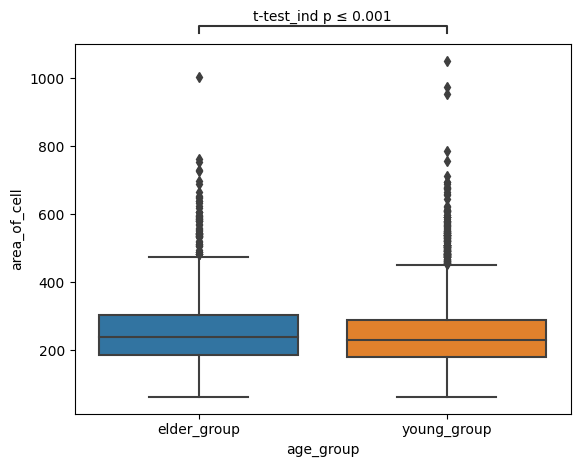

In [490]:
x='age_group'
y='area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))

ax = sns.boxplot(data=Immune_type_1, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Immune_type_1, x=x, y=y)
annotator.configure(test='t-test_ind', text_format='simple', loc='outside')
annotator.apply_and_annotate()

((array([-3.48513862, -3.24032039, -3.10487633, ...,  3.10487633,
          3.24032039,  3.48513862]),
  array([4.29045944, 4.38202663, 4.46590812, ..., 6.63200178, 6.6424868 ,
         6.6631327 ])),
 (0.3986812546144977, 5.715244799273216, 0.9942543846599307))

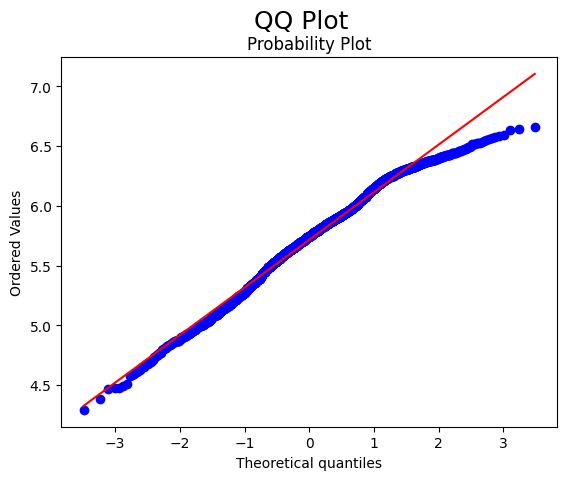

In [491]:
Blood_cells = df[df['cell_type']=='Blood cells']

fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Blood_cells['area_of_cell']), dist="norm", plot=ax1
)

In [492]:
stats.shapiro(Blood_cells['area_of_cell'])

ShapiroResult(statistic=0.969602108001709, pvalue=5.4963358978772026e-24)

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=5.942e+05


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d6bc25c280>])

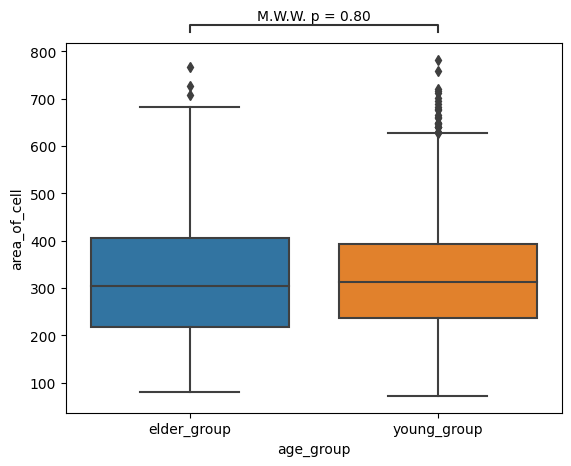

In [493]:
x = 'age_group'
y = 'area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))

ax = sns.boxplot(data=Blood_cells, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Blood_cells, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='simple', loc='outside')
annotator.apply_and_annotate()

((array([-3.45883985, -3.21228487, -3.07578321, ...,  3.07578321,
          3.21228487,  3.45883985]),
  array([4.51085951, 4.51085951, 4.52178858, ..., 6.63725803, 6.66185474,
         6.68959927])),
 (0.35172998205112027, 5.622298869538374, 0.9988834248714309))

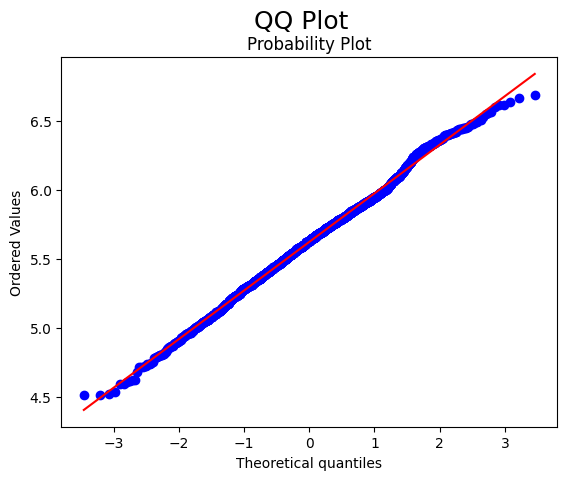

In [494]:
Bone_cells = df[df['cell_type']=='Bone cells']

fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Bone_cells['area_of_cell']), dist="norm", plot=ax1
)

In [495]:
stats.shapiro(Bone_cells['area_of_cell'])

ShapiroResult(statistic=0.9365512132644653, pvalue=1.0345160202843847e-31)

In [496]:
stats.normaltest(Bone_cells['area_of_cell'])

NormaltestResult(statistic=449.2910683221563, pvalue=2.7395808995663855e-98)

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.789e-03 U_stat=4.619e+05


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d6acae27f0>])

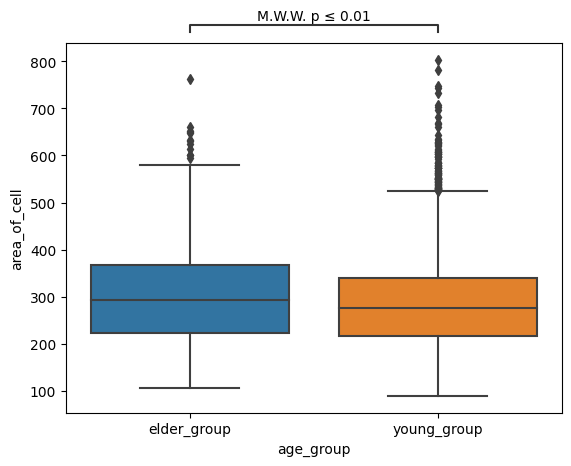

In [497]:
x='age_group'
y='area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))


ax = sns.boxplot(data=Bone_cells, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Bone_cells, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='simple', loc='outside')
annotator.apply_and_annotate()

((array([-3.39067408, -3.13950328, -3.00018048, ...,  3.00018048,
          3.13950328,  3.39067408]),
  array([4.14313473, 4.35670883, 4.38202663, ..., 8.7384149 , 8.75020786,
         8.82585367])),
 (1.068524084090785, 6.409193972651618, 0.9644505112126315))

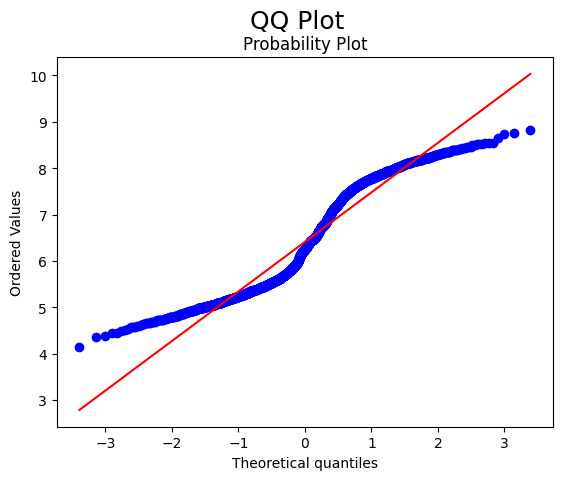

In [498]:
Largest_cells = df[df['cell_type']=='Largest cells']


fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Largest_cells['area_of_cell']), dist="norm", plot=ax1
)

In [499]:
stats.shapiro(Largest_cells['area_of_cell'])

ShapiroResult(statistic=0.8015056252479553, pvalue=4.484155085839415e-44)

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.954e-73 U_stat=2.573e+05


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d6be6fa9a0>])

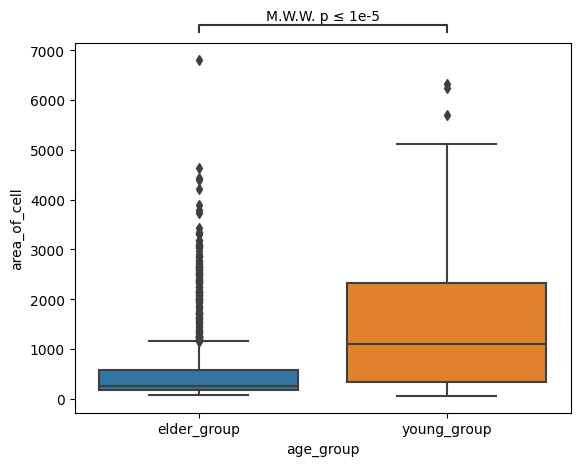

In [500]:
x='age_group'
y='area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))

ax = sns.boxplot(data=Largest_cells, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Largest_cells, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='simple', loc='outside')
annotator.apply_and_annotate()

In [501]:
Largest_cells.groupby('age_group')['area_of_cell'].describe()

count         mean          std   min    25%     50%     75%  \
age_group                                                                    
elder_group   879.0   613.687144   806.572420  79.0  188.0   263.0   576.0   
young_group  1109.0  1460.441839  1234.883968  62.0  329.0  1099.0  2320.0   

                max  
age_group            
elder_group  6807.0  
young_group  6311.0

In [502]:
Largest_cells_yong = pandasql.sqldf("""
    SELECT area_of_cell
    FROM Largest_cells
    WHERE age_group = 'young_group';""")

In [503]:
Largest_cells_elder = pandasql.sqldf("""
    SELECT area_of_cell
    FROM Largest_cells
    WHERE age_group = 'elder_group';""")

In [504]:
stats.mannwhitneyu(
    Largest_cells_yong['area_of_cell'], Largest_cells_elder['area_of_cell']
)

MannwhitneyuResult(statistic=717531.5, pvalue=2.9543809458425604e-73)

Два раза перепроверил, действительно разницы нет даже для больших клеток

((array([-2.58977345, -2.26833208, -2.08397164, -1.95134078, -1.84615093,
         -1.75813779, -1.68195358, -1.61444188, -1.55357684, -1.49797725,
         -1.44665728, -1.39888755, -1.35411252, -1.31189888, -1.27190175,
         -1.23384196, -1.19749012, -1.16265539, -1.12917712, -1.09691879,
         -1.06576327, -1.03560932, -1.00636876, -0.97796428, -0.95032771,
         -0.92339857, -0.89712296, -0.87145259, -0.84634402, -0.82175802,
         -0.797659  , -0.77401457, -0.75079515, -0.72797364, -0.70552513,
         -0.68342667, -0.66165704, -0.64019656, -0.61902697, -0.59813124,
         -0.57749349, -0.55709882, -0.53693331, -0.51698381, -0.49723799,
         -0.47768418, -0.45831134, -0.43910901, -0.42006725, -0.40117661,
         -0.38242807, -0.36381301, -0.34532319, -0.32695068, -0.30868788,
         -0.29052747, -0.27246238, -0.25448578, -0.23659106, -0.21877178,
         -0.2010217 , -0.18333474, -0.16570495, -0.14812651, -0.13059373,
         -0.11310101, -0.09564283, -0.

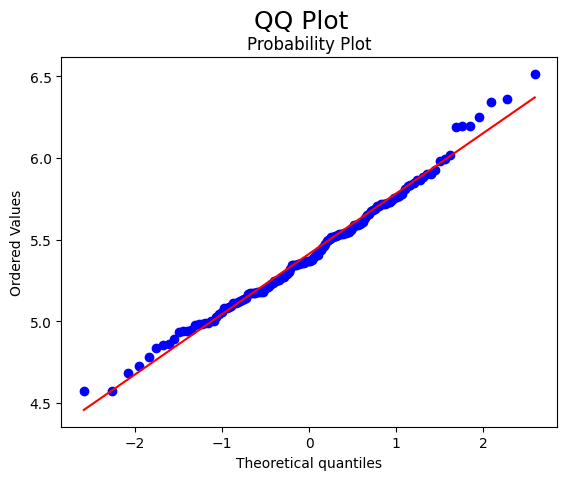

In [505]:
Vasculature = df[df['cell_type']=='Vasculature']


fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(Vasculature['area_of_cell']), dist="norm", plot=ax1
)


In [506]:
stats.shapiro(Vasculature['area_of_cell'])

ShapiroResult(statistic=0.8771584033966064, pvalue=1.4430348027616446e-09)

In [507]:
community = pd.pivot_table(df, 
                index=['cell_interaction','case_id'],
                columns='cell_type',
                values='age_group',
                aggfunc=len
                ).fillna(0).reset_index()
                
community.head()

cell_type cell_interaction  case_id  Blood cells  Bone cells  Immune type 1  \
0              community_1       40         37.0        27.0           27.0   
1              community_1      199        155.0        37.0           39.0   
2              community_1      559         42.0        29.0           11.0   
3              community_1      566          9.0        15.0            4.0   
4              community_1      693        351.0       799.0          306.0   

cell_type  Immune type 2  Largest cells  Stroma cells  Unclassified  \
0                 1343.0           67.0        5522.0         396.0   
1                  898.0           48.0        6490.0         651.0   
2                   56.0           11.0        1401.0         117.0   
3                  187.0           11.0         975.0          85.0   
4                 1025.0          103.0        9576.0        1350.0   

cell_type  Vasculature  
0                  2.0  
1                  0.0  
2                  3.0  
3                  1.0  
4                  3.0

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:7.190e-01 U_stat=2.479e+03


(<AxesSubplot: xlabel='age_group', ylabel='area_of_cell'>,
 [<statannotations.Annotation.Annotation at 0x1d6cf795e80>])

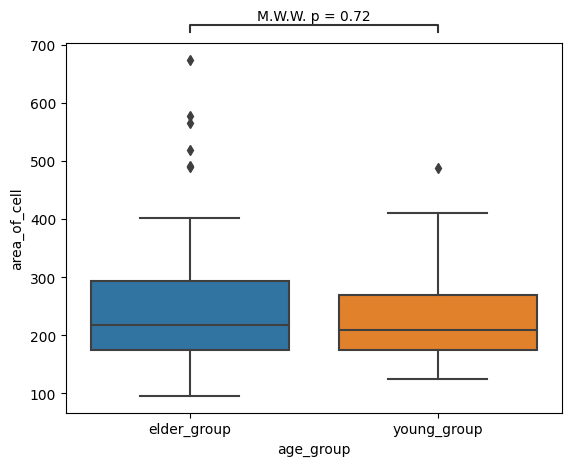

In [508]:
x='age_group'
y='area_of_cell'
order = ['elder_group', 'young_group']
pairs = list(combinations(order,2))


ax = sns.boxplot(data=Vasculature, x='age_group', y='area_of_cell')

annotator = Annotator(ax, pairs, data=Vasculature, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='simple', loc='outside')
annotator.apply_and_annotate()


Слудющий график объединяющий. Он довольно большой, но наглядный. По очереди выстраиваются графики, в которых поочередно сравниваются размеры клеток у пожилых и молодых пациентов

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.357e+05
Blood cells_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.638e+06
Blood cells_elder_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=5.942e+05
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:6.770e-02 U_stat=1.090e+05
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:5.636e-24 U_stat=2.919e+06
Blood cells_elder_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:6.390e-30 U_stat=5.490e+05
Blood cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxo

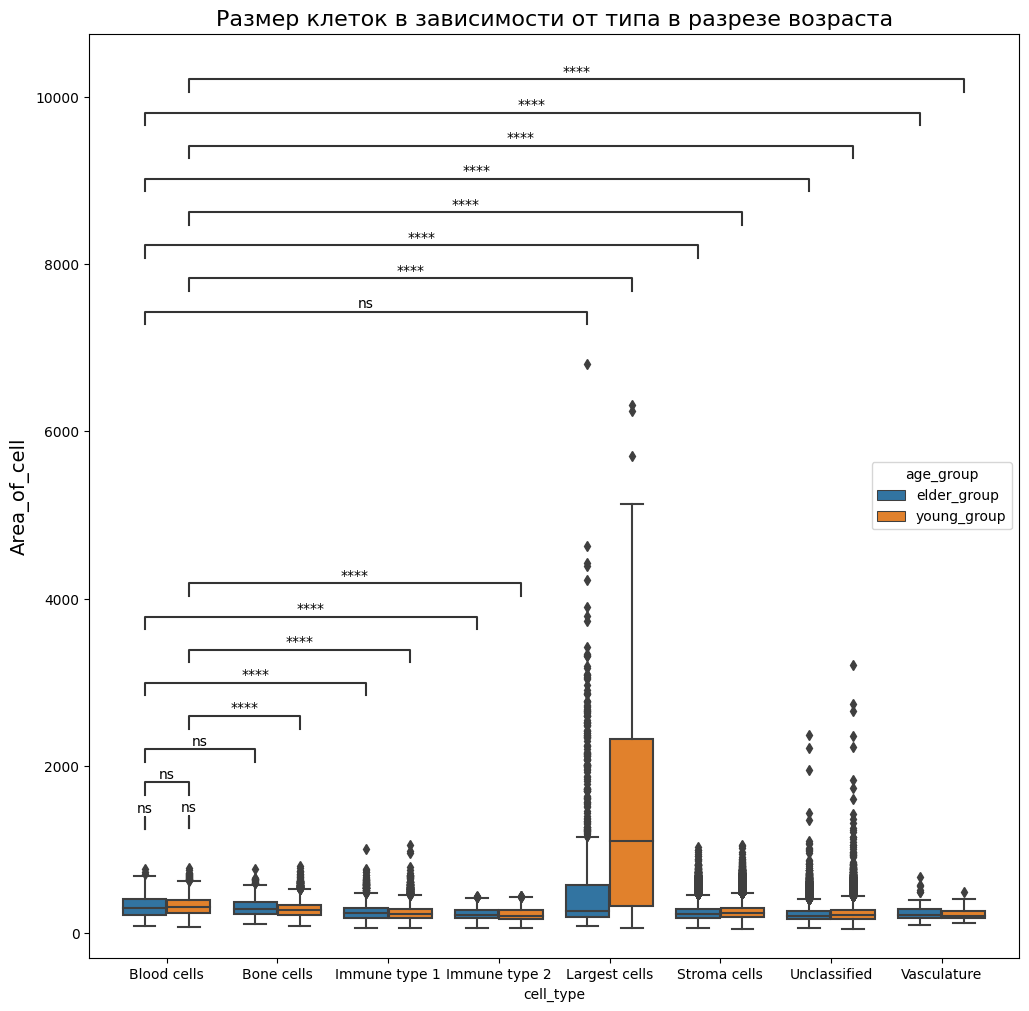

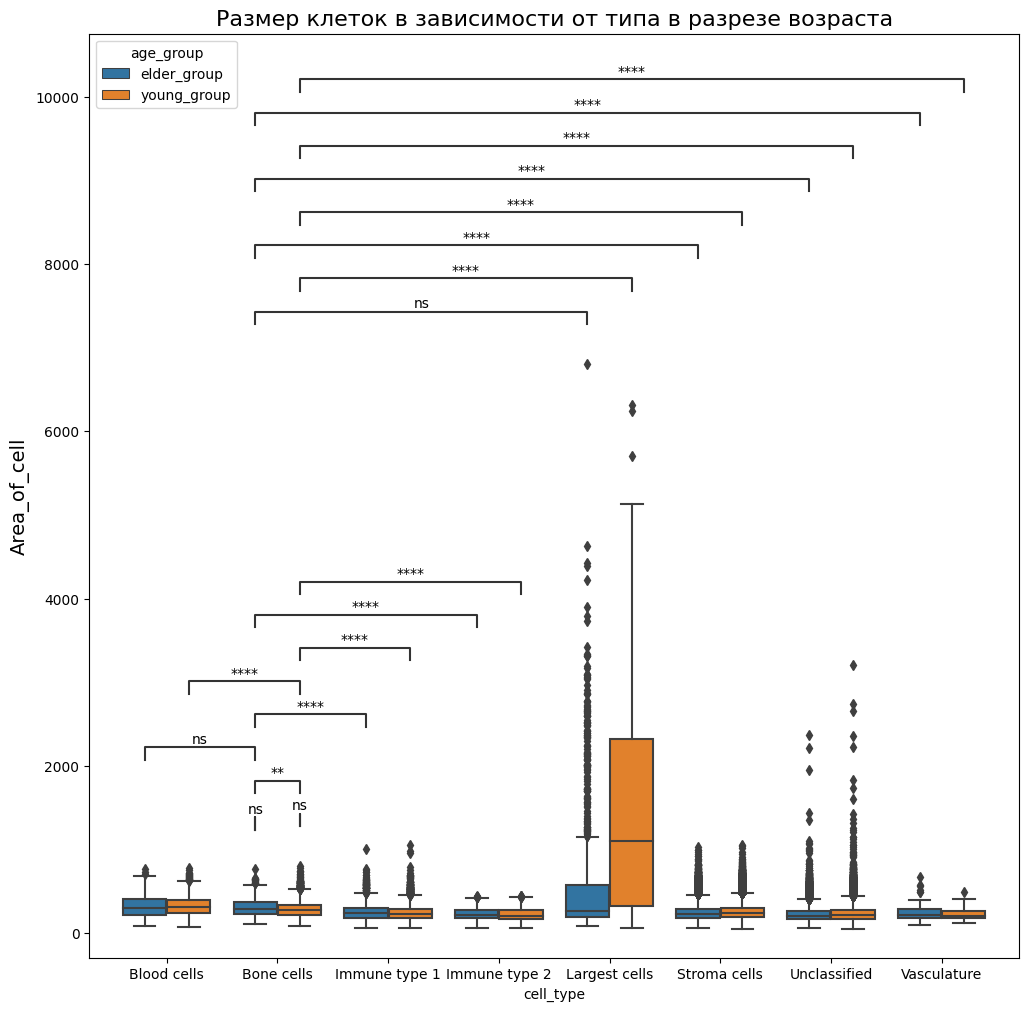

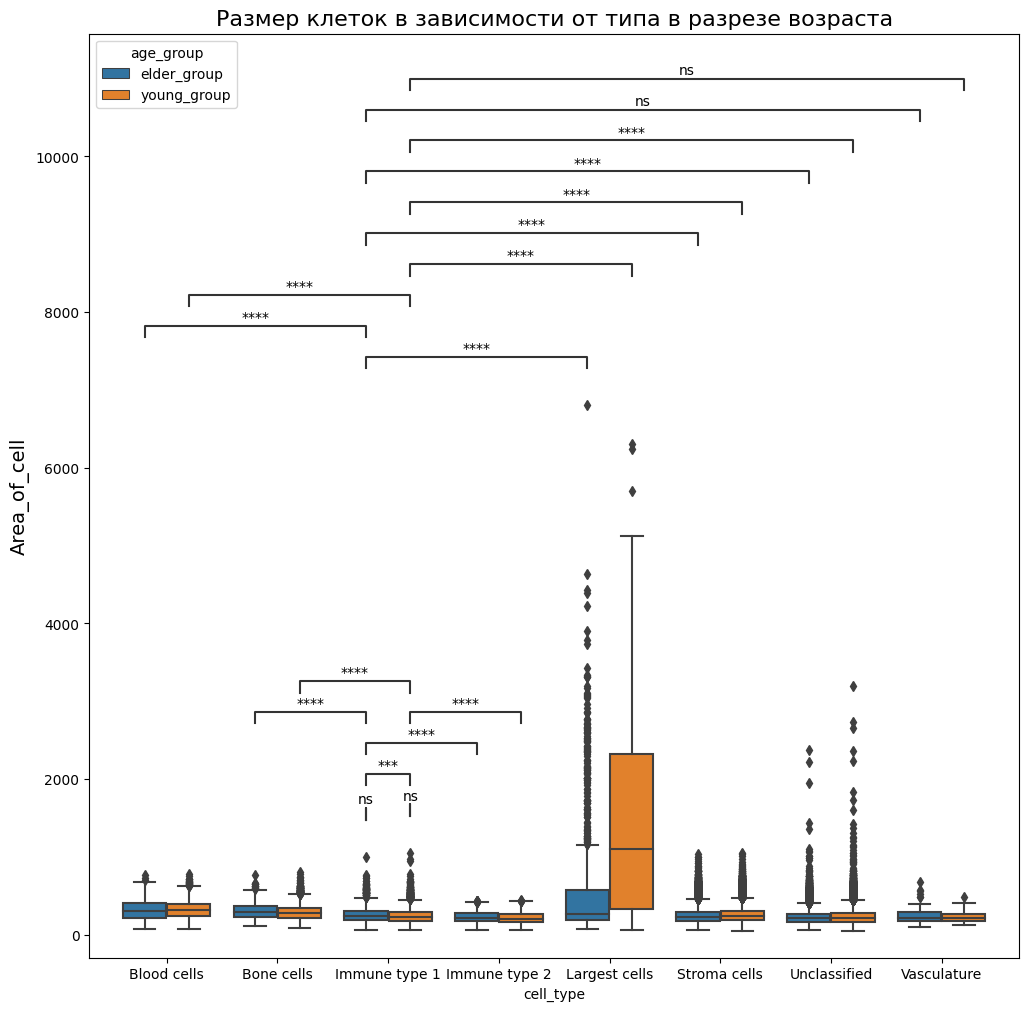

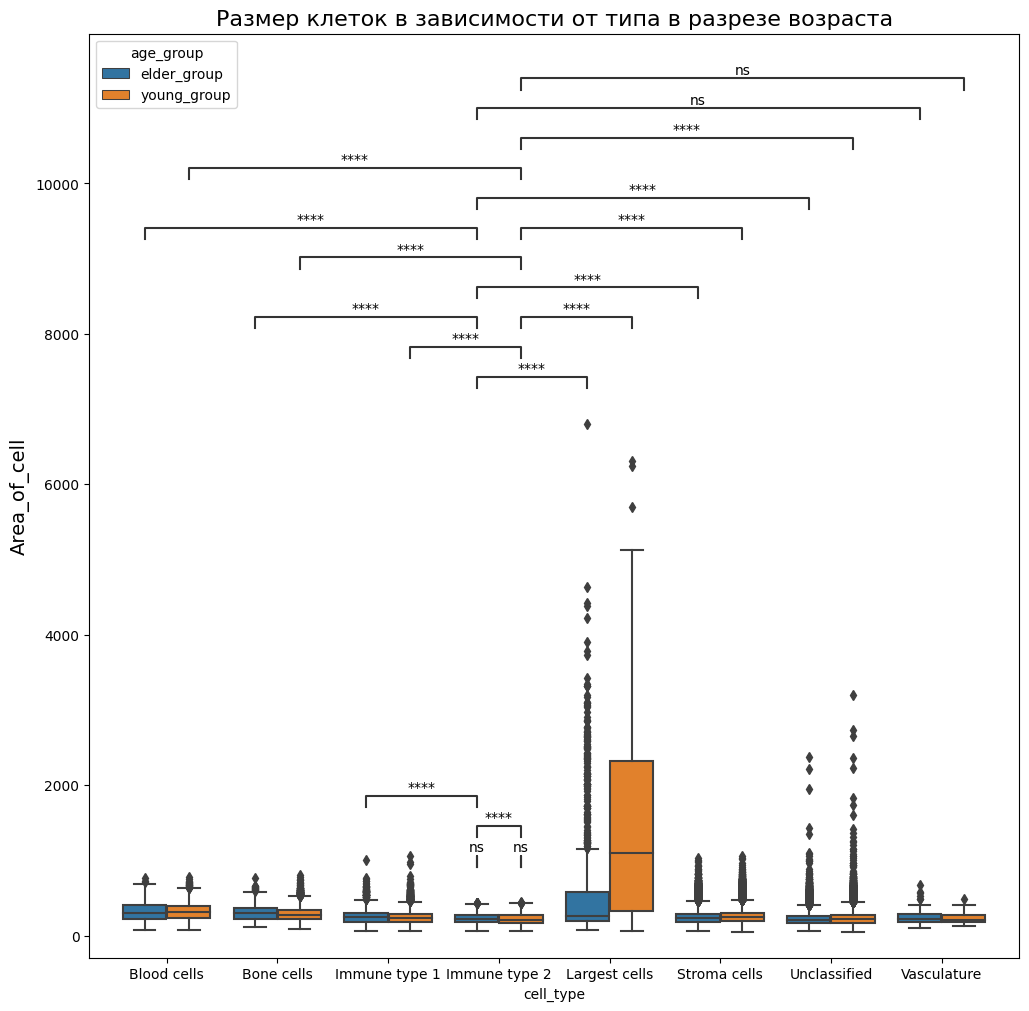

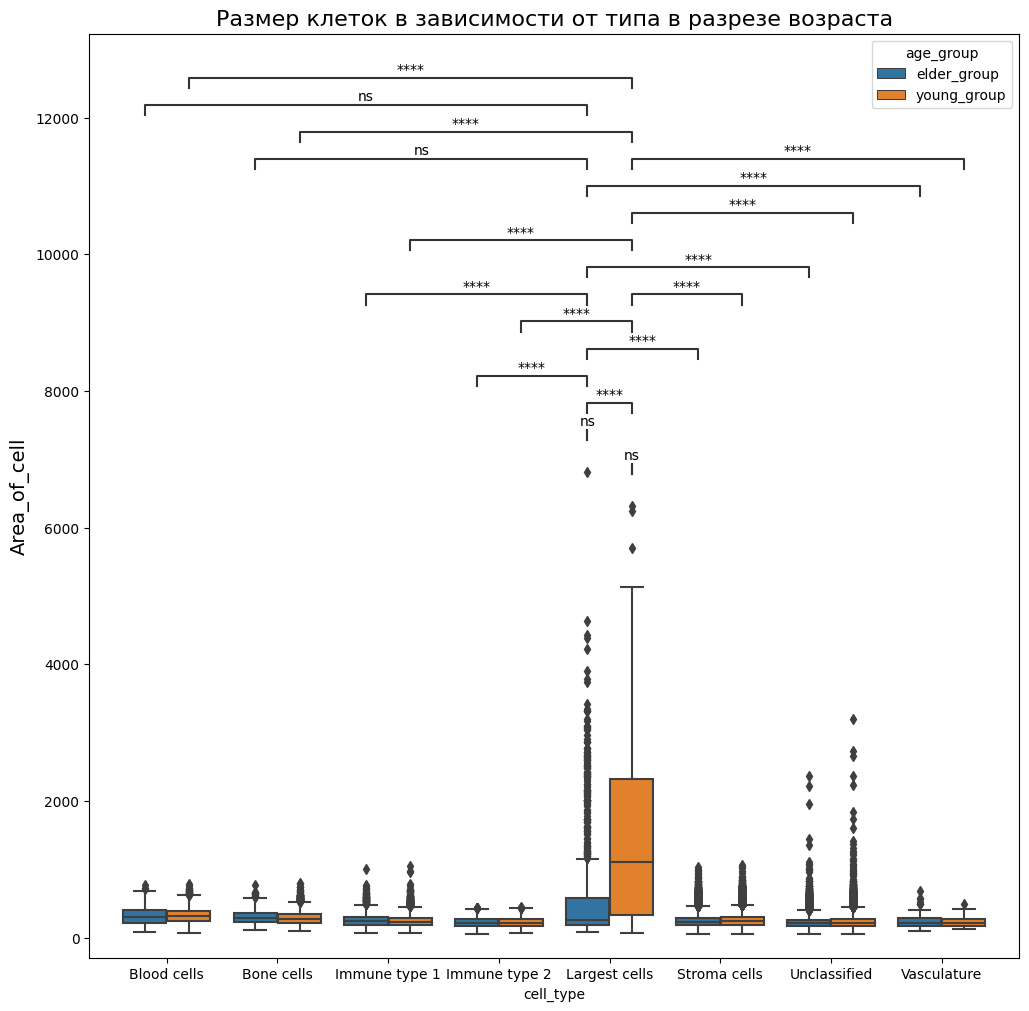

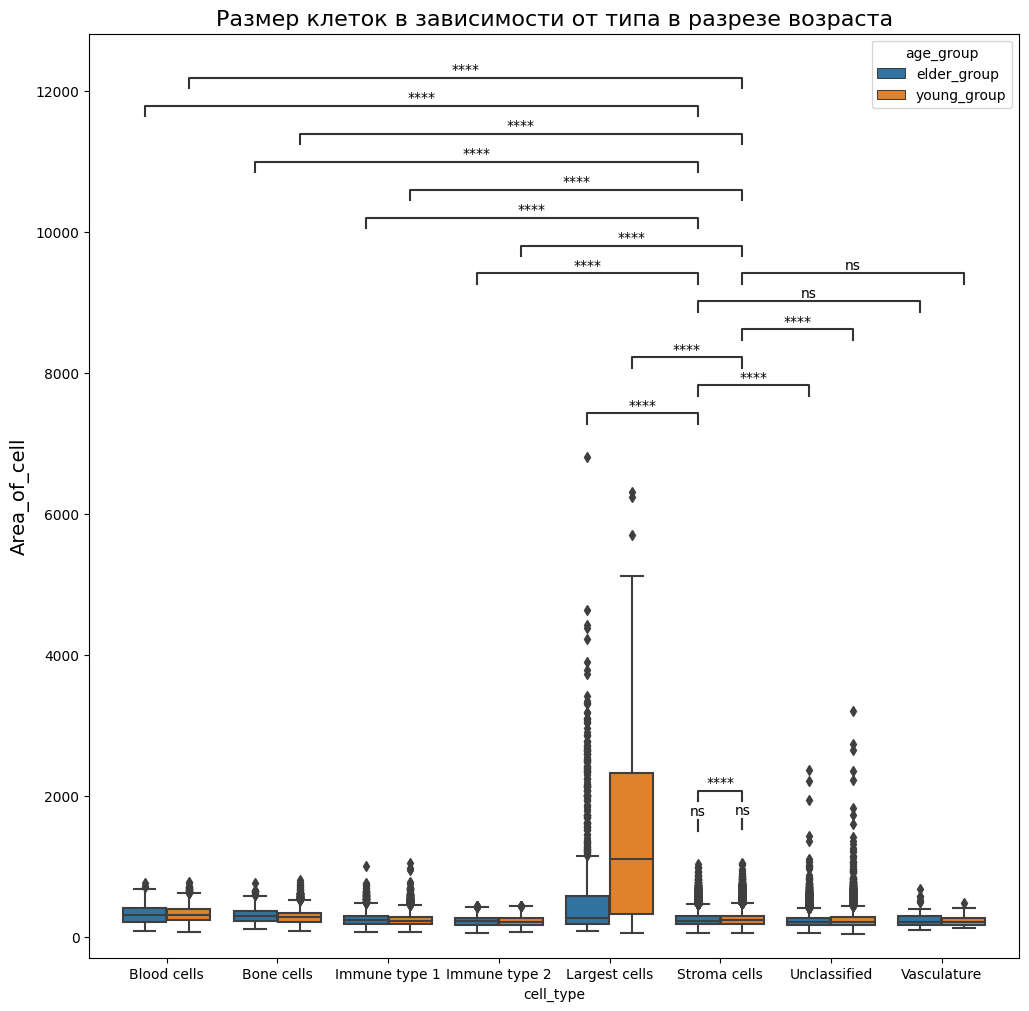

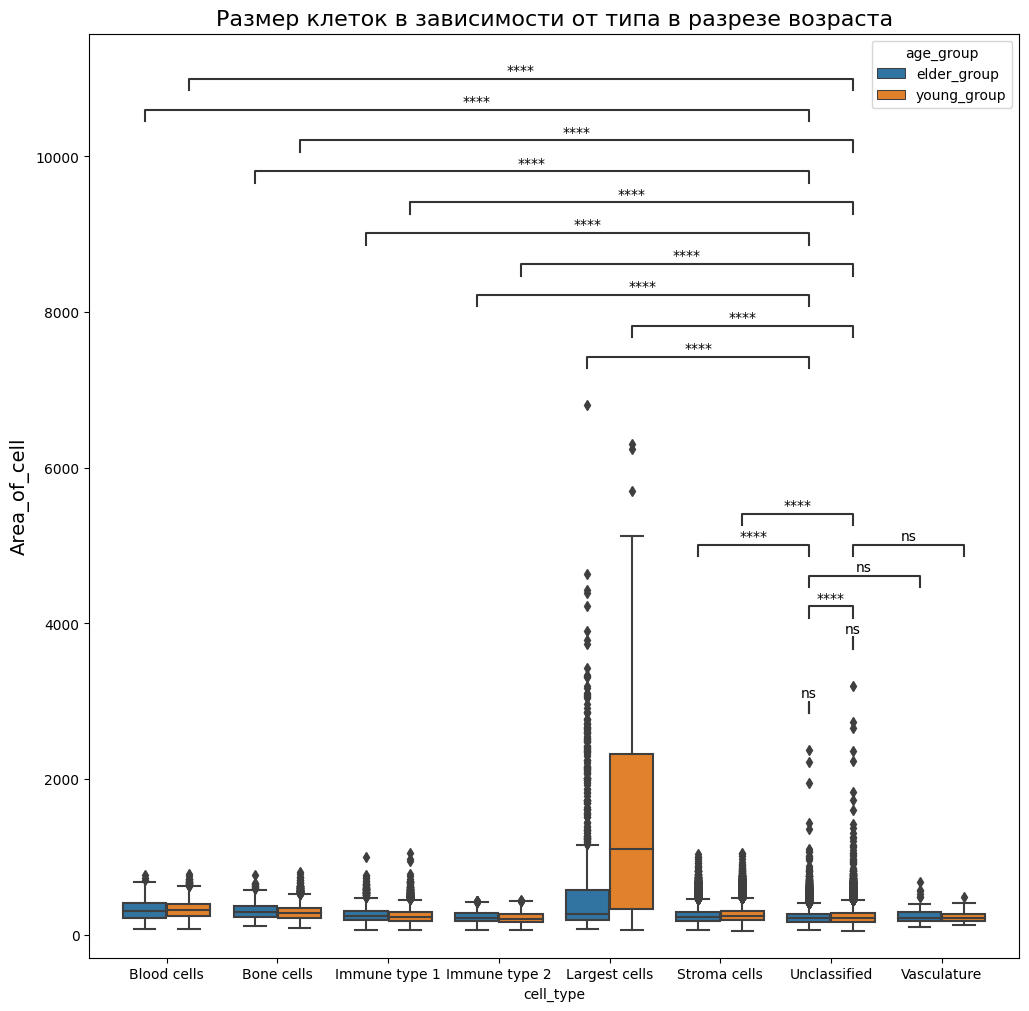

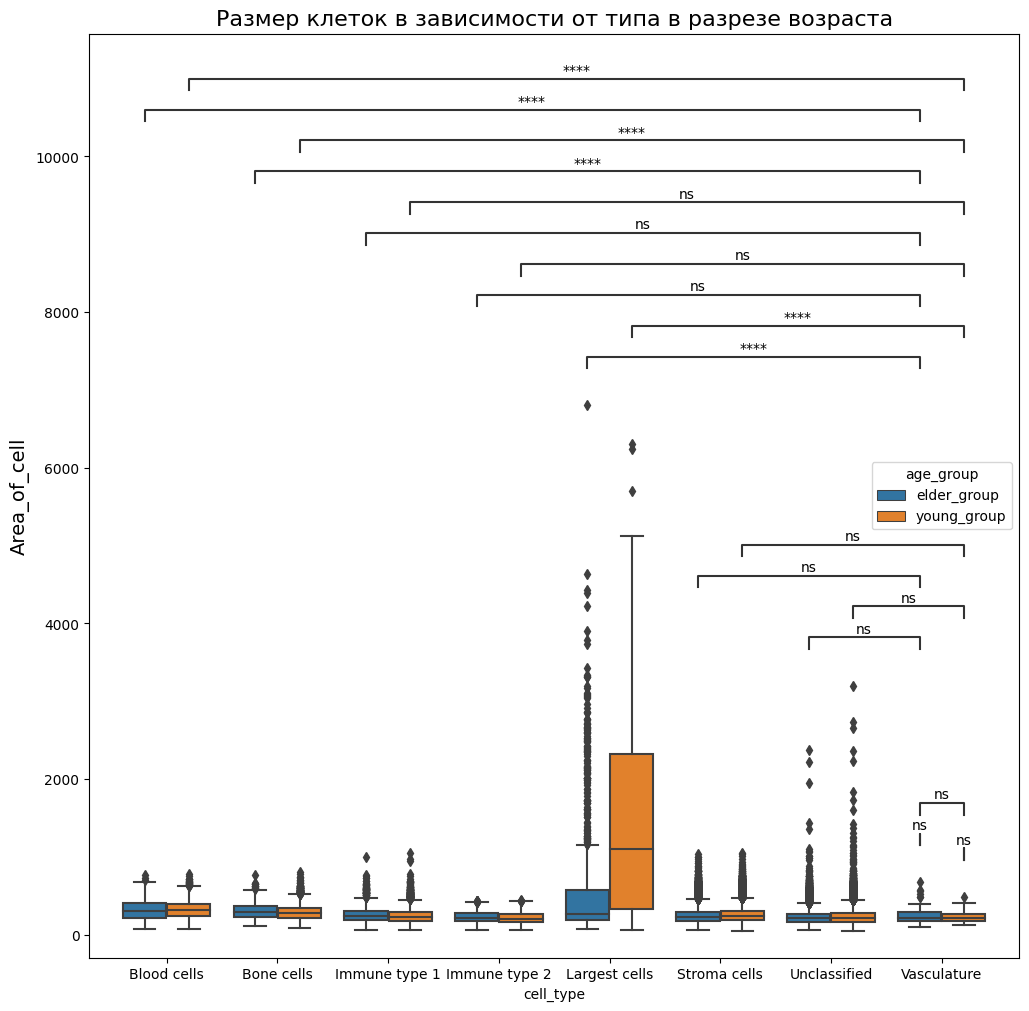

In [509]:
x='cell_type'
y = 'area_of_cell'
hue='age_group'
order = ['Blood cells',
 'Bone cells',
 'Immune type 1',
 'Immune type 2',
 'Largest cells',
 'Stroma cells',
 'Unclassified',
 'Vasculature']


hue_order=['elder_group','young_group']
for i in range(len(order)):
    pairs = [((order[i], 'elder_group'), (order[j-1], 'elder_group'))
        for j in range(len(order))
    ]

    pairs = pairs + [((order[i], 'young_group'), (order[j-1], 'young_group'))
        for j in range(len(order))
    ]

    pairs =  pairs + [((order[i], 'young_group'), (order[i], 'elder_group'))]

    
    plt.figure(figsize=(12, 12))
    cell_area = sns.boxplot(
        data=df,x='cell_type', y = 'area_of_cell',
        hue=hue, hue_order=hue_order
    )
    cell_area.axes.set_title(
        "Размер клеток в зависимости от типа в разрезе возраста", fontsize=16
    )
    cell_area.set_ylabel("Area_of_cell", fontsize=14)

    annotator = Annotator(
        cell_area, pairs, data=df, x=x, y=y,
        hue_order=hue_order, hue=hue
    )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

        Выводы (буду писать только которые соответсвуют Н0, остальные будут иметь стат.значимую разницу в размере клетки):

1.У пожилых - Blood-Bone, Blood-Largest, Bone-Largest, Immune_type_1 - Vasculature,  Immune_type_2 - Vasculature, Stroma cells - Vasculature, Unclassified - Vasculature,

2.У молодых - Immune_type_1 - Vasculature, Immune_type_1 -Vasculature, Stroma cells - Vasculature, Unclassified - Vasculature

3.Раздельные тесты, которые выполнял выше, подтверждаются на этих графиках (так например для Blood cell остается H0)

Есть ли стат-значимость между типом клетки и:

б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

In [510]:
H0 = 'Экспрессия происходит в одинаковом титре в зависимости от клетки'
HA = 'Экспрессия у разных клеток разная'

In [511]:
cell_immune = df.groupby(['cell_type']).agg(
    {'age_group': lambda x: list(x),
    'immune_marker_1': lambda x: list(x),
    'immune_marker_2': lambda x: list(x)}
).reset_index()

In [512]:
cell_immune = cell_immune.explode(
    ['age_group','immune_marker_1','immune_marker_2']
)

In [513]:
cell_immune['immune_marker_1']

0    38.933685
0    18.560281
0    42.108968
0    13.158828
0     1.922439
       ...    
7    40.986393
7    92.576159
7    33.046382
7    25.227146
7    31.345927
Name: immune_marker_1, Length: 269442, dtype: object

In [514]:
cell_immune['age_group'] = cell_immune['age_group'].astype('category')
cell_immune.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   cell_type        269442 non-null  category
 1   age_group        269442 non-null  category
 2   immune_marker_1  269442 non-null  object  
 3   immune_marker_2  269442 non-null  object  
dtypes: category(2), object(2)
memory usage: 6.7+ MB


In [515]:
cell_immune['immune_marker_1'] = cell_immune['immune_marker_1'].astype('float16')
cell_immune['immune_marker_2'] = cell_immune['immune_marker_2'].astype('float16')
cell_immune.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   cell_type        269442 non-null  category
 1   age_group        269442 non-null  category
 2   immune_marker_1  269442 non-null  float16 
 3   immune_marker_2  269442 non-null  float16 
dtypes: category(2), float16(2)
memory usage: 3.6 MB


((array([-4.55878463, -4.36887615, -4.26588095, ...,  4.26588095,
          4.36887615,  4.55878463]),
  array([0.02219, 0.02501, 0.03445, ..., 4.73   , 4.746  , 4.793  ],
        dtype=float16)),
 (0.435309628943867, 2.962890625, 0.9911140156408188))

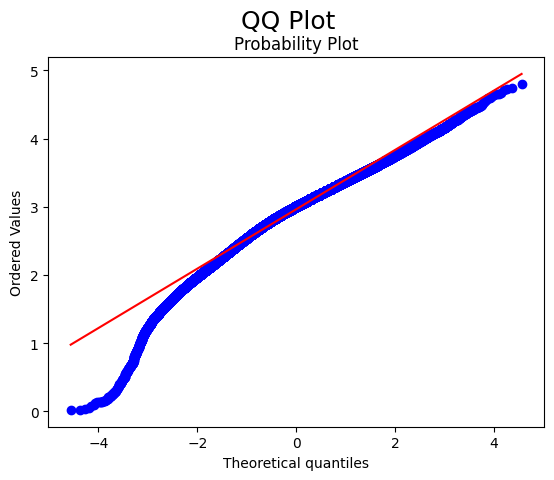

In [516]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(cell_immune['immune_marker_1']), dist="norm", plot=ax1
)

In [517]:
stats.shapiro(cell_immune['immune_marker_1'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9506596922874451, pvalue=0.0)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.357e+05
Blood cells_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.638e+06
Blood cells_elder_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.811e-27 U_stat=7.804e+05
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.355e-62 U_stat=3.625e+04
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=7.049e+05
Blood cells_elder_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.286e-97 U_stat=1.607e+05
Blood cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxo

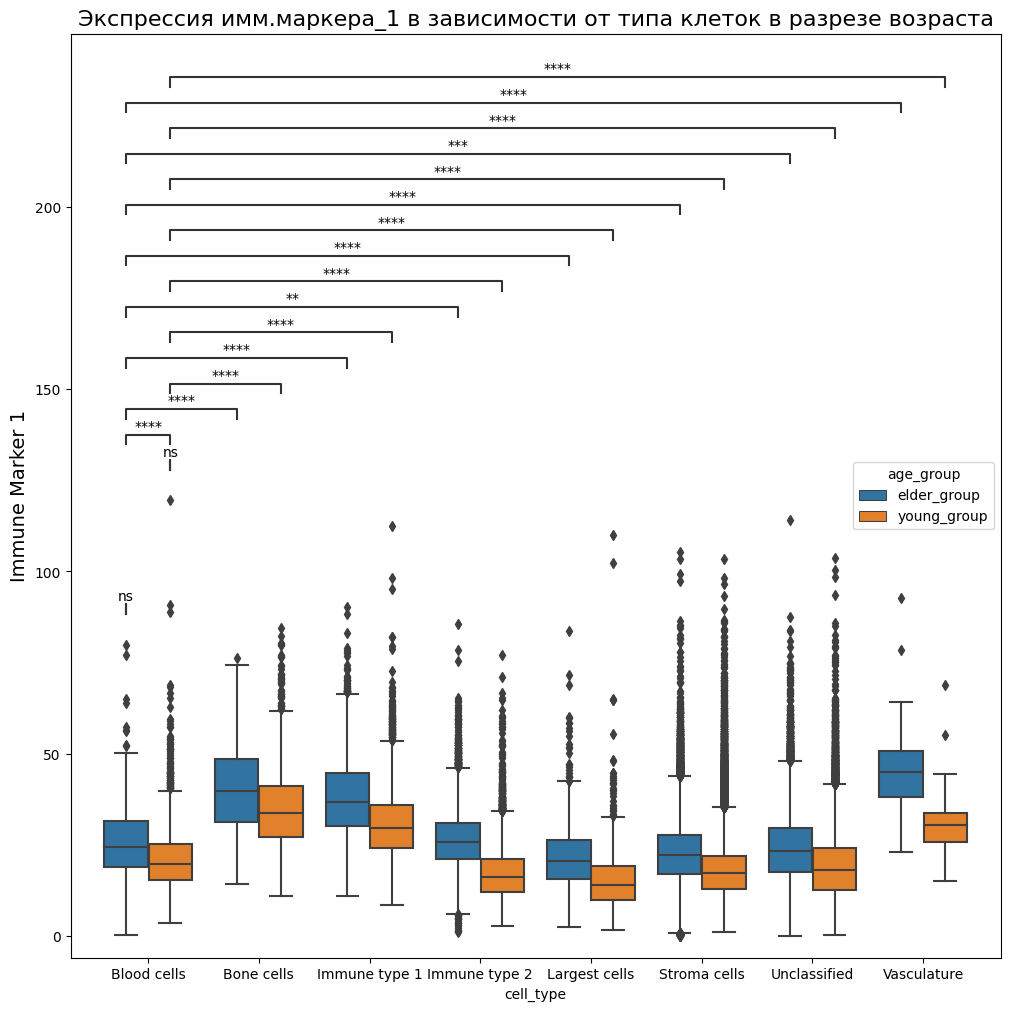

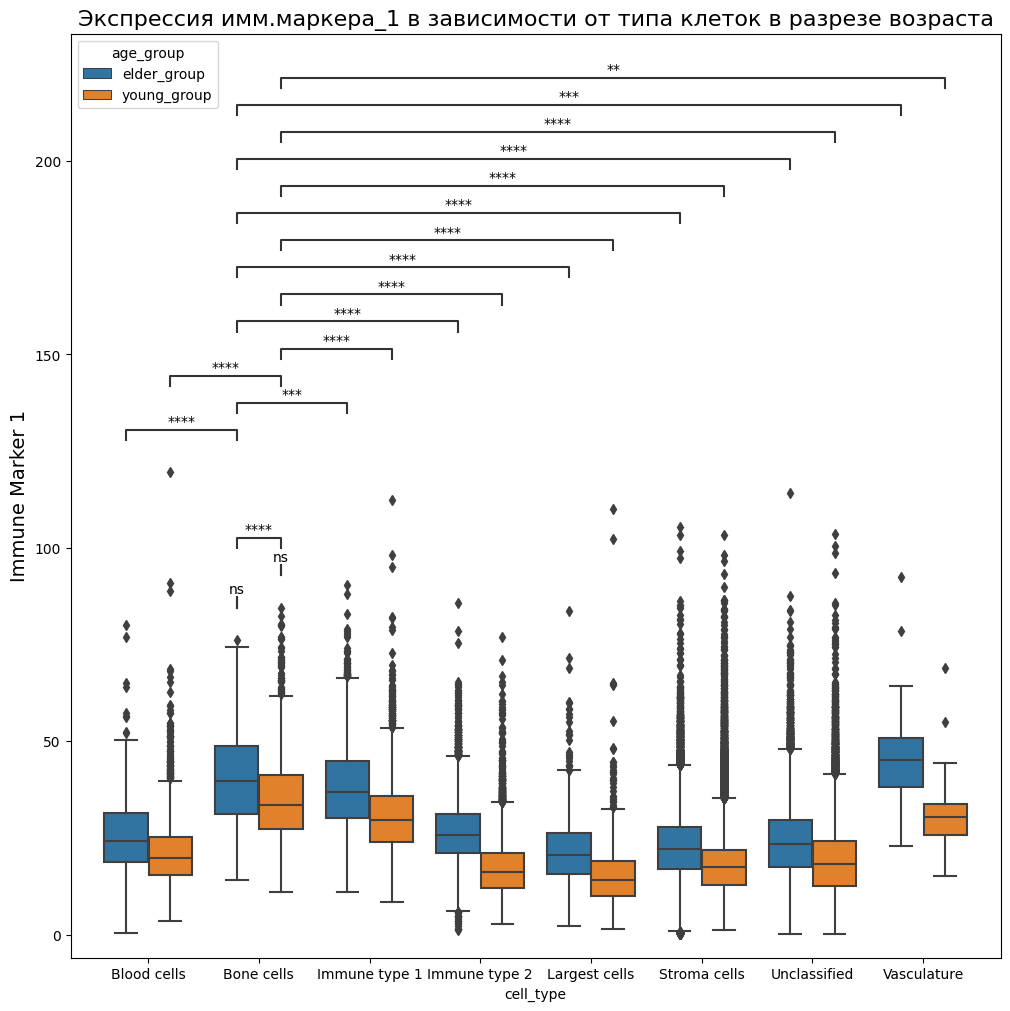

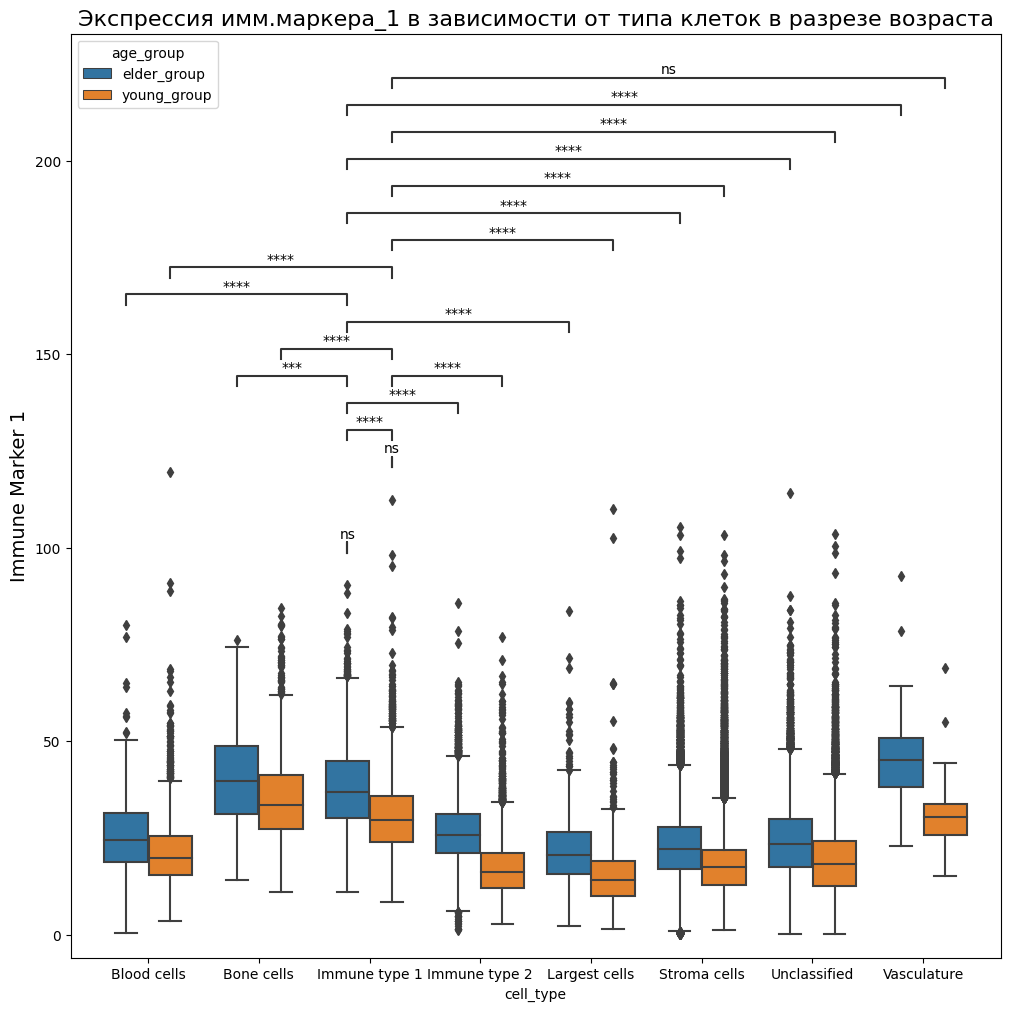

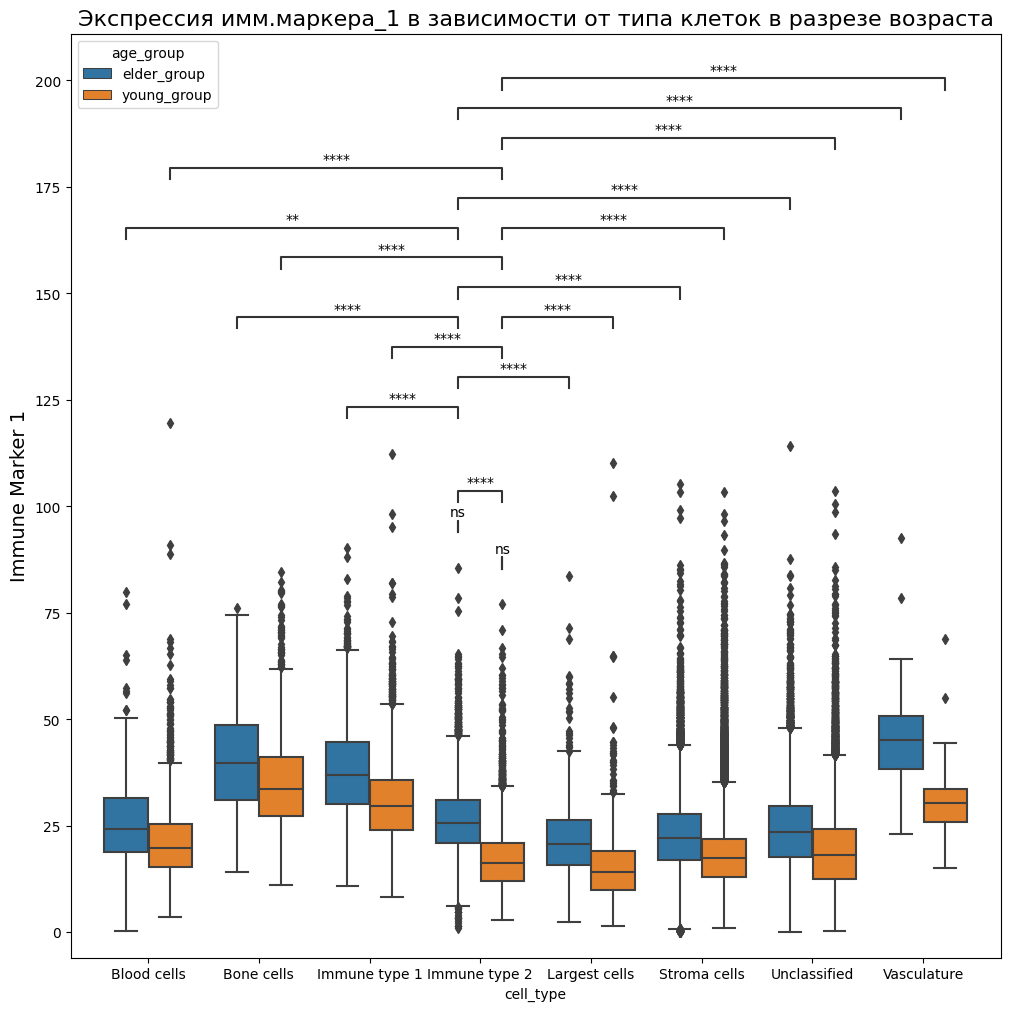

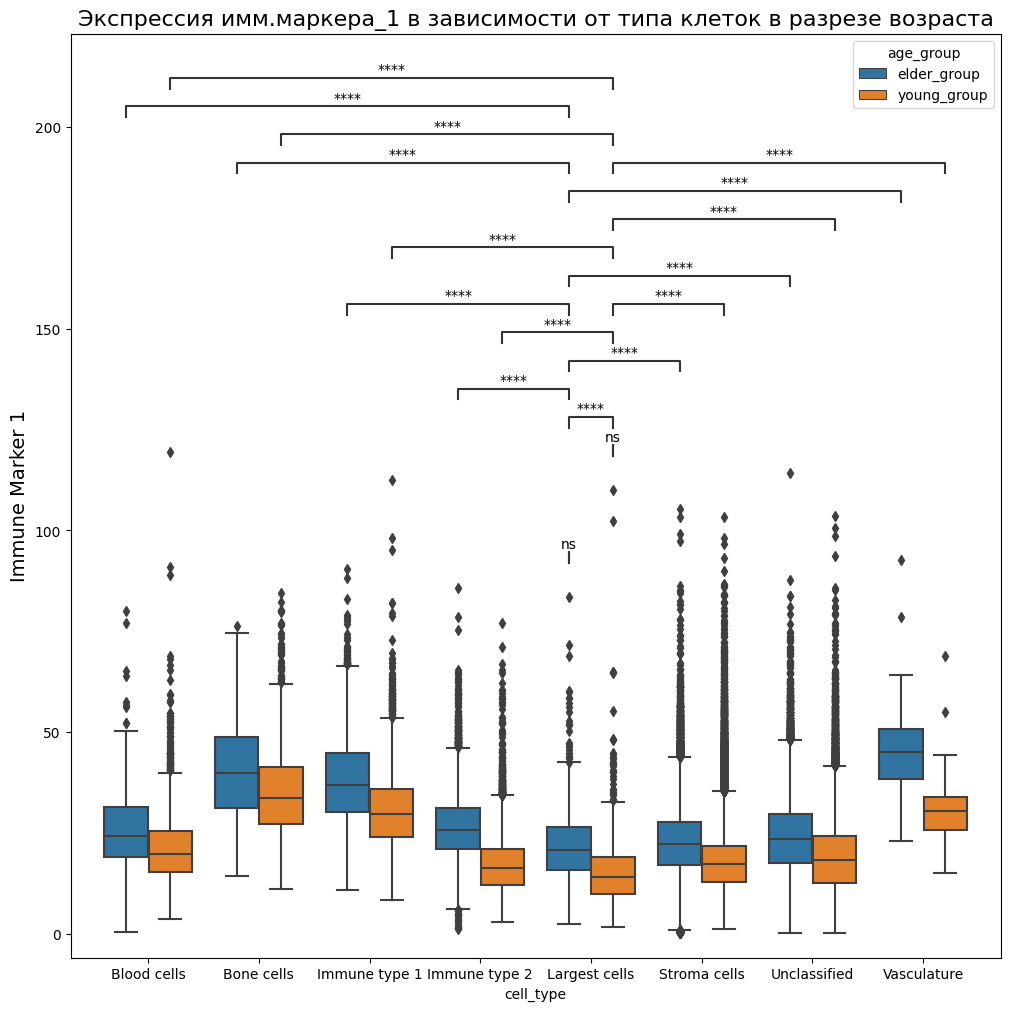

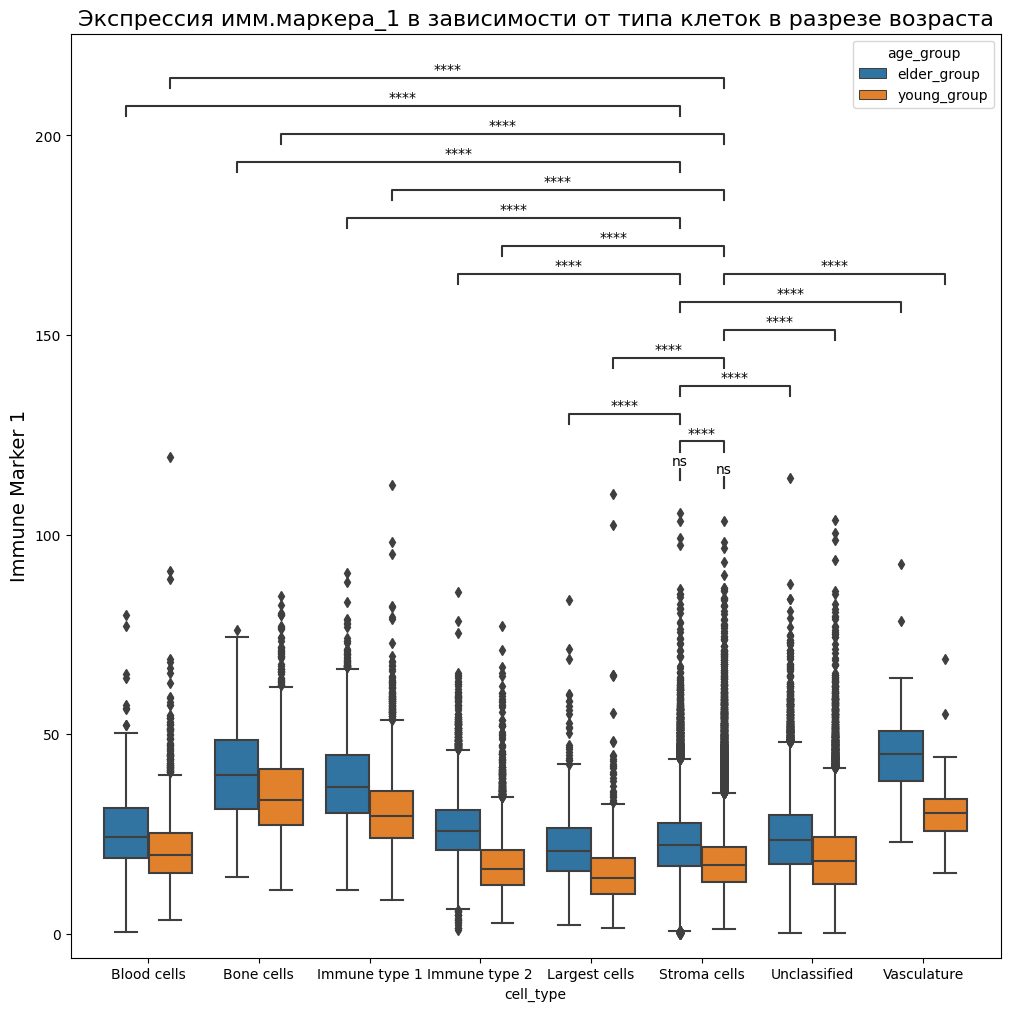

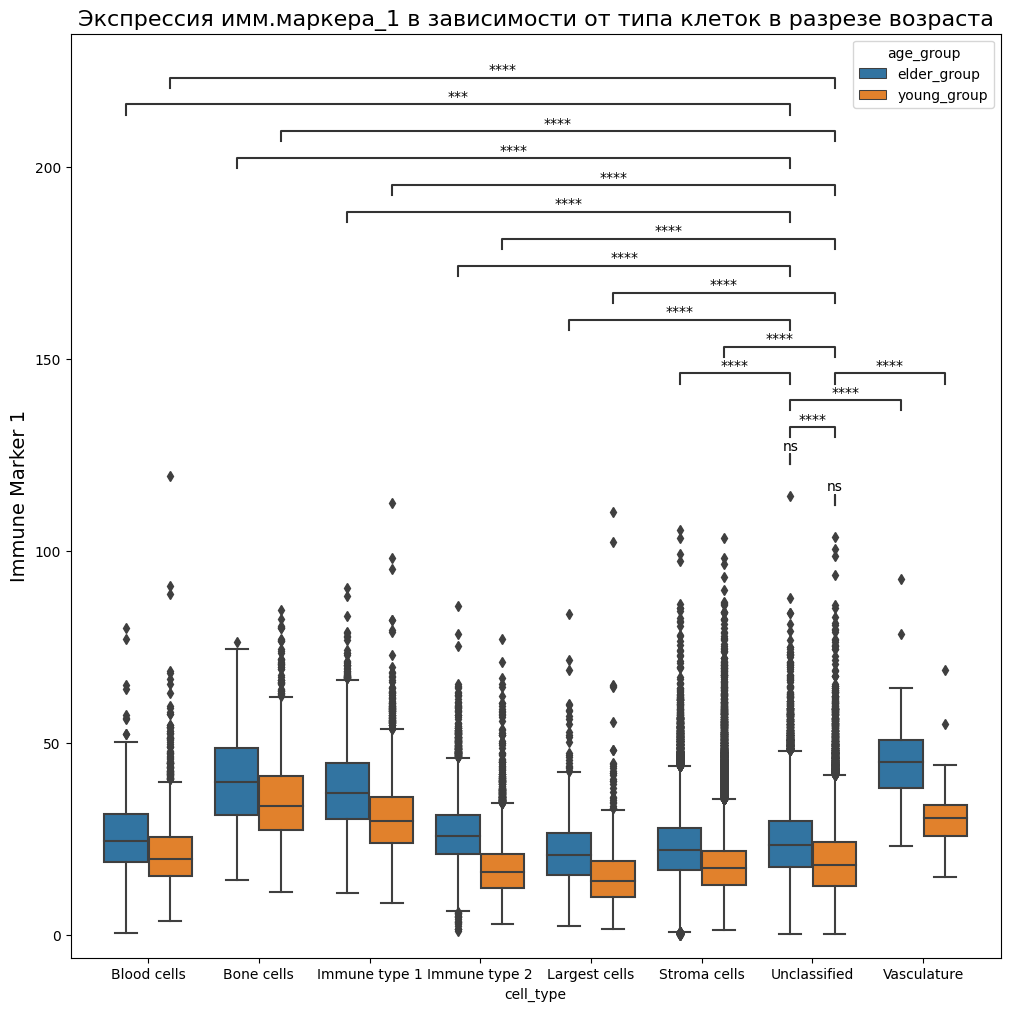

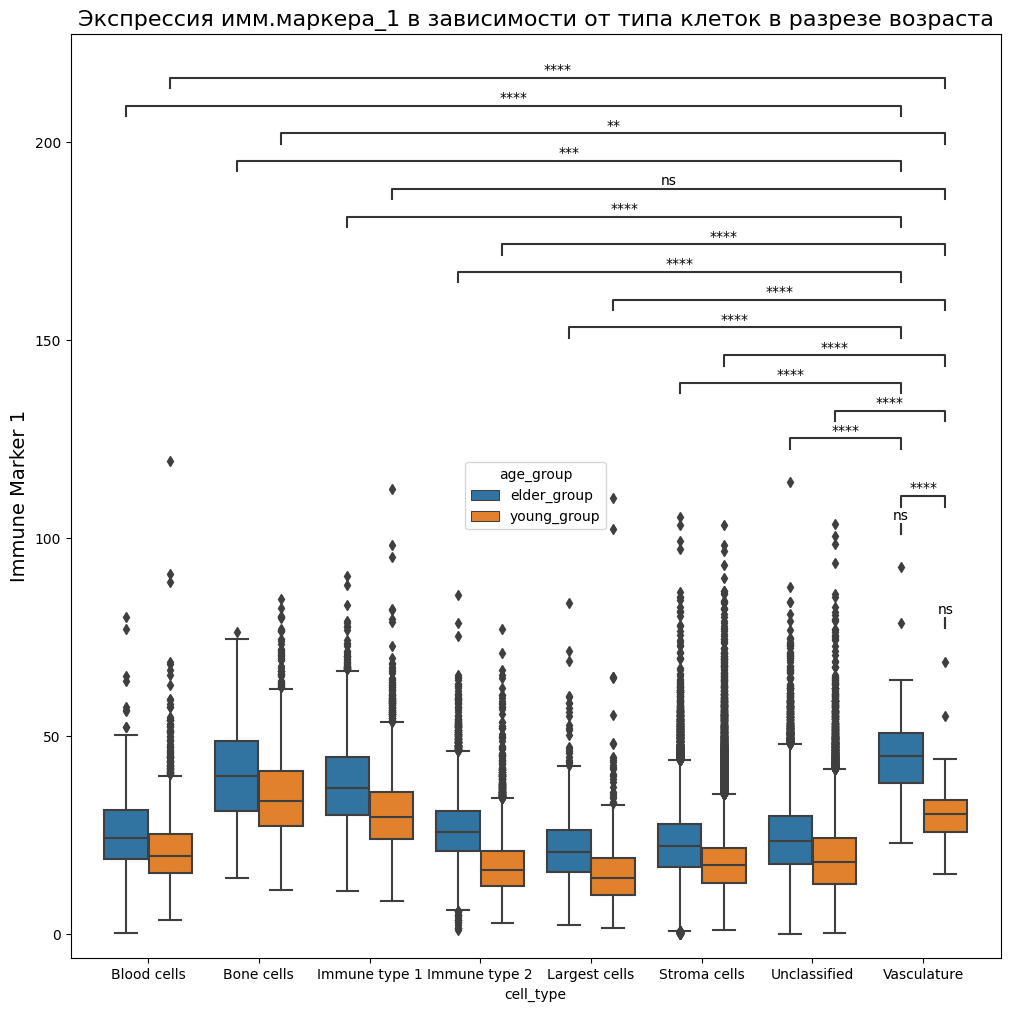

In [518]:
x='cell_type'
y = 'immune_marker_1'
hue='age_group'
order = ['Blood cells',
 'Bone cells',
 'Immune type 1',
 'Immune type 2',
 'Largest cells',
 'Stroma cells',
 'Unclassified',
 'Vasculature']


hue_order=['elder_group','young_group']
for i in range(len(order)):
    pairs = [((order[i], 'elder_group'), (order[j-1], 'elder_group'))
        for j in range(len(order))
    ]

    pairs = pairs + [((order[i], 'young_group'), (order[j-1], 'young_group'))
        for j in range(len(order))
    ]

    pairs =  pairs + [((order[i], 'young_group'), (order[i], 'elder_group'))]


    plt.figure(figsize=(12, 12))
    cell_immune_box = sns.boxplot(
    data=cell_immune, x='cell_type', y = 'immune_marker_1',
    hue=hue, hue_order=hue_order
    )
    cell_immune_box.axes.set_title(
    "Экспрессия имм.маркера_1 в зависимости от типа клеток в разрезе возраста", fontsize=16
    )
    cell_immune_box.set_ylabel("Immune Marker 1", fontsize=14)

    annotator = Annotator(
    cell_immune_box, pairs, data=cell_immune, x=x, y=y,
    hue_order=hue_order, hue=hue
    )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

        Выводы (пишу только для Н0 (т.е. ns)):

1. У пожилых 

2. У молодых - Immune_type_1 - Vasculture

3. В сравнении с возрастов определнная клетка


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.357e+05
Blood cells_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.638e+06
Blood cells_elder_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.306e-01 U_stat=6.020e+05
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.617e-02 U_stat=9.310e+04
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.246e-30 U_stat=1.991e+06
Blood cells_elder_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.216e-205 U_stat=7.804e+05
Blood cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcox

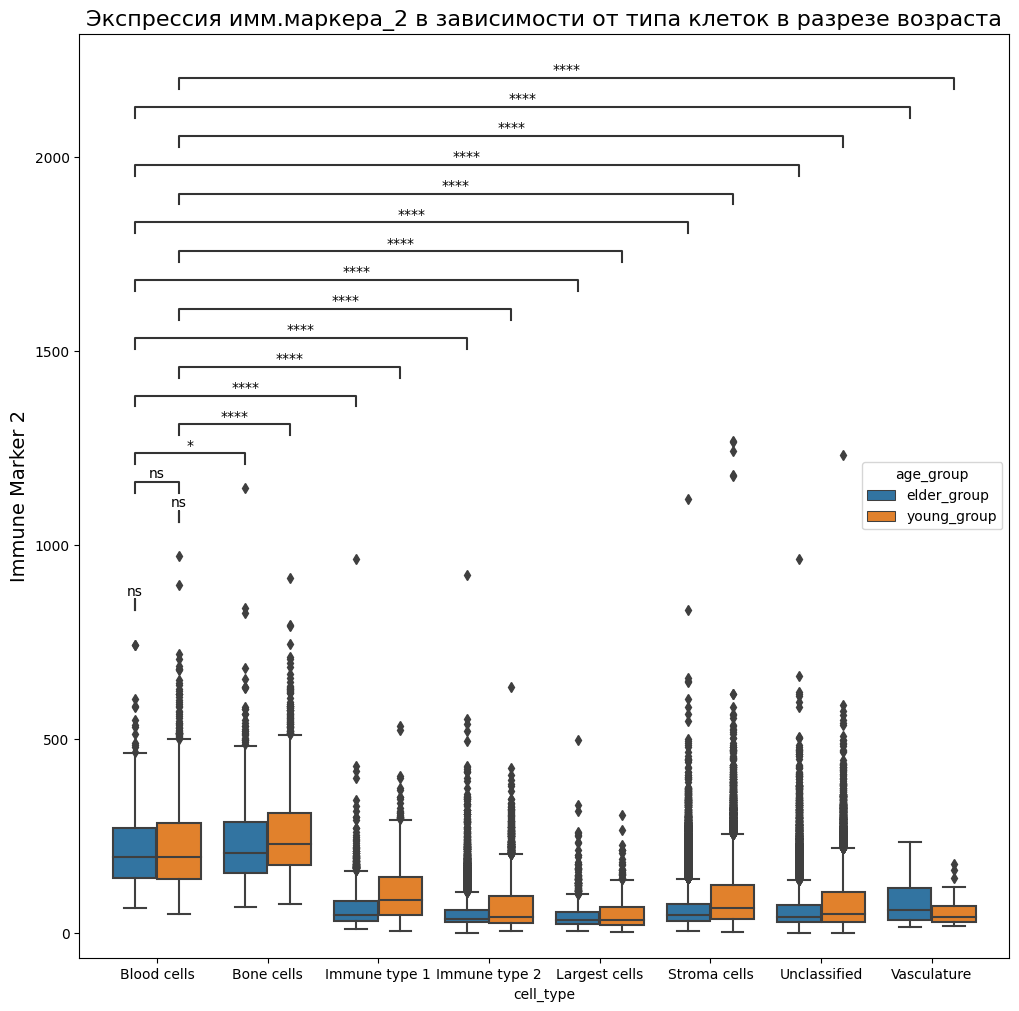

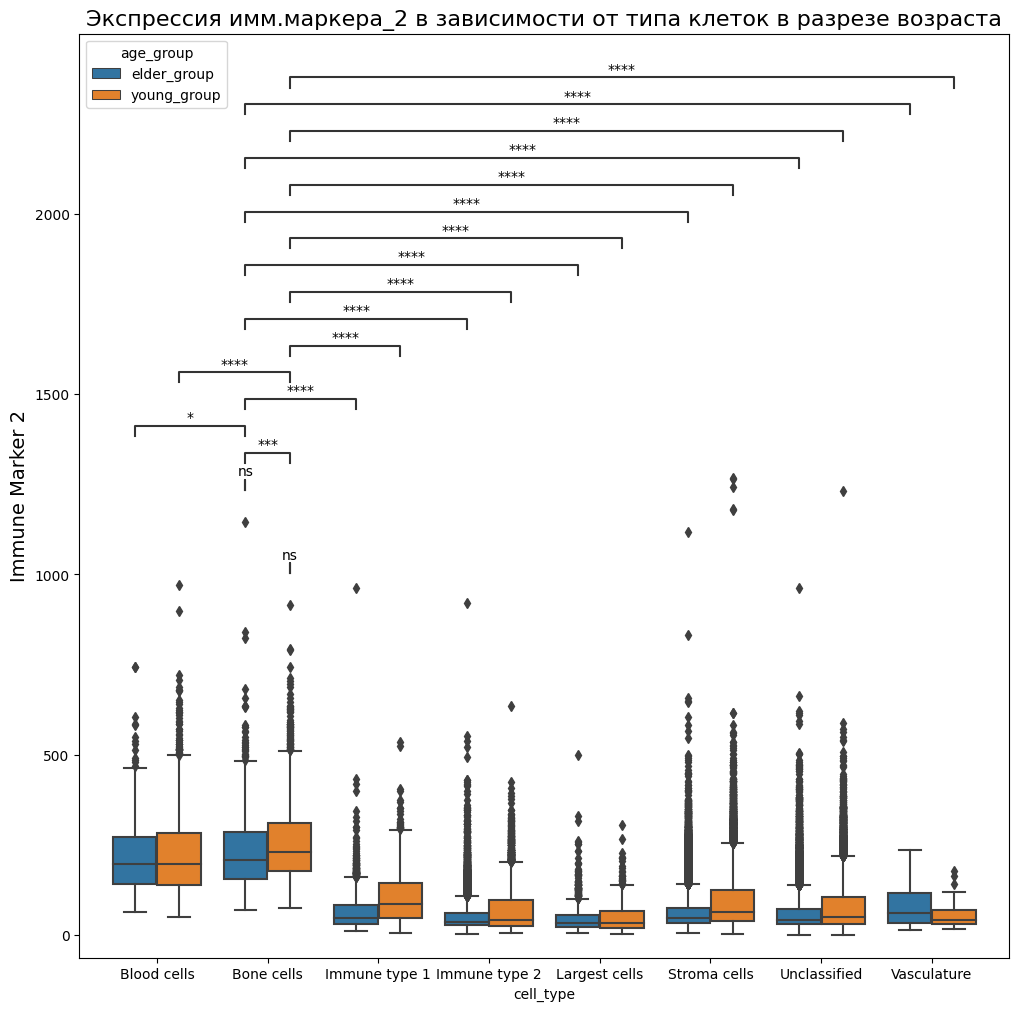

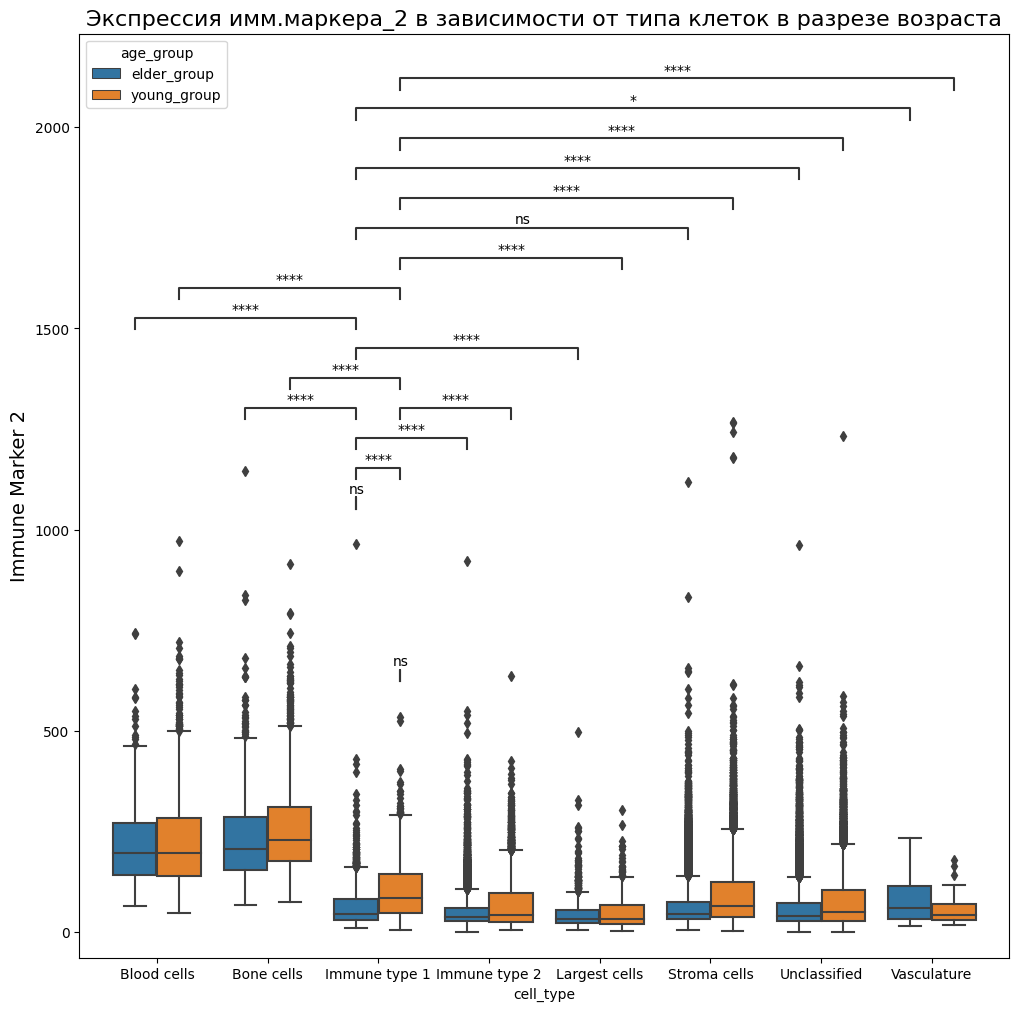

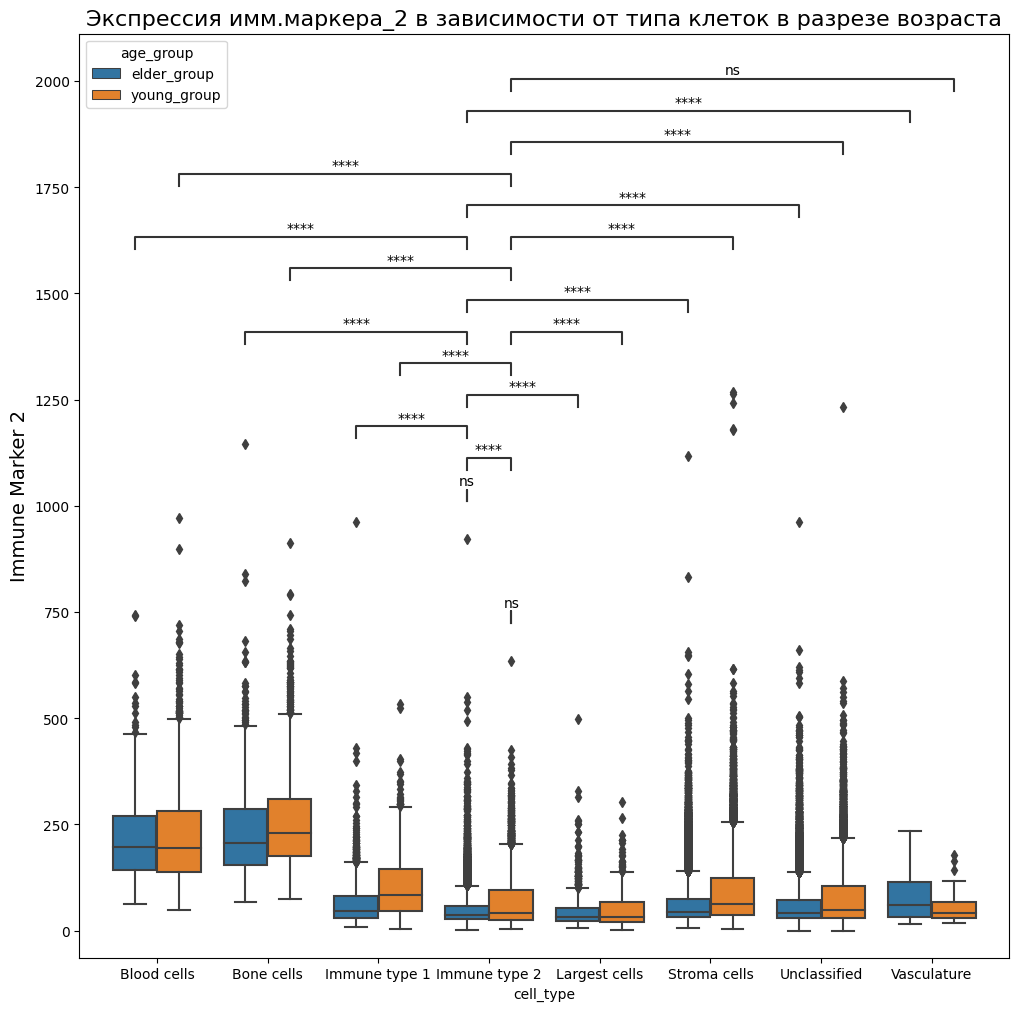

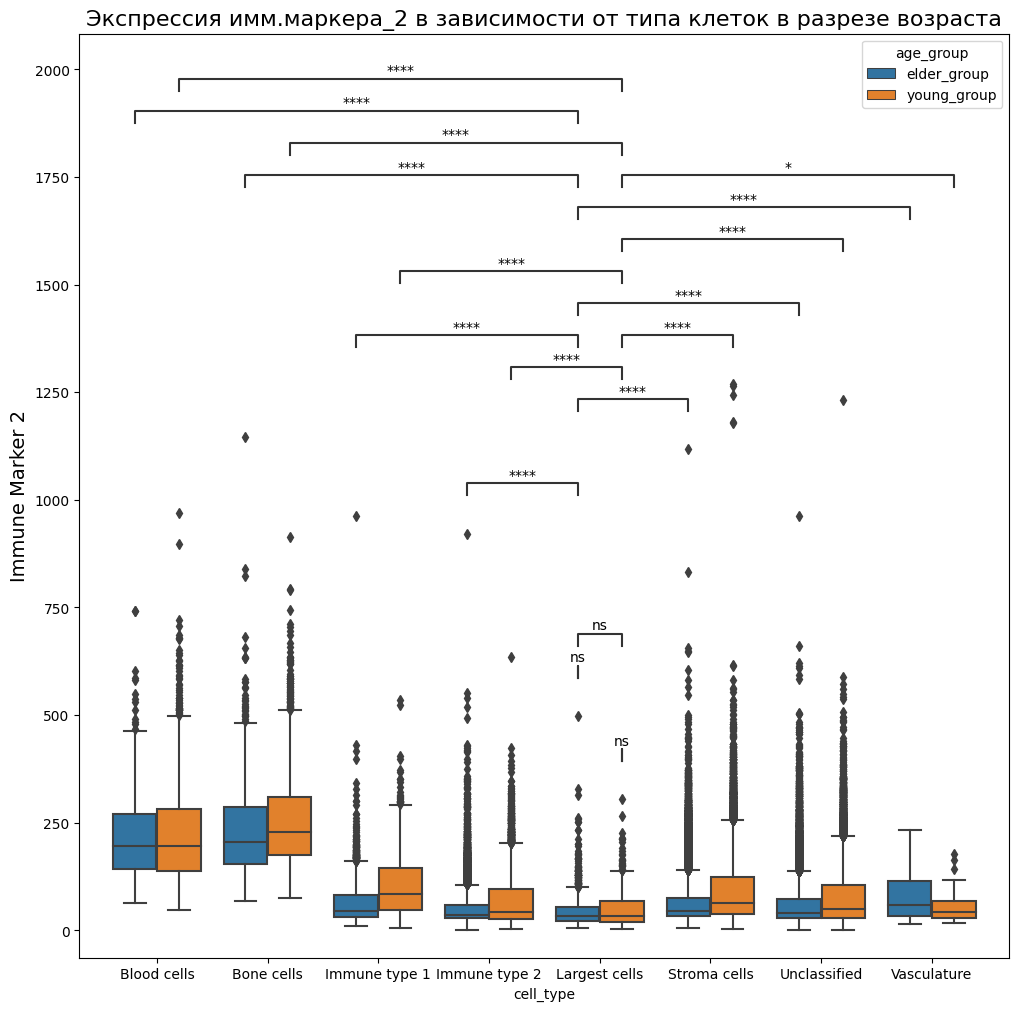

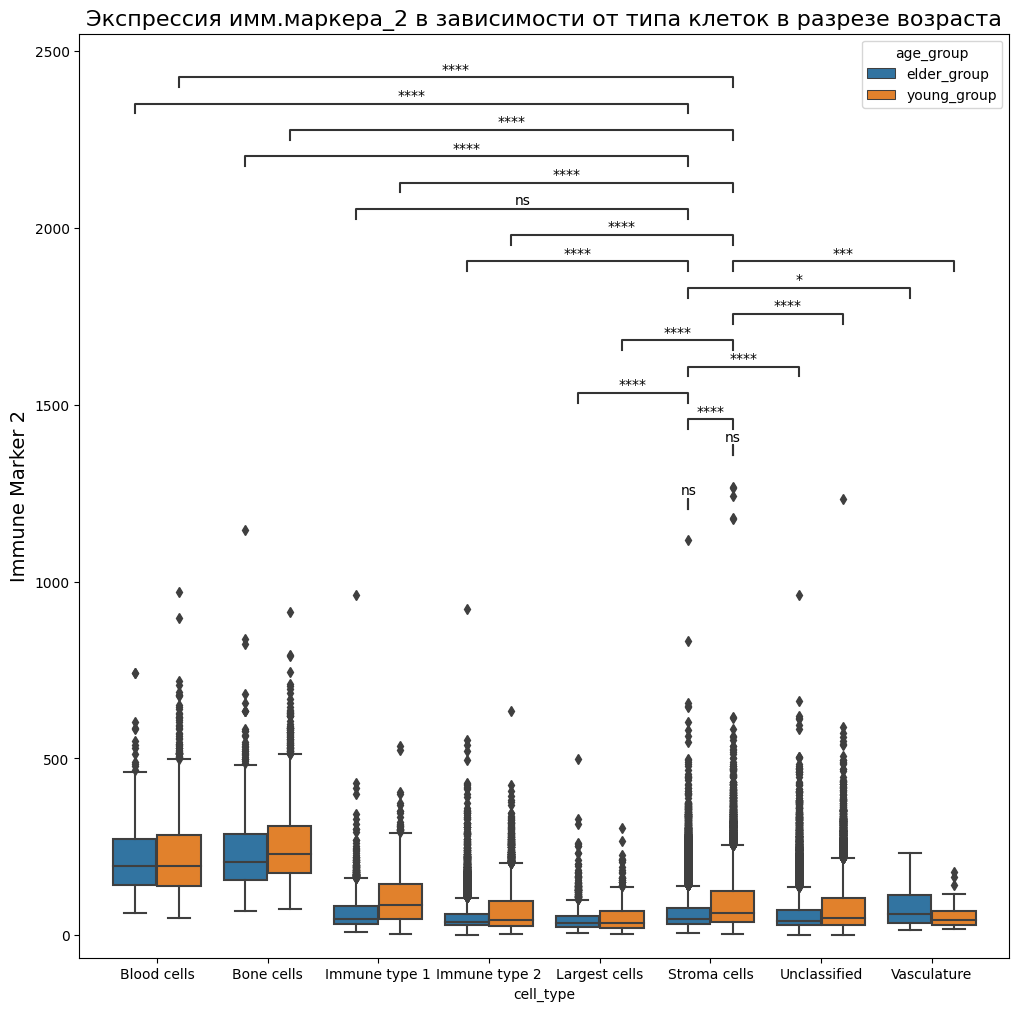

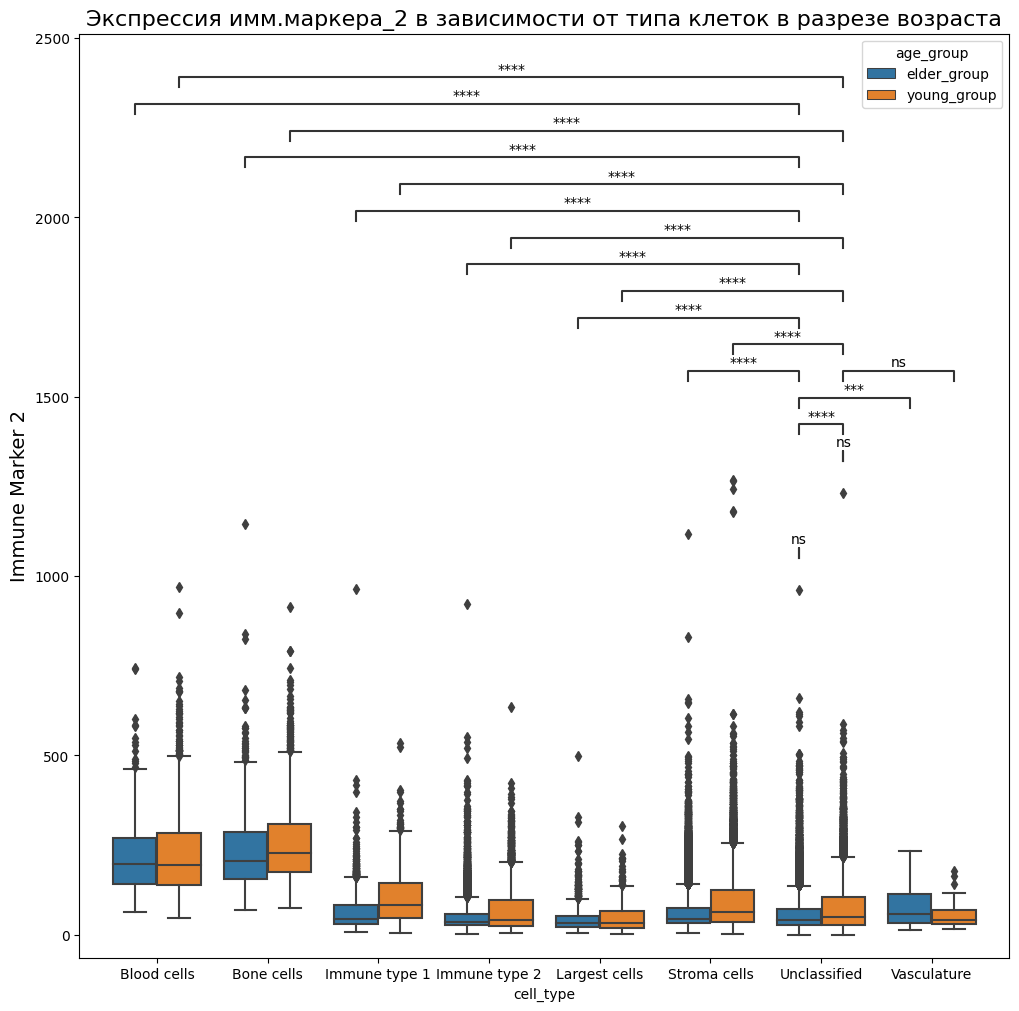

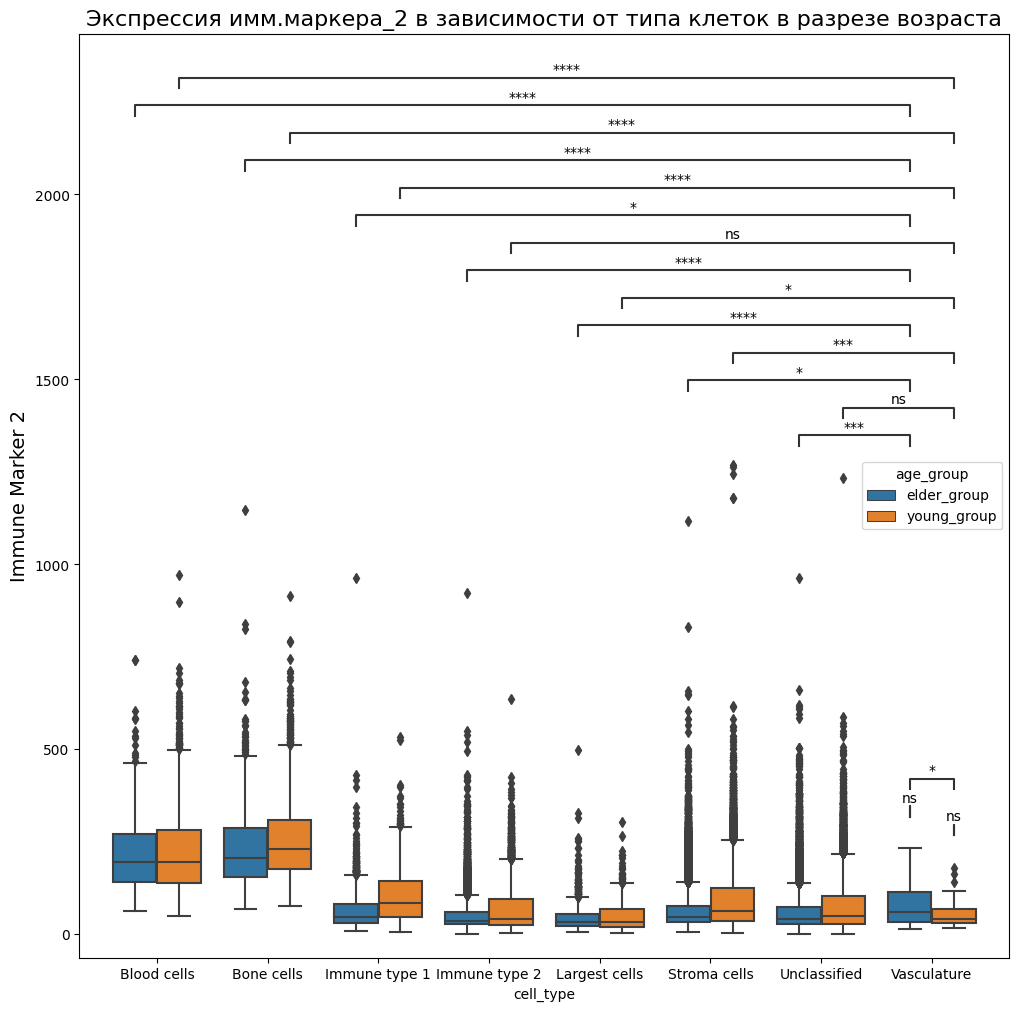

In [519]:
x='cell_type'
y = 'immune_marker_2'
hue='age_group'
order = ['Blood cells',
 'Bone cells',
 'Immune type 1',
 'Immune type 2',
 'Largest cells',
 'Stroma cells',
 'Unclassified',
 'Vasculature']


hue_order=['elder_group','young_group']
for i in range(len(order)):
    pairs = [((order[i], 'elder_group'), (order[j-1], 'elder_group'))
        for j in range(len(order))
    ]

    pairs = pairs + [((order[i], 'young_group'), (order[j-1], 'young_group'))
        for j in range(len(order))
    ]

    pairs =  pairs + [((order[i], 'young_group'), (order[i], 'elder_group'))]

    plt.figure(figsize=(12, 12))
    cell_immune_box = sns.boxplot(
    data=cell_immune, x='cell_type', y = 'immune_marker_2',
    hue=hue, hue_order=hue_order
    )
    cell_immune_box.axes.set_title(
    "Экспрессия имм.маркера_2 в зависимости от типа клеток в разрезе возраста", fontsize=16
    )
    cell_immune_box.set_ylabel("Immune Marker 2", fontsize=14)

    annotator = Annotator(
    cell_immune_box, pairs, data=cell_immune, x=x, y=y,
    hue_order=hue_order, hue=hue
    )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

        Выводы (пишу только для Н0 (т.е. ns)):

1. У пожилых -Immune_type_1 - Stroma_cell

2. У молодых - Immune_type_2 - Vasculture, Unclassified - Vasculture

3. В сравнении с возрастов определнная клетка - Blood cells, Largest_cells, 

Есть ли стат-значимость между типом клетки и:

в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.

In [520]:
distance_cell = df.groupby(['cell_type']).agg(
    {'age_group': lambda x: list(x),
    'distance_to_vasculature': lambda x: list(x),
    'distance_to_largest_cell': lambda x: list(x)}
).reset_index()

In [521]:
distance_cell

cell_type                                          age_group  \
0    Blood cells  [elder_group, elder_group, elder_group, elder_...   
1     Bone cells  [elder_group, elder_group, young_group, young_...   
2  Immune type 1  [elder_group, elder_group, young_group, young_...   
3  Immune type 2  [elder_group, elder_group, elder_group, elder_...   
4  Largest cells  [elder_group, elder_group, young_group, young_...   
5   Stroma cells  [elder_group, elder_group, elder_group, elder_...   
6   Unclassified  [elder_group, elder_group, elder_group, elder_...   
7    Vasculature  [elder_group, elder_group, elder_group, elder_...   

                             distance_to_vasculature  \
0  [773.7891530231861, 794.4061221996847, 618.278...   
1  [576.9724105540272, 695.9922303777668, 1781.58...   
2  [764.88395727298, 576.8151504565832, 704.83078...   
3  [578.7958726003382, 627.1135594611401, 576.109...   
4  [797.3148965918499, 578.8825276172576, 831.791...   
5  [988.509380318229, 787.8523792601101, 960.6355...   
6  [702.0330324345003, 830.3993709869218, 812.104...   
7  [576.4825382661732, 576.4434091828192, 576.824...   

                            distance_to_largest_cell  
0  [676.1091486213384, 625.5701586155337, 649.353...  
1  [653.6741718122352, 738.9103129087327, 802.467...  
2  [718.6504994172337, 860.8146003798269, 883.960...  
3  [604.0650906980705, 636.0461475428807, 637.306...  
4  [576.8122135735607, 576.7106433223408, 576.813...  
5  [612.0765057498506, 637.7872020231666, 700.283...  
6  [676.4096948154952, 863.26992963982, 845.40033...  
7  [809.1318396847477, 697.2194420947202, 630.215...

In [522]:
distance_cell = distance_cell.explode(
    ['age_group','distance_to_vasculature','distance_to_largest_cell']
)

distance_cell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   cell_type                 269442 non-null  category
 1   age_group                 269442 non-null  object  
 2   distance_to_vasculature   269442 non-null  object  
 3   distance_to_largest_cell  269442 non-null  object  
dtypes: category(1), object(3)
memory usage: 8.5+ MB


In [523]:
distance_cell['age_group'] = distance_cell['age_group'].astype('category')
distance_cell['distance_to_vasculature'] = distance_cell['distance_to_vasculature'].astype('float16')
distance_cell['distance_to_largest_cell'] = distance_cell['distance_to_largest_cell'].astype('float16')

distance_cell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269442 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   cell_type                 269442 non-null  category
 1   age_group                 269442 non-null  category
 2   distance_to_vasculature   269442 non-null  float16 
 3   distance_to_largest_cell  269442 non-null  float16 
dtypes: category(2), float16(2)
memory usage: 3.6 MB


In [524]:
distance_cell.head()

cell_type    age_group  distance_to_vasculature  distance_to_largest_cell
0  Blood cells  elder_group                    774.0                     676.0
0  Blood cells  elder_group                    794.5                     625.5
0  Blood cells  elder_group                    618.5                     649.5
0  Blood cells  elder_group                    729.0                     838.0
0  Blood cells  elder_group                    770.5                     687.5

((array([-4.55878463, -4.36887615, -4.26588095, ...,  4.26588095,
          4.36887615,  4.55878463]),
  array([6.36 , 6.36 , 6.36 , ..., 7.625, 7.625, 7.63 ], dtype=float16)),
 (0.23725069400818388, 6.8046875, 0.9921168841125578))

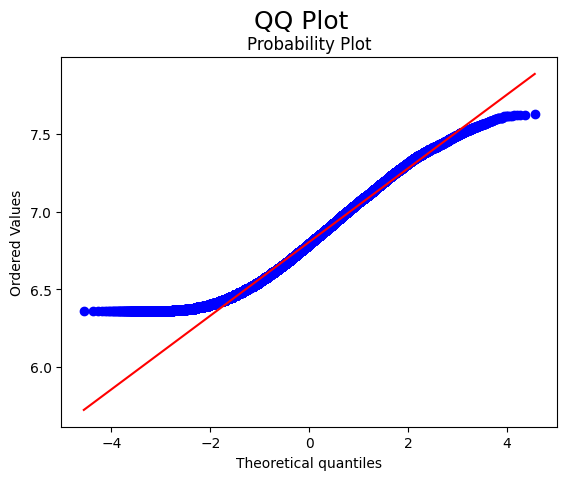

In [525]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(distance_cell['distance_to_vasculature']), dist="norm", plot=ax1
)

In [526]:
stats.shapiro(distance_cell['distance_to_vasculature'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9473015069961548, pvalue=0.0)

((array([-4.55878463, -4.36887615, -4.26588095, ...,  4.26588095,
          4.36887615,  4.55878463]),
  array([6.36, 6.36, 6.36, ..., 8.06, 8.06, 8.06], dtype=float16)),
 (0.15935161524384872, 6.625, 0.9621129280675264))

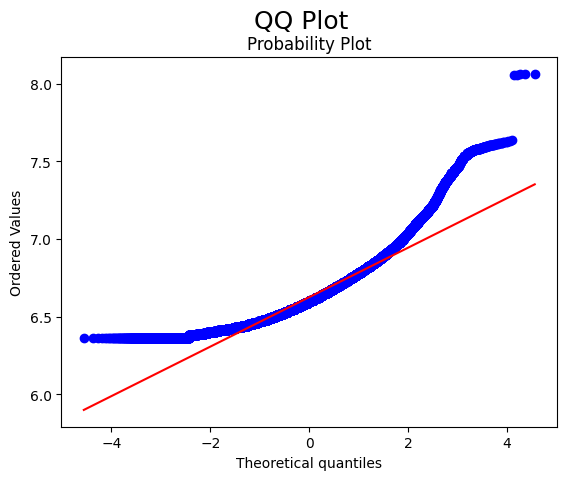

In [527]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(distance_cell['distance_to_largest_cell']), dist="norm", plot=ax1
)

In [528]:
stats.shapiro(distance_cell['distance_to_largest_cell'])


ShapiroResult(statistic=0.8314034342765808, pvalue=0.0)

In [529]:
stats.normaltest(distance_cell['distance_to_largest_cell'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1238: RuntimeWarning:

overflow encountered in square

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1242: RuntimeWarning:

overflow encountered in square

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1244: RuntimeWarning:

overflow encountered in multiply

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning:

invalid value encountered in reduce



NormaltestResult(statistic=nan, pvalue=nan)

В любом случае выборка по двум колонкам дистанций не походиn на нормальное, поэтому будем использовать непараментические тесты

In [530]:
H0 = 'Расстояние независмо от вида клеток одинаково'
HA = 'Расстояние до сосудистых клеток неодинаково у разных клеток'

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.357e+05
Blood cells_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.638e+06
Blood cells_elder_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:9.442e-53 U_stat=3.421e+05
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.115e-01 U_stat=1.068e+05
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.492e-01 U_stat=2.436e+06
Blood cells_elder_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:4.156e-02 U_stat=4.369e+05
Blood cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxo

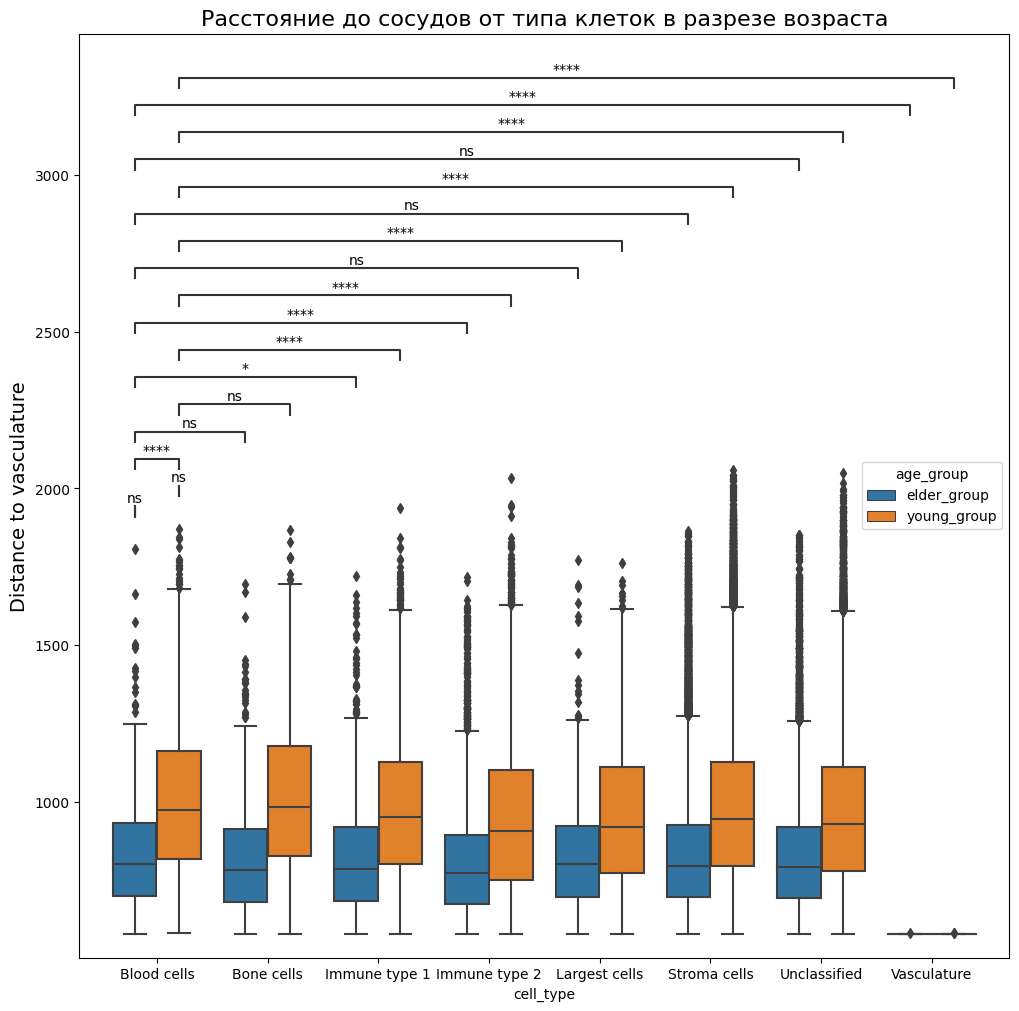

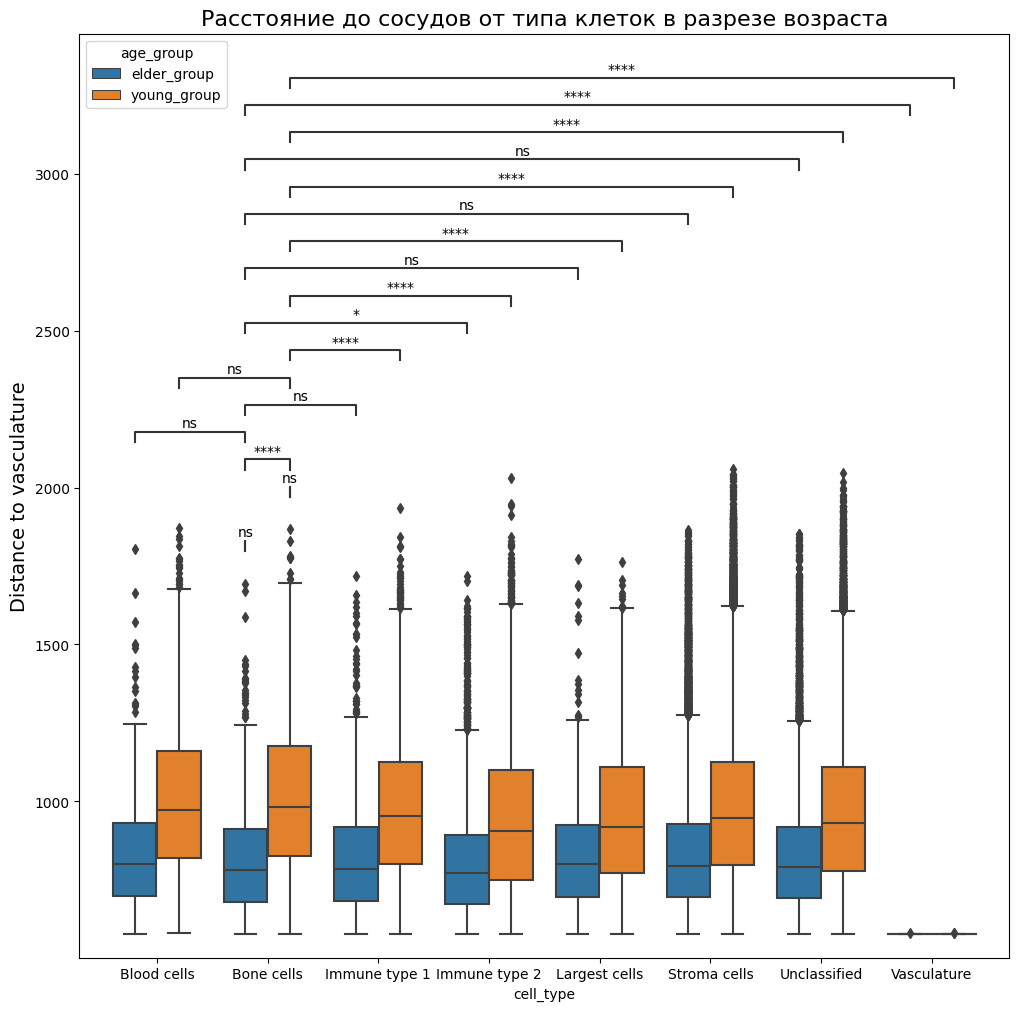

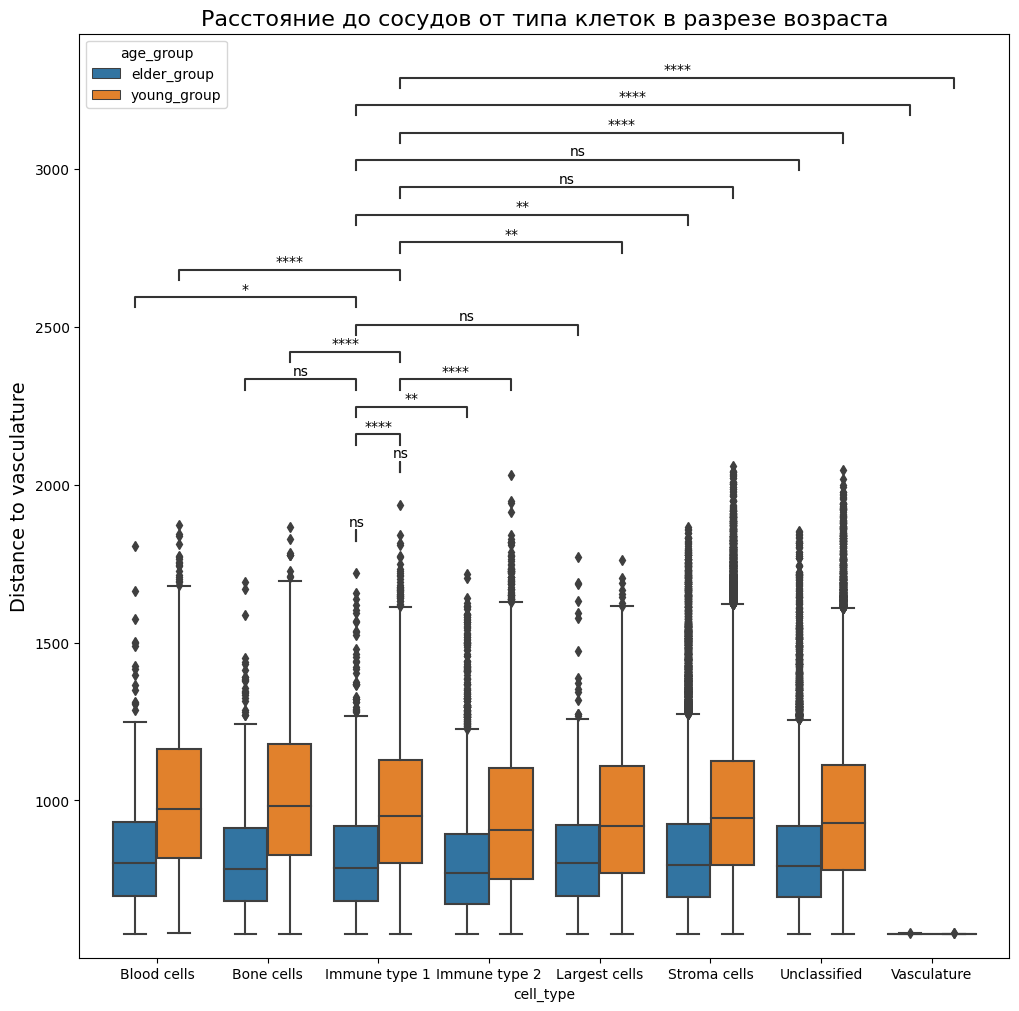

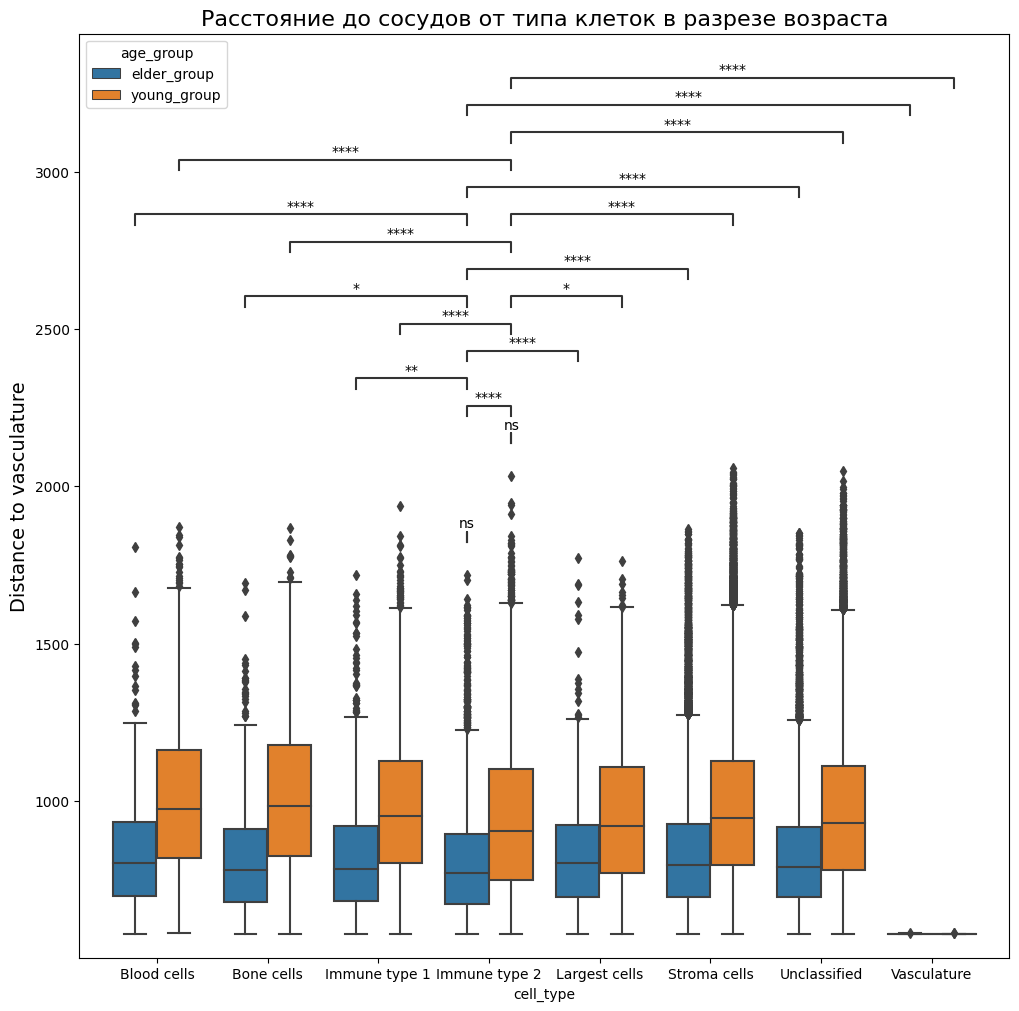

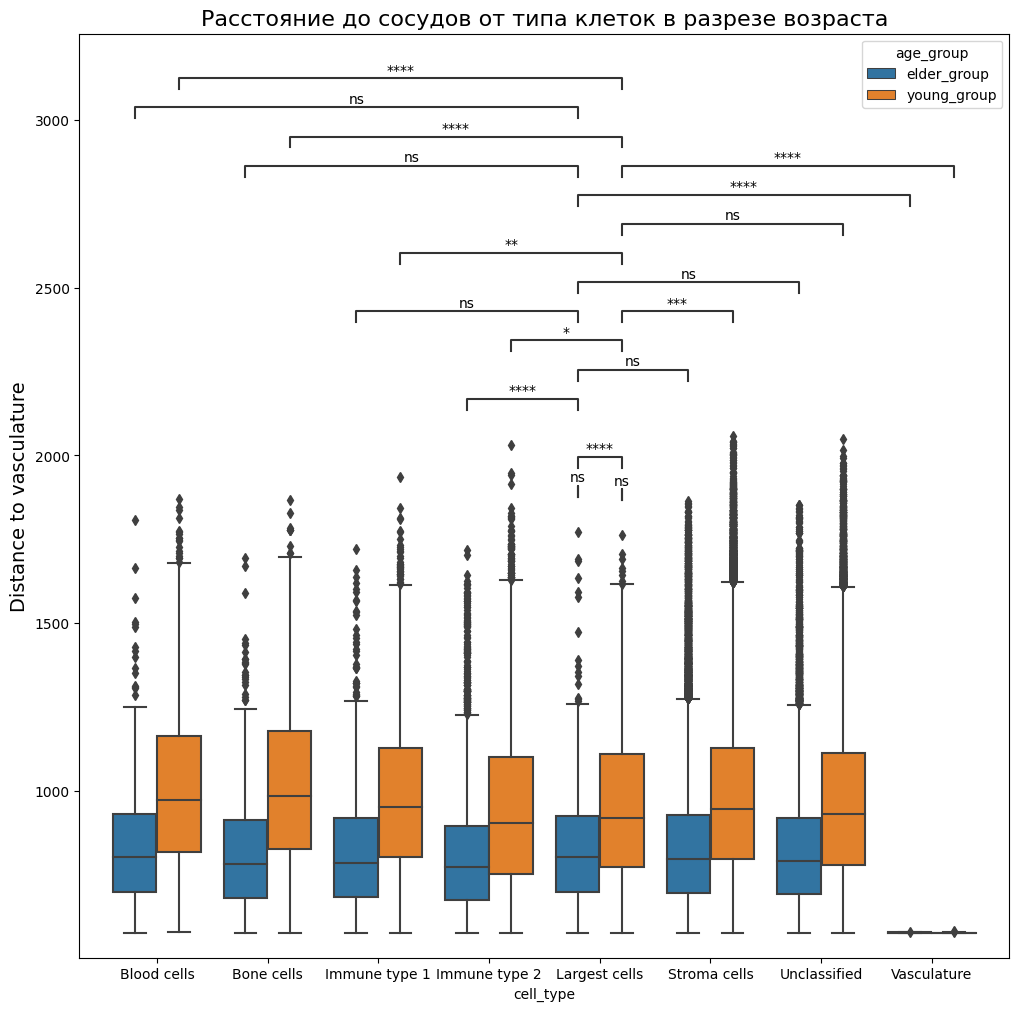

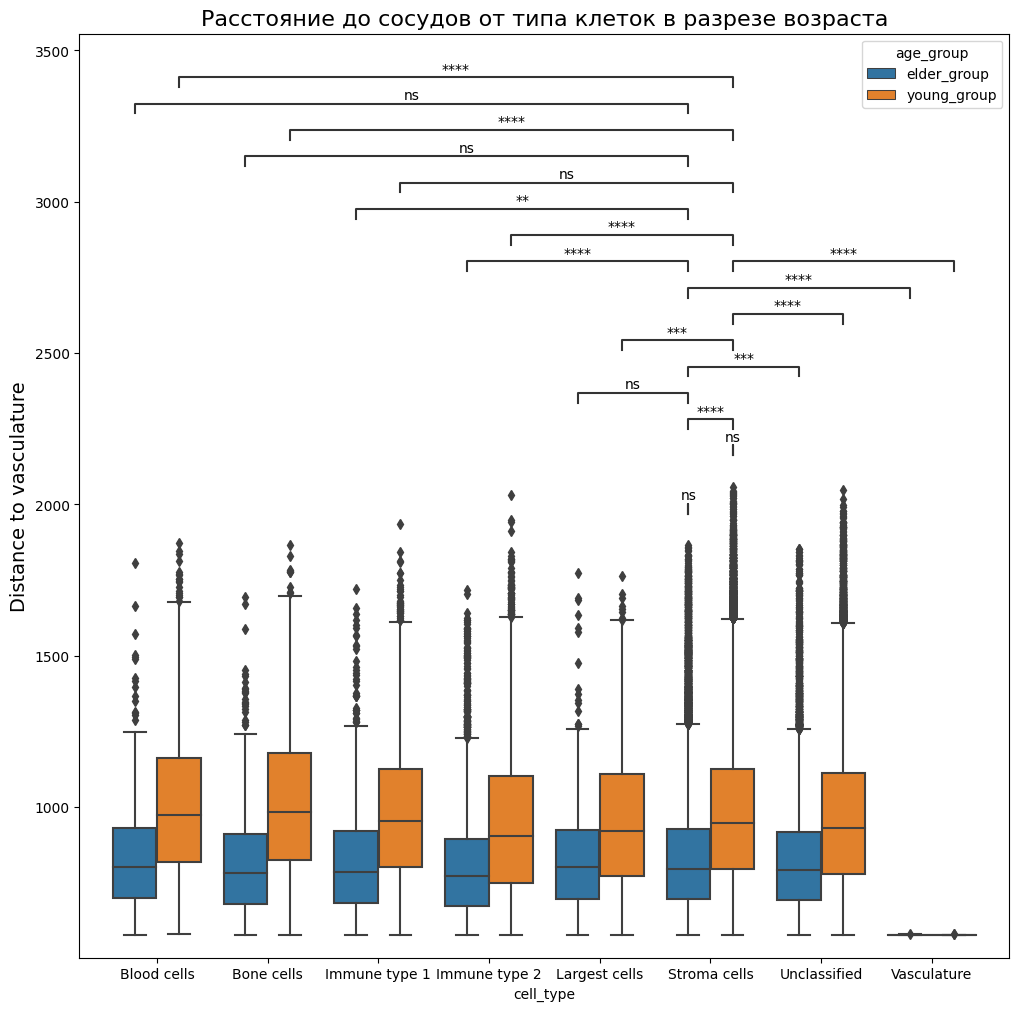

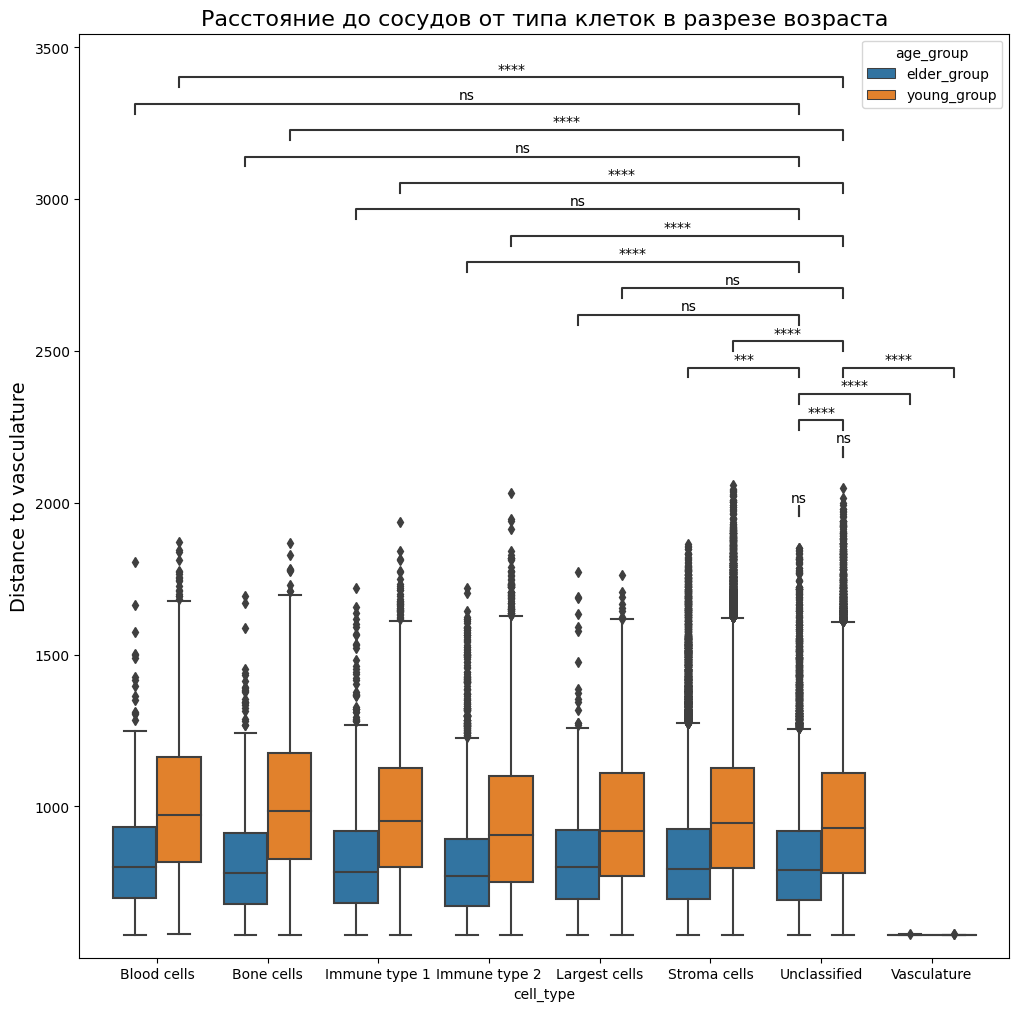

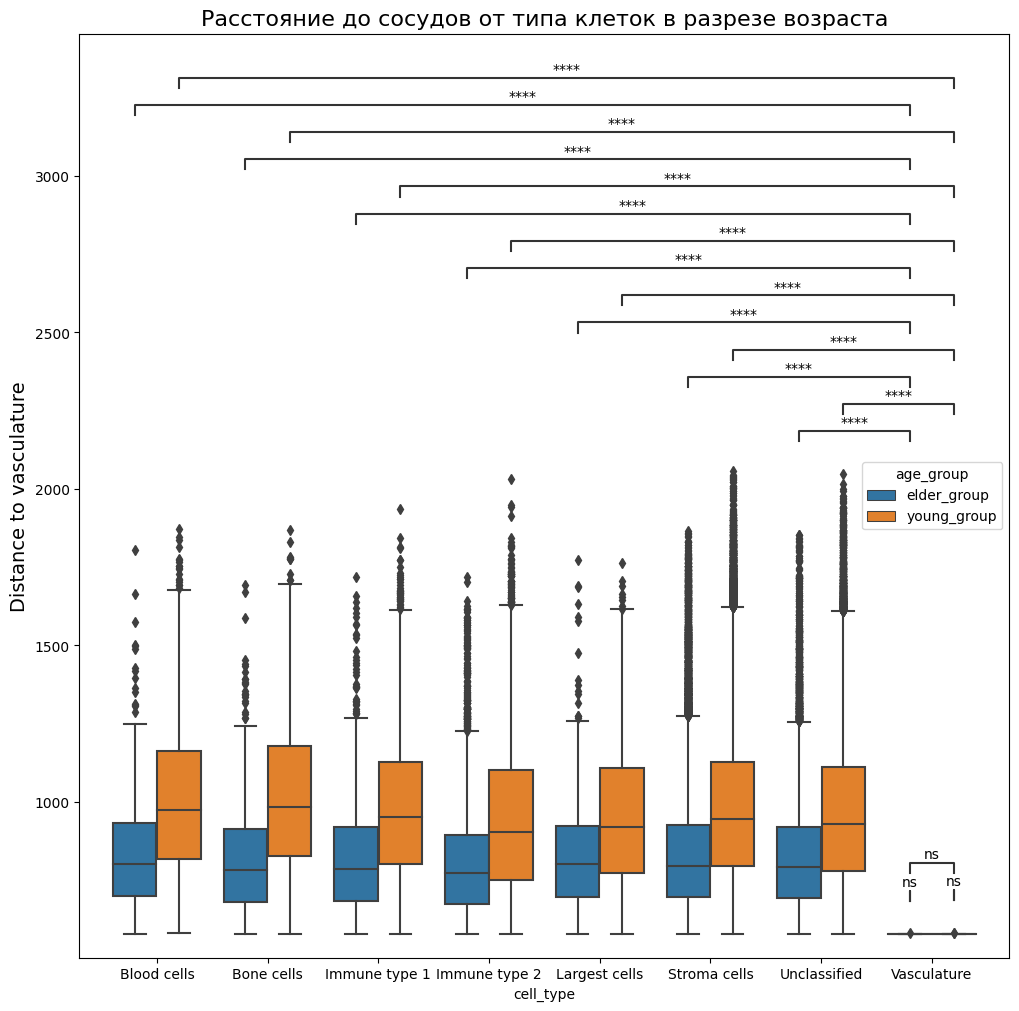

In [531]:
x='cell_type'
y = 'distance_to_vasculature'
hue='age_group'
order = ['Blood cells',
 'Bone cells',
 'Immune type 1',
 'Immune type 2',
 'Largest cells',
 'Stroma cells',
 'Unclassified',
 'Vasculature']


hue_order=['elder_group','young_group']
for i in range(len(order)):
    pairs = [((order[i], 'elder_group'), (order[j-1], 'elder_group'))
        for j in range(len(order))
    ]

    pairs = pairs + [((order[i], 'young_group'), (order[j-1], 'young_group'))
        for j in range(len(order))
    ]

    pairs =  pairs + [((order[i], 'young_group'), (order[i], 'elder_group'))]

    plt.figure(figsize=(12, 12))
    distance_cell_box = sns.boxplot(
        data=distance_cell, x='cell_type', y = 'distance_to_vasculature',
        hue=hue, hue_order=hue_order
    )
    distance_cell_box.axes.set_title(
        "Расстояние до сосудов от типа клеток в разрезе возраста", fontsize=16
    )
    distance_cell_box.set_ylabel("Distance to vasculature", fontsize=14)

    annotator = Annotator(
        distance_cell_box, pairs, data=distance_cell, x=x, y=y,
        hue=hue, hue_order=hue_order
    )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

        Выводы (только для Н0 (т.е. ns):

1. У пожилых - 
Blood cell - Bone cell,
Blood cell - Largwst cell, 
Blood cell - Stroma cell, 
Blood cell - Unclassified, 
Bone cell - Immune type 1, 
Bone cell - Largest cell, 
Bone cell - Stroma cell, 
Immune type 1 - LArgest cell, 
Immune type 1 - Unclassified, 
Larget cell - Stroma cell, 
Larget cell - Unclassified,

2. У молодых - 
Blood cell - Bone cell, 
Immune type 1 - Stroma cell, 
Larget cell - Unclassified,

3. По возрасту у определенной клетки - Vasculature

Многие клетки у пожилых распологаются на одниковом расстоянии до сосудов

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.357e+05
Blood cells_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.638e+06
Blood cells_elder_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.095e-06 U_stat=5.188e+05
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:4.354e-01 U_stat=9.878e+04
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:4.860e-02 U_stat=2.401e+06
Blood cells_elder_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.349e-02 U_stat=3.827e+05
Blood cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxo

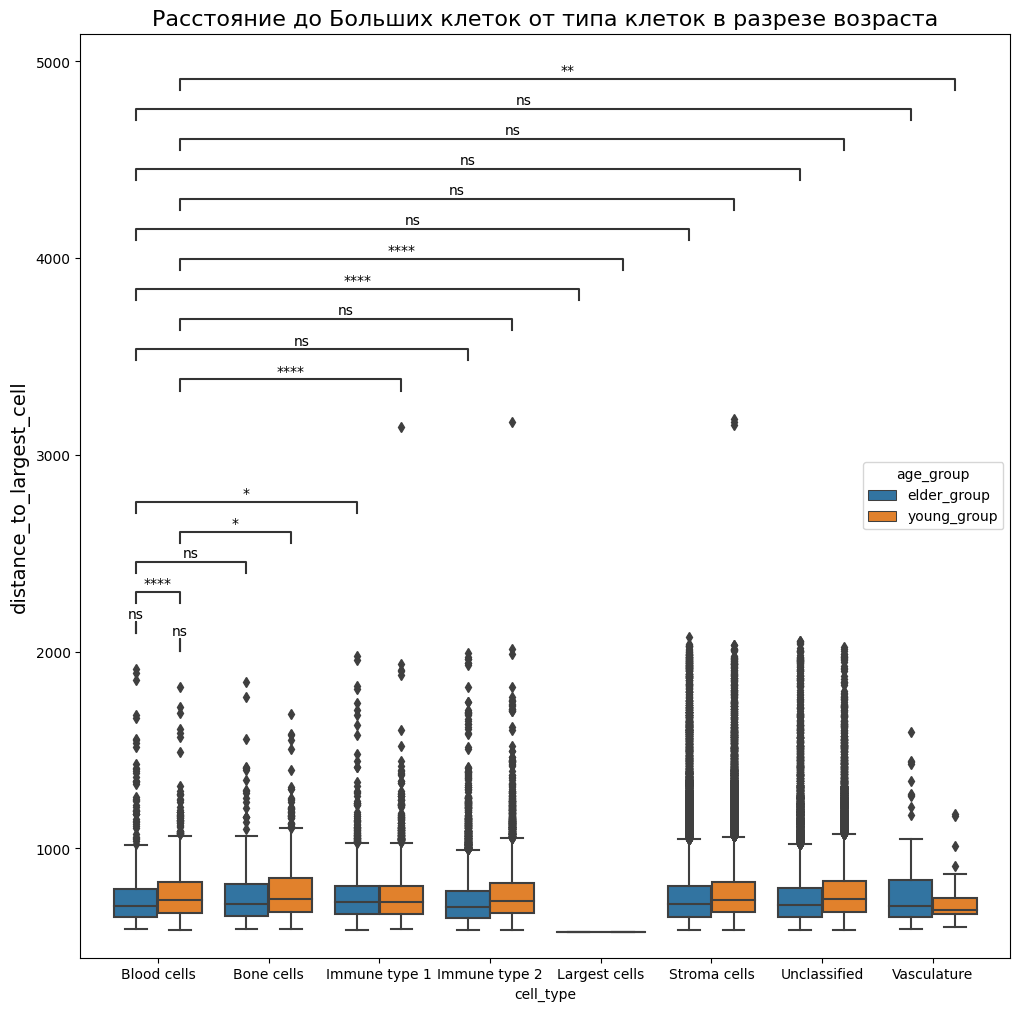

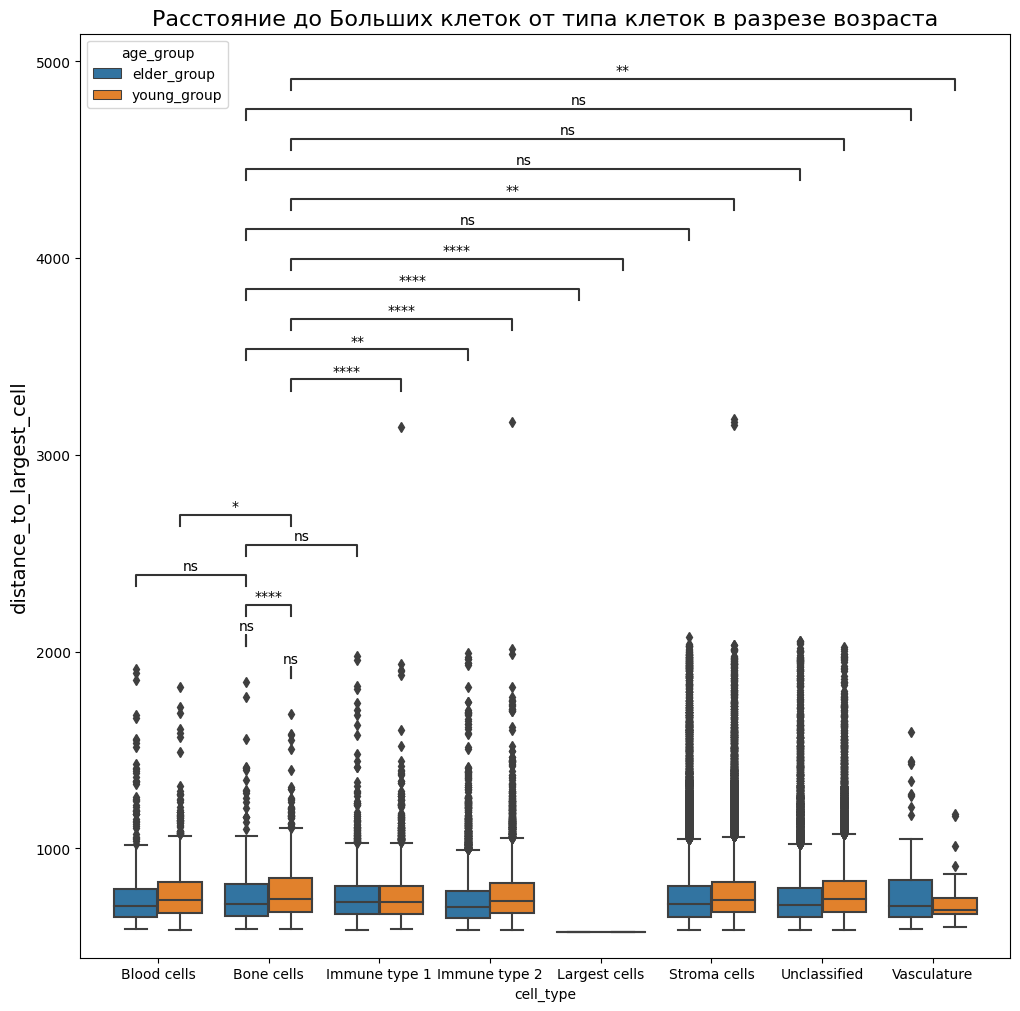

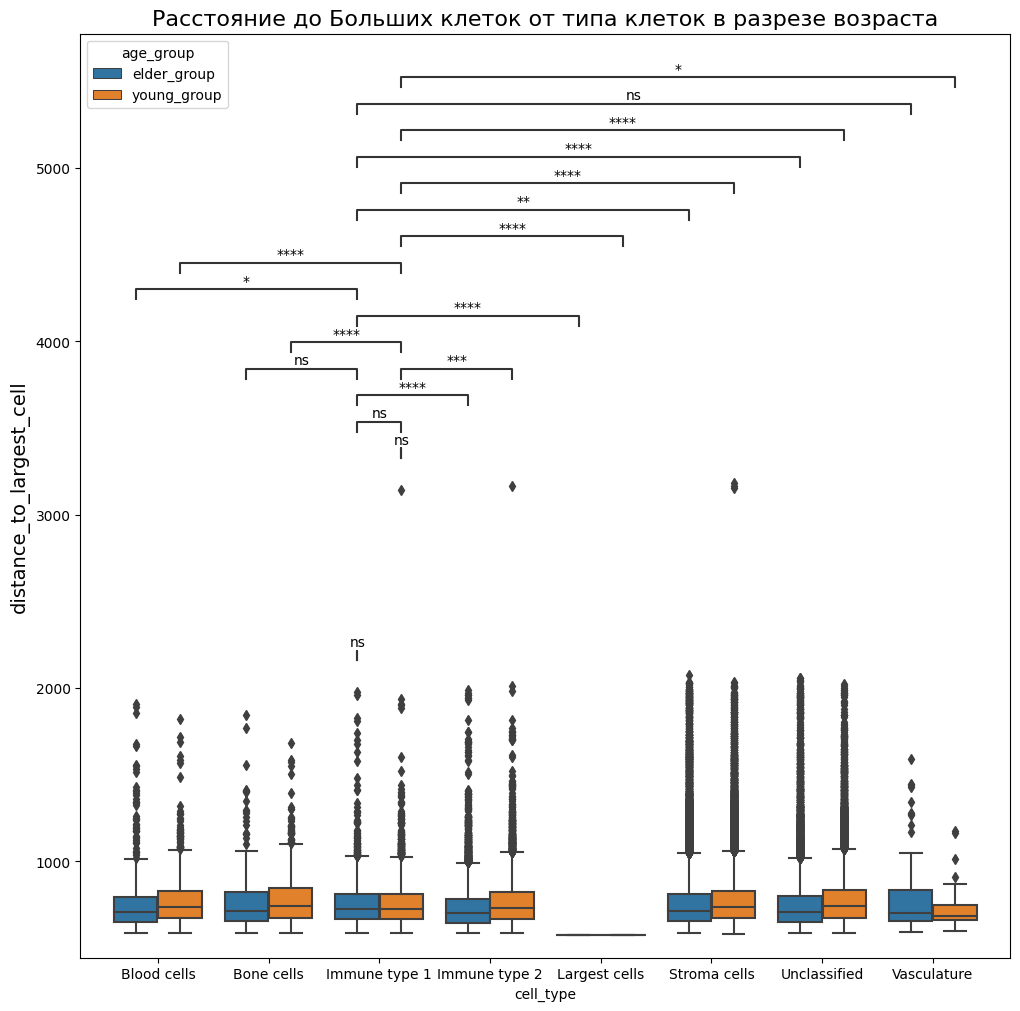

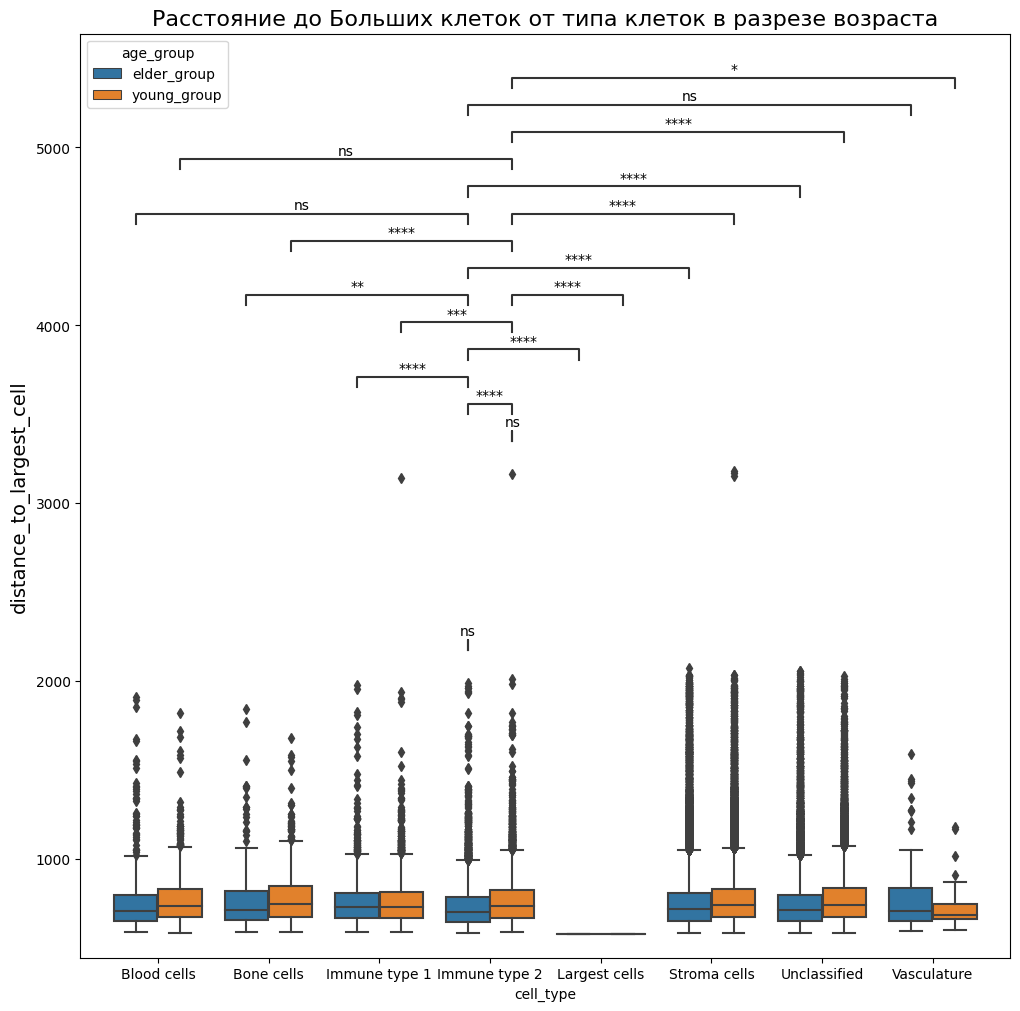

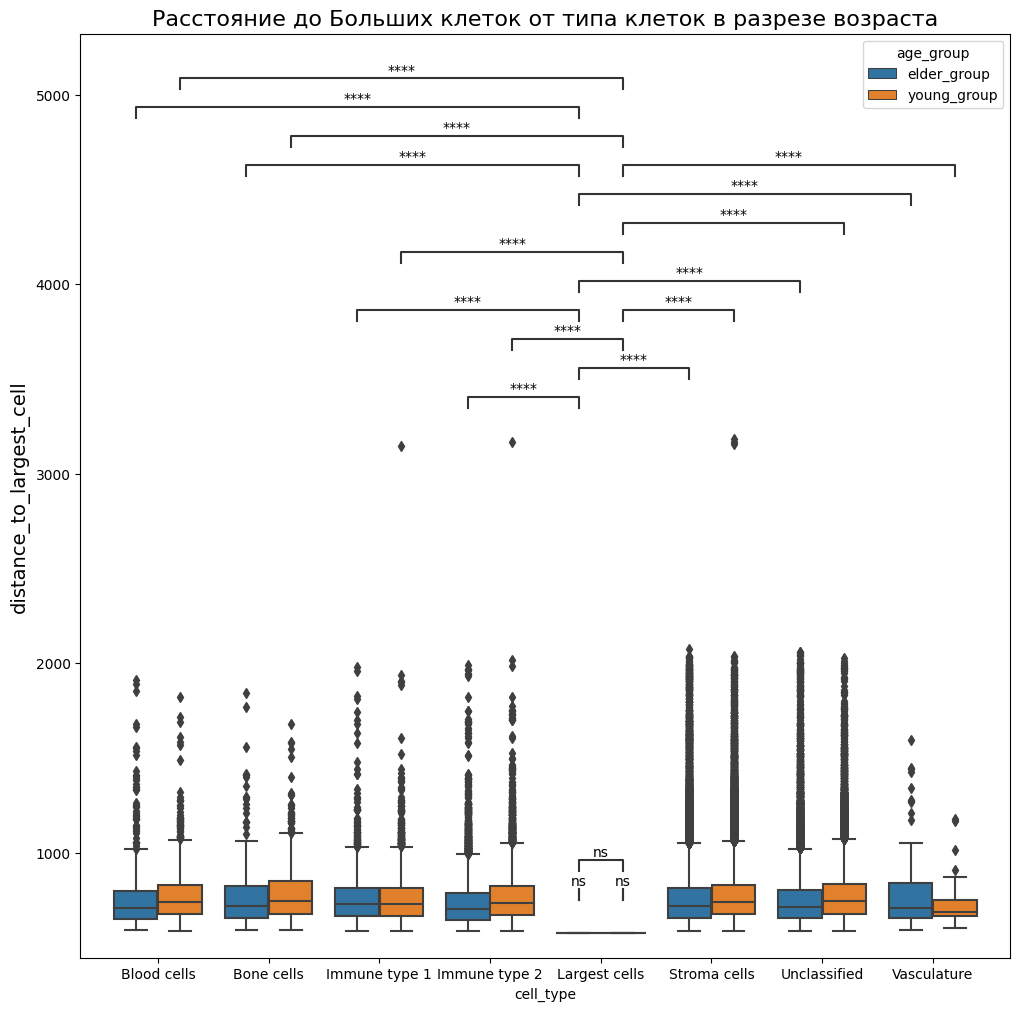

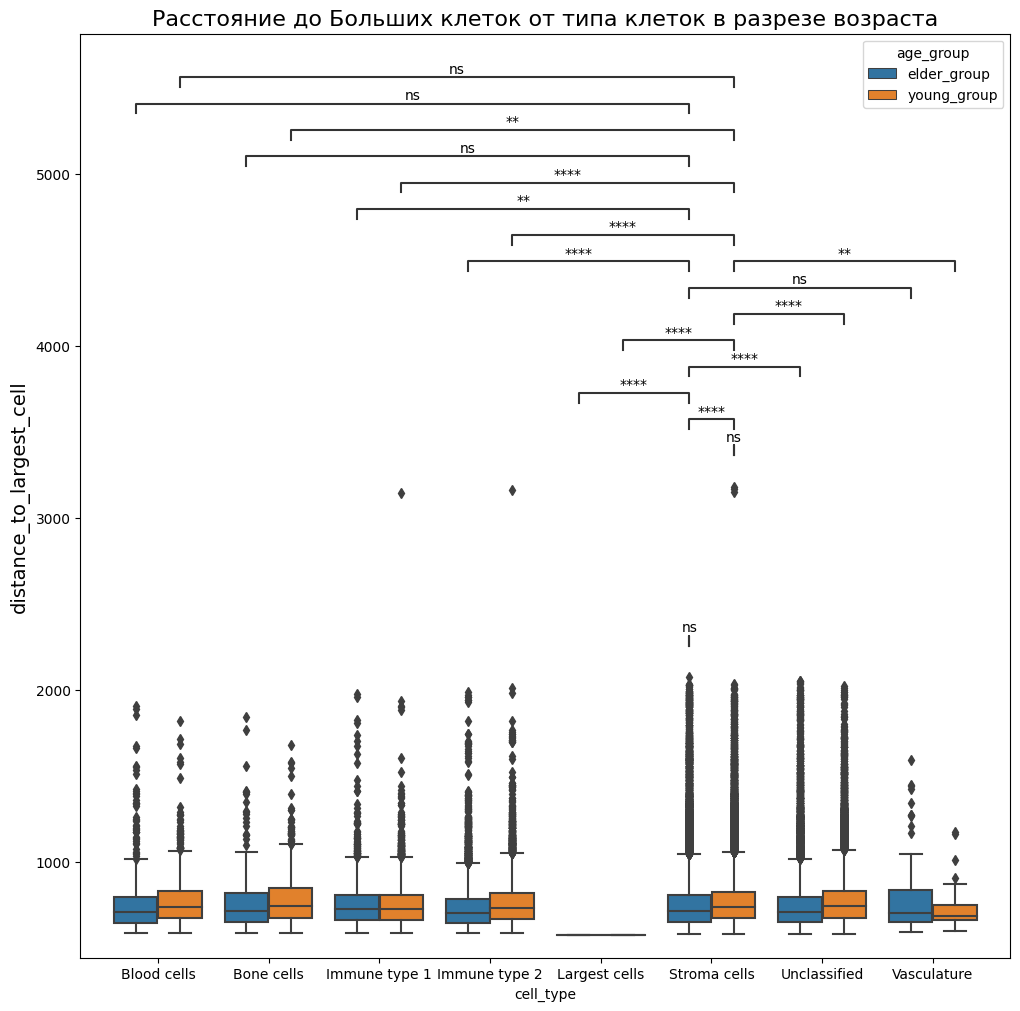

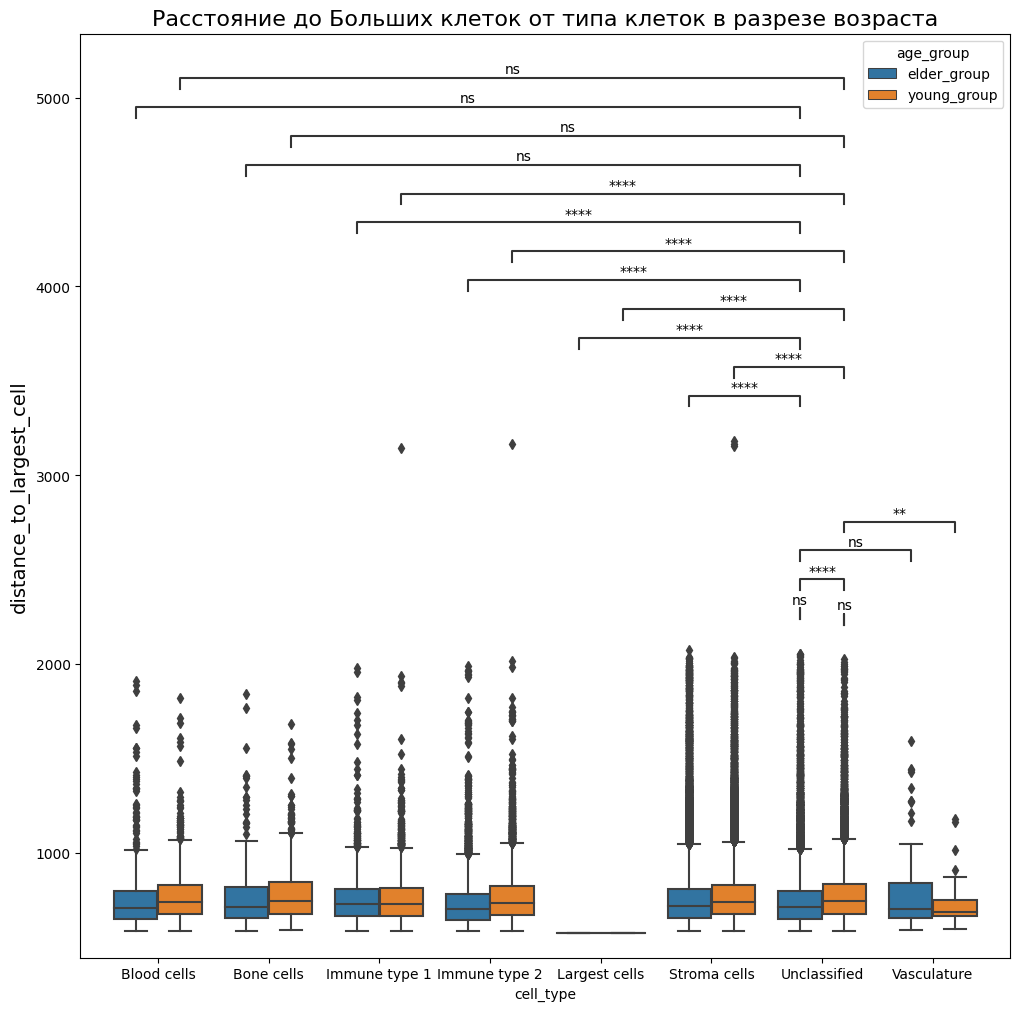

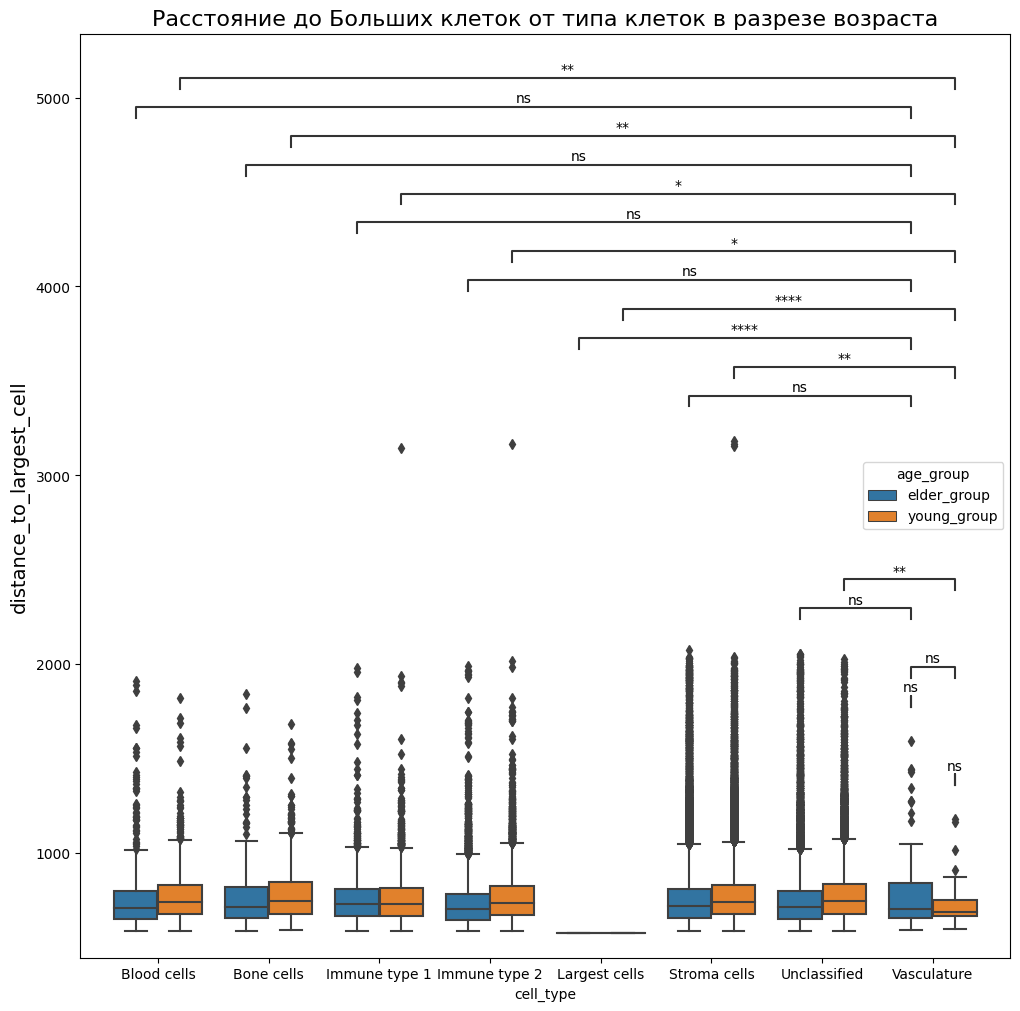

In [532]:
x='cell_type'
y = 'distance_to_largest_cell'
hue='age_group'
order = ['Blood cells',
 'Bone cells',
 'Immune type 1',
 'Immune type 2',
 'Largest cells',
 'Stroma cells',
 'Unclassified',
 'Vasculature']


hue_order=['elder_group','young_group']
for i in range(len(order)):
    pairs = [((order[i], 'elder_group'), (order[j-1], 'elder_group'))
        for j in range(len(order))
    ]

    pairs = pairs + [((order[i], 'young_group'), (order[j-1], 'young_group'))
        for j in range(len(order))
    ]

    pairs =  pairs + [((order[i], 'young_group'), (order[i], 'elder_group'))]

    plt.figure(figsize=(12, 12))
    distance_cell_box = sns.boxplot(
        data=distance_cell, x='cell_type', y = 'distance_to_largest_cell',
        hue=hue, hue_order=hue_order
    )
    distance_cell_box.axes.set_title(
        "Расстояние до Больших клеток от типа клеток в разрезе возраста", fontsize=16
    )
    distance_cell_box.set_ylabel("distance_to_largest_cell", fontsize=14)

    annotator = Annotator(
        distance_cell_box, pairs, data=distance_cell, x=x, y=y,
        hue=hue, hue_order=hue_order
    )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()

        Выводы (только для Н0 (т.е. ns):

1. У пожилых - 
Blood cell - Bone cell,
Blood cell - Immune type 2,
Bone cell - Immune type 1,
Blood cell - Stroma cell, 
Bone cell - Stroma cell,
Blood cell - Unclassified, 
Bone cell - Unclassified,
Blood cell - Vasculature,
Bone cell - Unclassified,
Immune type 1 - Vasculature,
Immune type 2 - Vasculature,
Stroma cell - Vasculature
Uncassifies - Vaculature

2. У молодых - 
Blood cell - Immune type 2,
Blood cell - Stroma cell,
Blood cell - Unclassified
Bone cell - Unclassified

3. По возрасту у определенной клетки - Immue_type, Largest cell, Vasculature


Многие клетки у пожилых распологаются на одниковом расстоянии до больших клеток

    2 Вопрос.В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток,

по Оу — их количество.

Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [533]:
cell_types = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]


cell_interactions = [
    'community_1', 'community_2', 'community_3',
    'community_4', 'community_5', 'community_6'
]

In [534]:
community = pd.pivot_table(df, 
                index=['cell_interaction','case_id'],
                columns='cell_type',
                values='age_group',
                aggfunc=len
                ).fillna(0).reset_index()
                
community

cell_type cell_interaction  case_id  Blood cells  Bone cells  Immune type 1  \
0              community_1       40         37.0        27.0           27.0   
1              community_1      199        155.0        37.0           39.0   
2              community_1      559         42.0        29.0           11.0   
3              community_1      566          9.0        15.0            4.0   
4              community_1      693        351.0       799.0          306.0   
5              community_1      708         53.0        59.0           34.0   
6              community_1      891         20.0         8.0            4.0   
7              community_1      983        143.0       154.0          156.0   
8              community_2       40         40.0        10.0          130.0   
9              community_2      199         96.0        11.0          204.0   
10             community_2      559         17.0         3.0           24.0   
11             community_2      566         11.0         6.0           28.0   
12             community_2      693        203.0       105.0          545.0   
13             community_2      708         24.0         7.0           64.0   
14             community_2      891         19.0         1.0           18.0   
15             community_2      983         89.0        25.0          383.0   
16             community_3       40         20.0        12.0          293.0   
17             community_3      199         28.0         6.0          155.0   
18             community_3      559          3.0         2.0           22.0   
19             community_3      566          3.0         5.0           28.0   
20             community_3      693         19.0        13.0          127.0   
21             community_3      708          5.0         4.0           97.0   
22             community_3      891         18.0        13.0           46.0   
23             community_3      983          5.0         5.0           73.0   
24             community_4       40         18.0         3.0            6.0   
25             community_4      199         91.0         3.0           25.0   
26             community_4      559         18.0         0.0            1.0   
27             community_4      566         21.0         3.0            7.0   
28             community_4      693        556.0       406.0          338.0   
29             community_4      708         23.0         2.0            8.0   
30             community_4      891          6.0         0.0            5.0   
31             community_4      983        190.0        68.0          135.0   
32             community_5       40         77.0        91.0          469.0   
33             community_5      199         87.0        56.0          264.0   
34             community_5      559         31.0        33.0           54.0   
35             community_5      566          6.0         7.0           23.0   
36             community_5      693         59.0       236.0          272.0   
37             community_5      708         19.0        44.0          171.0   
38             community_5      891         22.0        37.0           57.0   
39             community_5      983         31.0        57.0          209.0   
40             community_6       40         36.0        31.0          215.0   
41             community_6      199         41.0        14.0          140.0   
42             community_6      559         22.0        12.0           38.0   
43             community_6      566         16.0        32.0           47.0   
44             community_6      693         10.0        28.0           69.0   
45             community_6      708          5.0         6.0           51.0   
46             community_6      891          9.0        11.0           26.0   
47             community_6      983         14.0        19.0          127.0   

cell_type  Immune type 2  Largest cells  Stroma cells  Unclassified  \
0                 1343.0           67.0        5522.0    

In [535]:
community_melt = pd.melt(
    community, value_vars=cell_types, var_name='cell_type',
    value_name='cell_number', id_vars=['cell_interaction','case_id']
)

In [536]:
community_melt

cell_interaction  case_id    cell_type  cell_number
0        community_1       40  Blood cells         37.0
1        community_1      199  Blood cells        155.0
2        community_1      559  Blood cells         42.0
3        community_1      566  Blood cells          9.0
4        community_1      693  Blood cells        351.0
..               ...      ...          ...          ...
379      community_6      566  Vasculature          1.0
380      community_6      693  Vasculature          0.0
381      community_6      708  Vasculature          1.0
382      community_6      891  Vasculature          2.0
383      community_6      983  Vasculature          0.0

[384 rows x 4 columns]

In [537]:
stats.shapiro(community_melt['cell_number'])

ShapiroResult(statistic=0.2887628674507141, pvalue=7.34303999898576e-36)

((array([-2.9106407 , -2.62148742, -2.45834023, -2.34237456, -2.25132656,
         -2.17582633, -2.11100786, -2.0540069 , -2.00298954, -1.95670809,
         -1.91427376, -1.87503017, -1.83847827, -1.80422943, -1.77197483,
         -1.74146489, -1.71249486, -1.68489466, -1.65852133, -1.63325359,
         -1.60898757, -1.58563361, -1.56311378, -1.54135988, -1.52031188,
         -1.49991664, -1.4801269 , -1.46090042, -1.4421993 , -1.42398938,
         -1.40623978, -1.38892249, -1.37201198, -1.35548496, -1.33932011,
         -1.32349785, -1.30800015, -1.29281039, -1.2779132 , -1.26329434,
         -1.24894058, -1.23483963, -1.22098002, -1.20735107, -1.19394276,
         -1.18074574, -1.16775121, -1.15495093, -1.14233714, -1.12990254,
         -1.11764022, -1.1055437 , -1.09360682, -1.08182377, -1.07018903,
         -1.05869738, -1.04734388, -1.03612379, -1.02503265, -1.01406619,
         -1.00322035, -0.99249125, -0.98187521, -0.97136868, -0.9609683 ,
         -0.95067084, -0.94047322, -0.

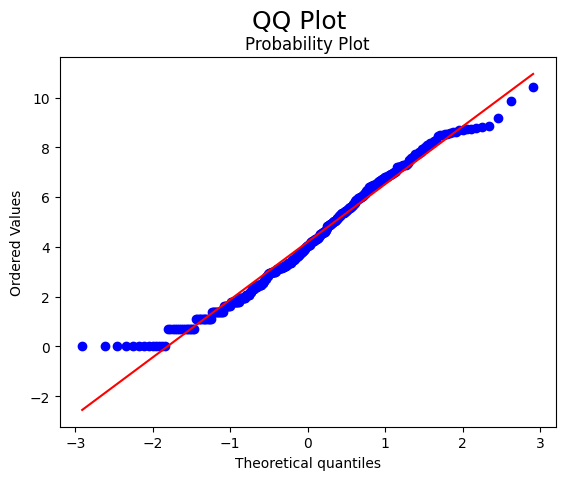

In [538]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log1p(community_melt['cell_number']), dist="norm", plot=ax1
)

<AxesSubplot: xlabel='cell_type', ylabel='cell_number'>

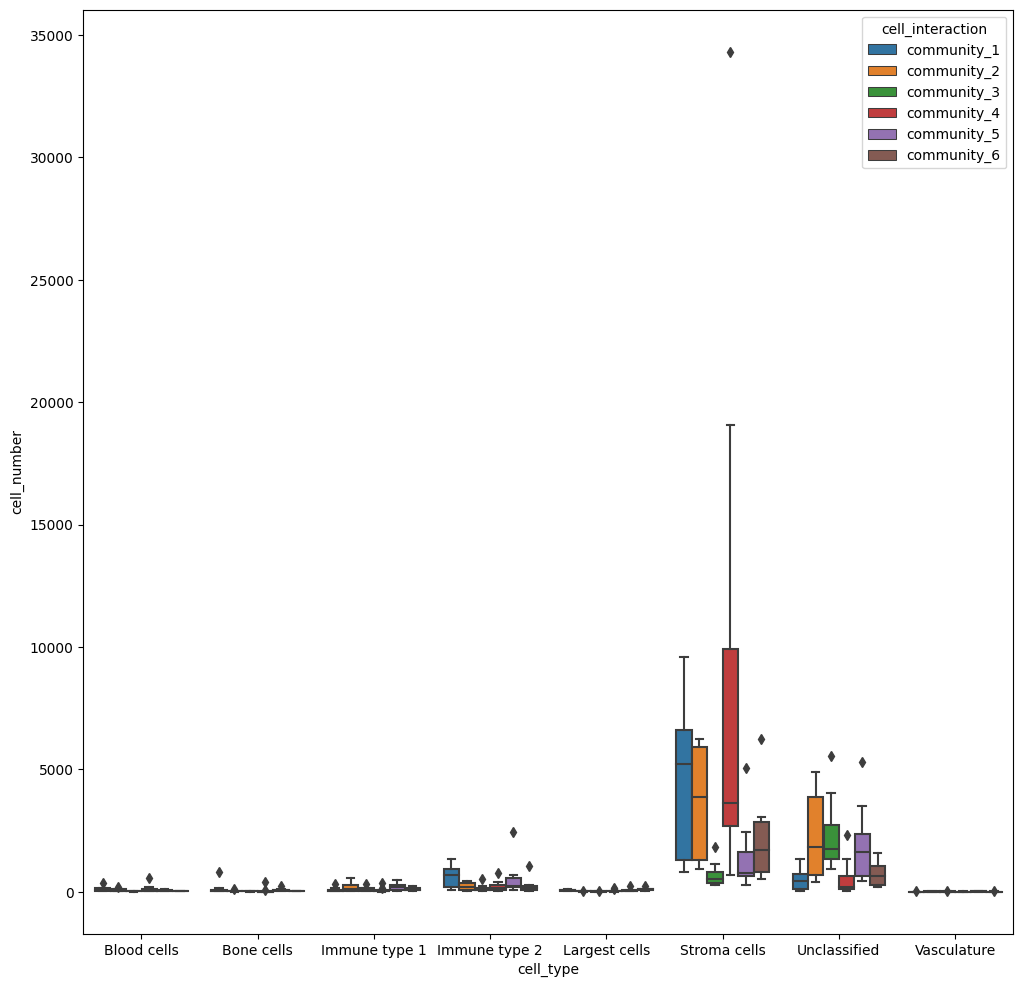

In [539]:
plt.figure(figsize=(12,12))
sns.boxplot(data=community_melt, x='cell_type', y ='cell_number', hue='cell_interaction')

In [540]:
community_melt['case_id'].unique()

array([ 40, 199, 559, 566, 693, 708, 891, 983], dtype=int64)

In [541]:
stats.shapiro(community_melt[community_melt['cell_interaction']== "community_1"]['cell_number'])

ShapiroResult(statistic=0.4531826376914978, pvalue=4.645022973030766e-14)

Ниже представленные графики хоть и обобщающие, но очень неинформативные, их трудно рассматривать. По условиям задачи для меня сложно составить быстрый алгоритм сравнения. Вообще нам надо действовать ANOVA, но распределение не нормальное, поэтому непараметрическим методом Краскала-Уоллеса

In [542]:
stats.kruskal(
   community_melt[community_melt['cell_interaction']== "community_1"]['cell_number'], 
   community_melt[community_melt['cell_interaction']== "community_2"]['cell_number'],
   community_melt[community_melt['cell_interaction']== "community_3"]['cell_number'],
   community_melt[community_melt['cell_interaction']== "community_4"]['cell_number'],
   community_melt[community_melt['cell_interaction']== "community_5"]['cell_number'],
   community_melt[community_melt['cell_interaction']== "community_6"]['cell_number']
)

KruskalResult(statistic=9.074608216968743, pvalue=0.10612503636321854)

Общее количество клеток по 6окружениям равны

In [543]:
community_melt_Stroma = community_melt[
    community_melt['cell_type'] == 'Stroma cells'
]

community_melt_Stroma.head()

cell_interaction  case_id     cell_type  cell_number
240      community_1       40  Stroma cells       5522.0
241      community_1      199  Stroma cells       6490.0
242      community_1      559  Stroma cells       1401.0
243      community_1      566  Stroma cells        975.0
244      community_1      693  Stroma cells       9576.0

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Immune type 2_community_4 vs. Largest cells_community_4: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.120e-02 Stat=4.642e+00
Immune type 2_community_6 vs. Largest cells_community_6: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.717e-01 Stat=7.980e-01
Immune type 1_community_1 vs. Immune type 2_community_1: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.545e-03 Stat=8.052e+00
Immune type 1_community_2 vs. Immune type 2_community_2: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.446e-01 Stat=8.934e-01
Blood cells_community_1 vs. Bone cells_community_1: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.632e-01 Stat=3.341e-01
Bone cells_community_1 vs. Immune type 1_community_1: Kruskal-Wallis indep

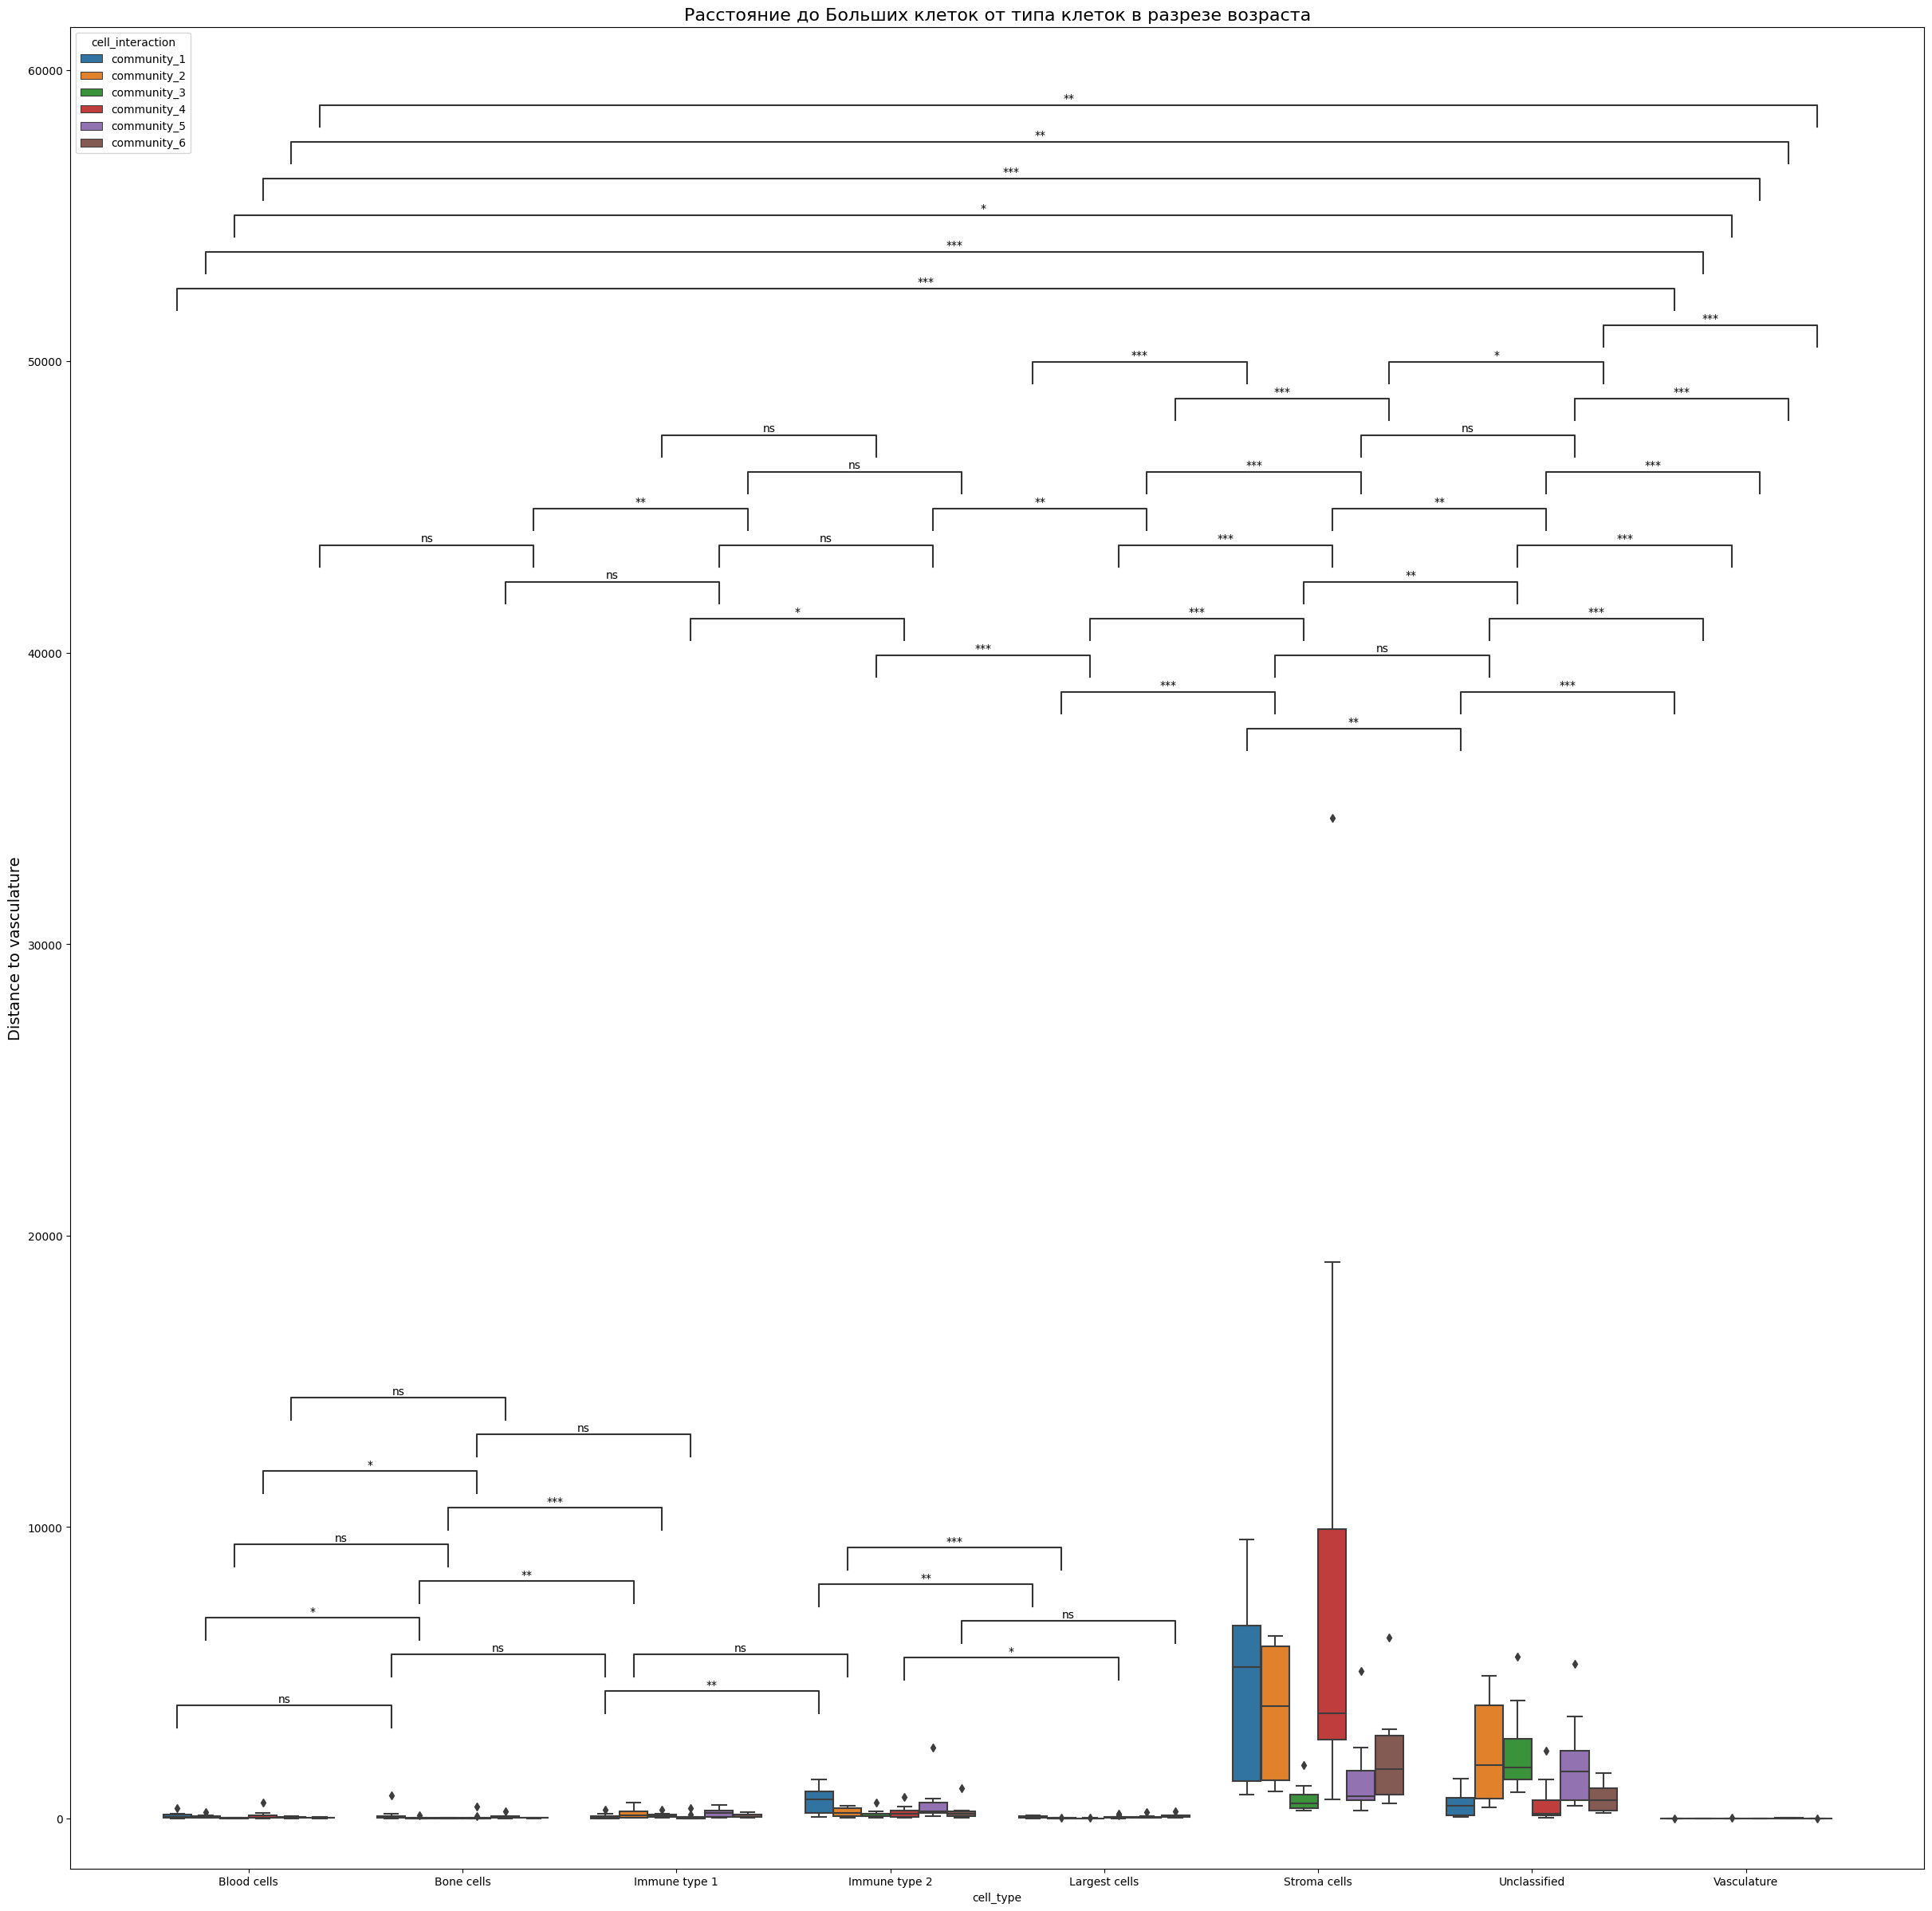

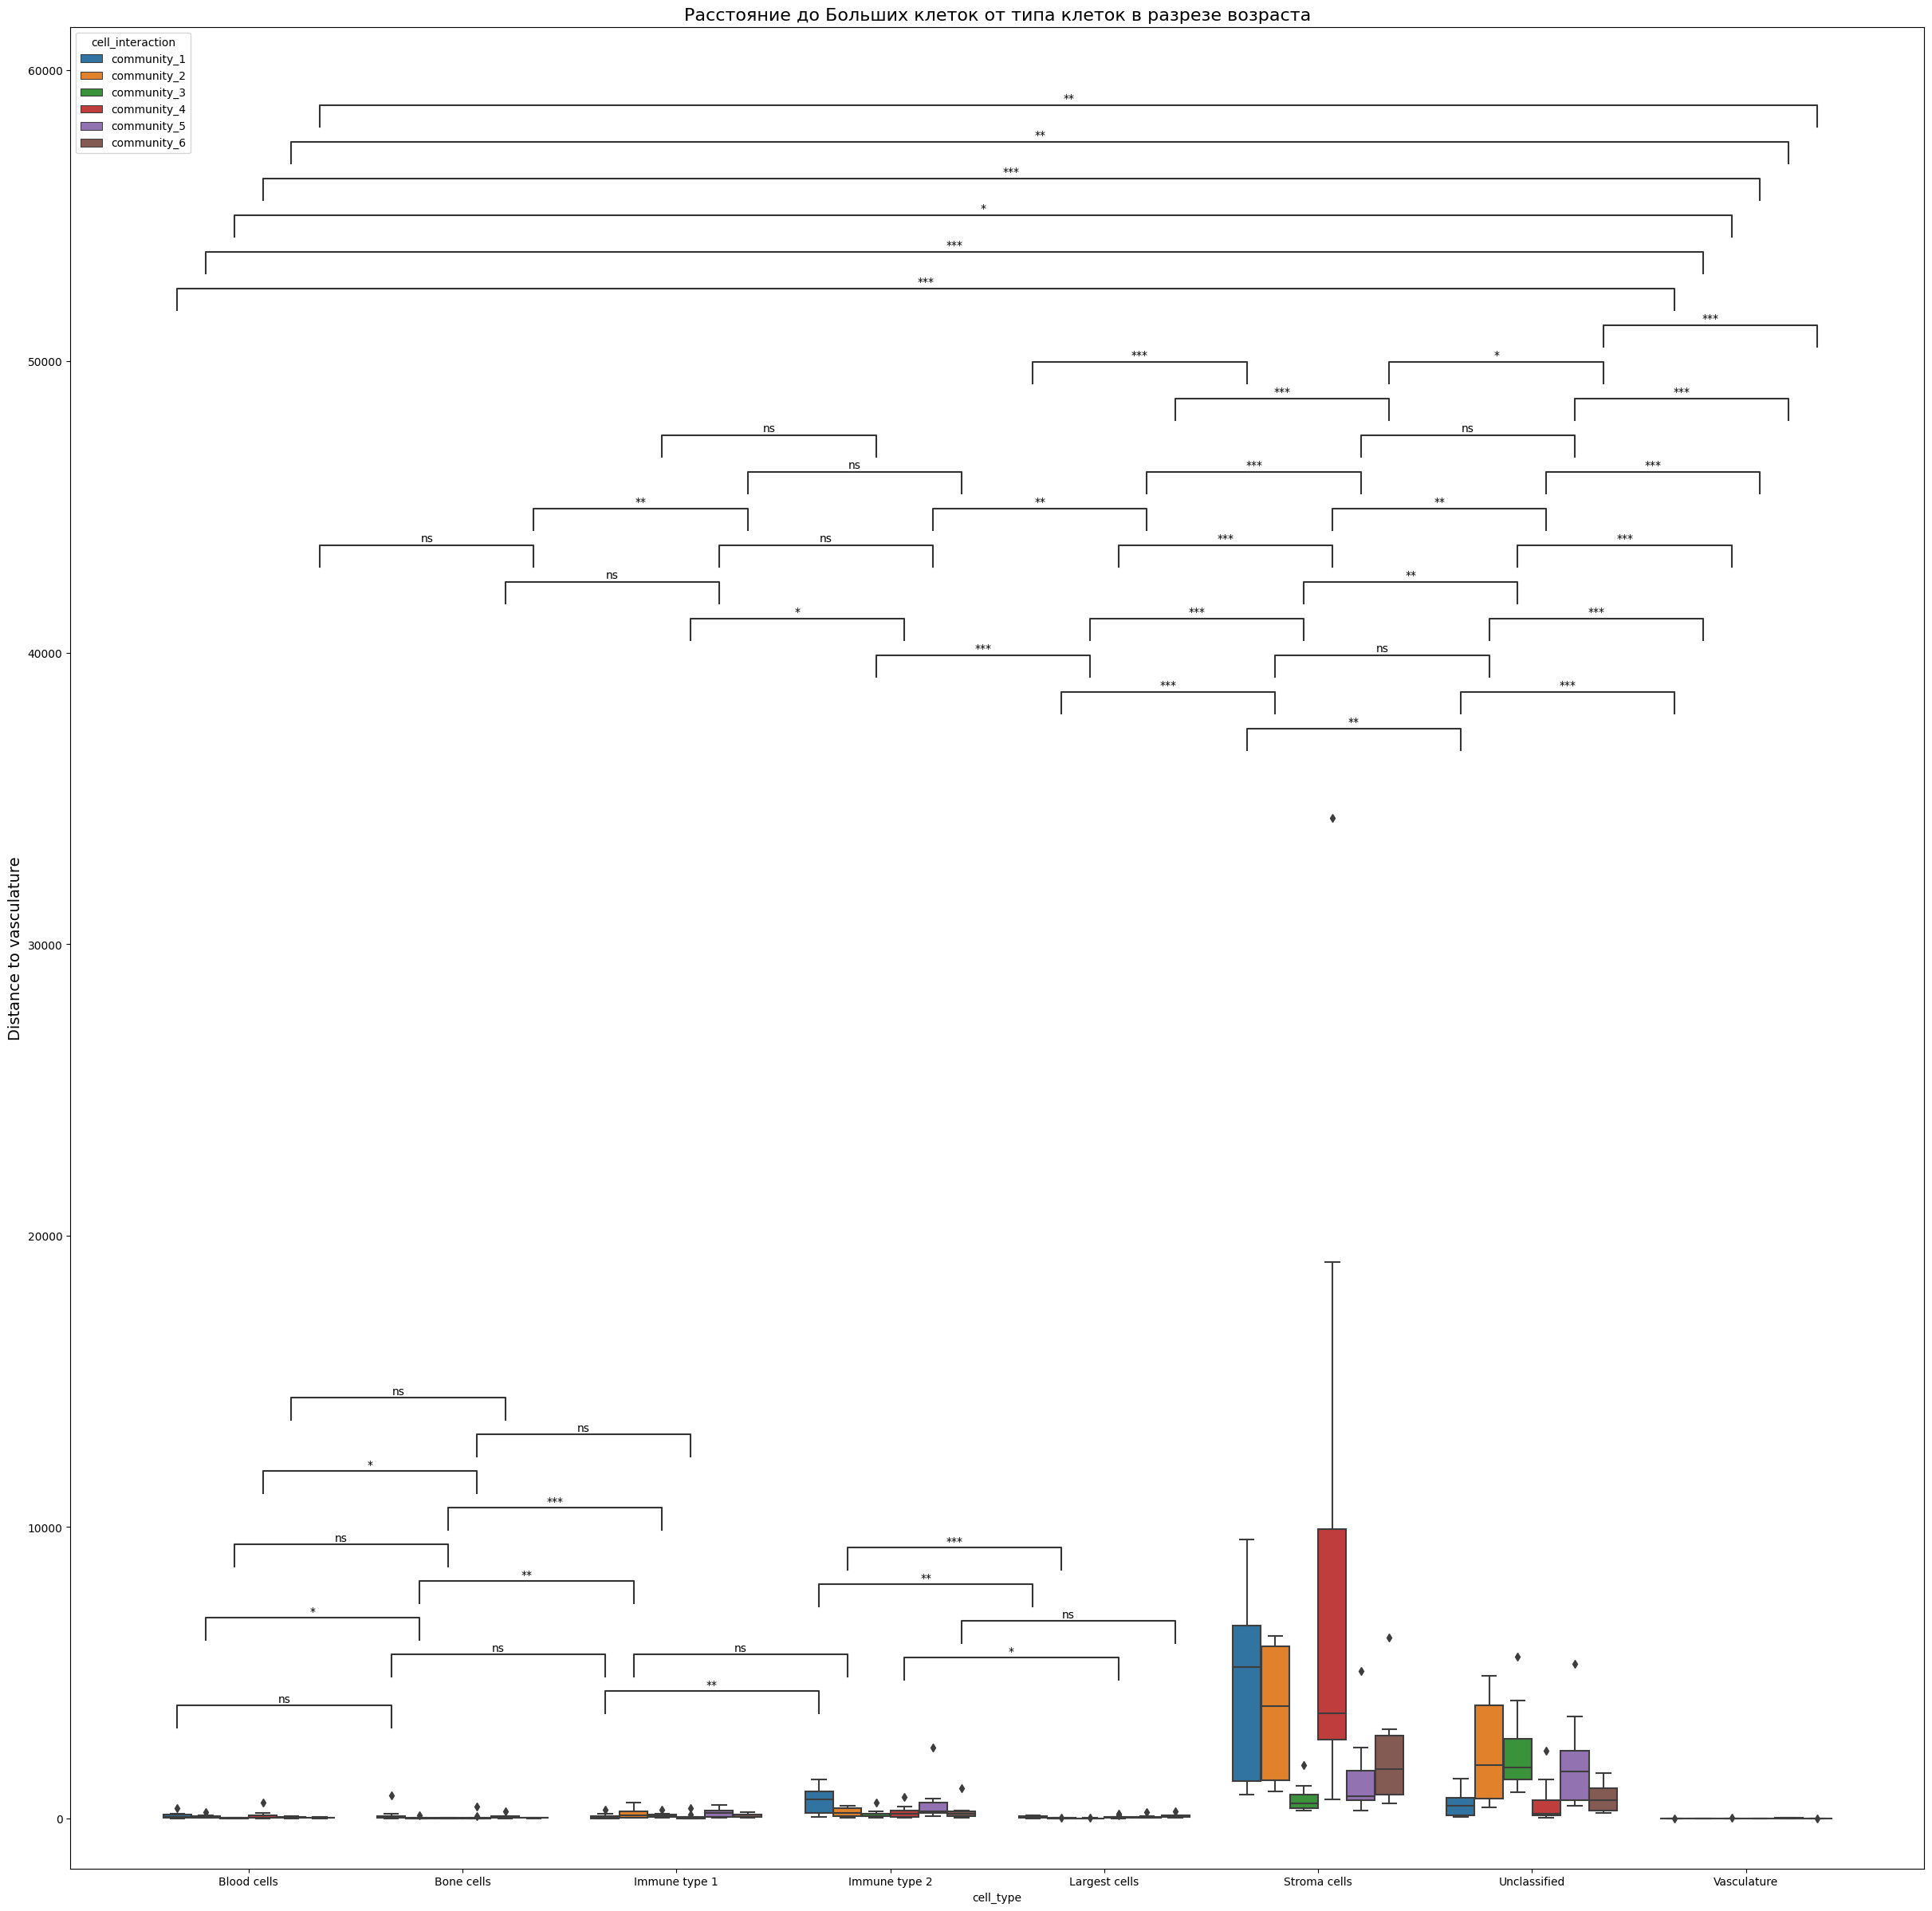

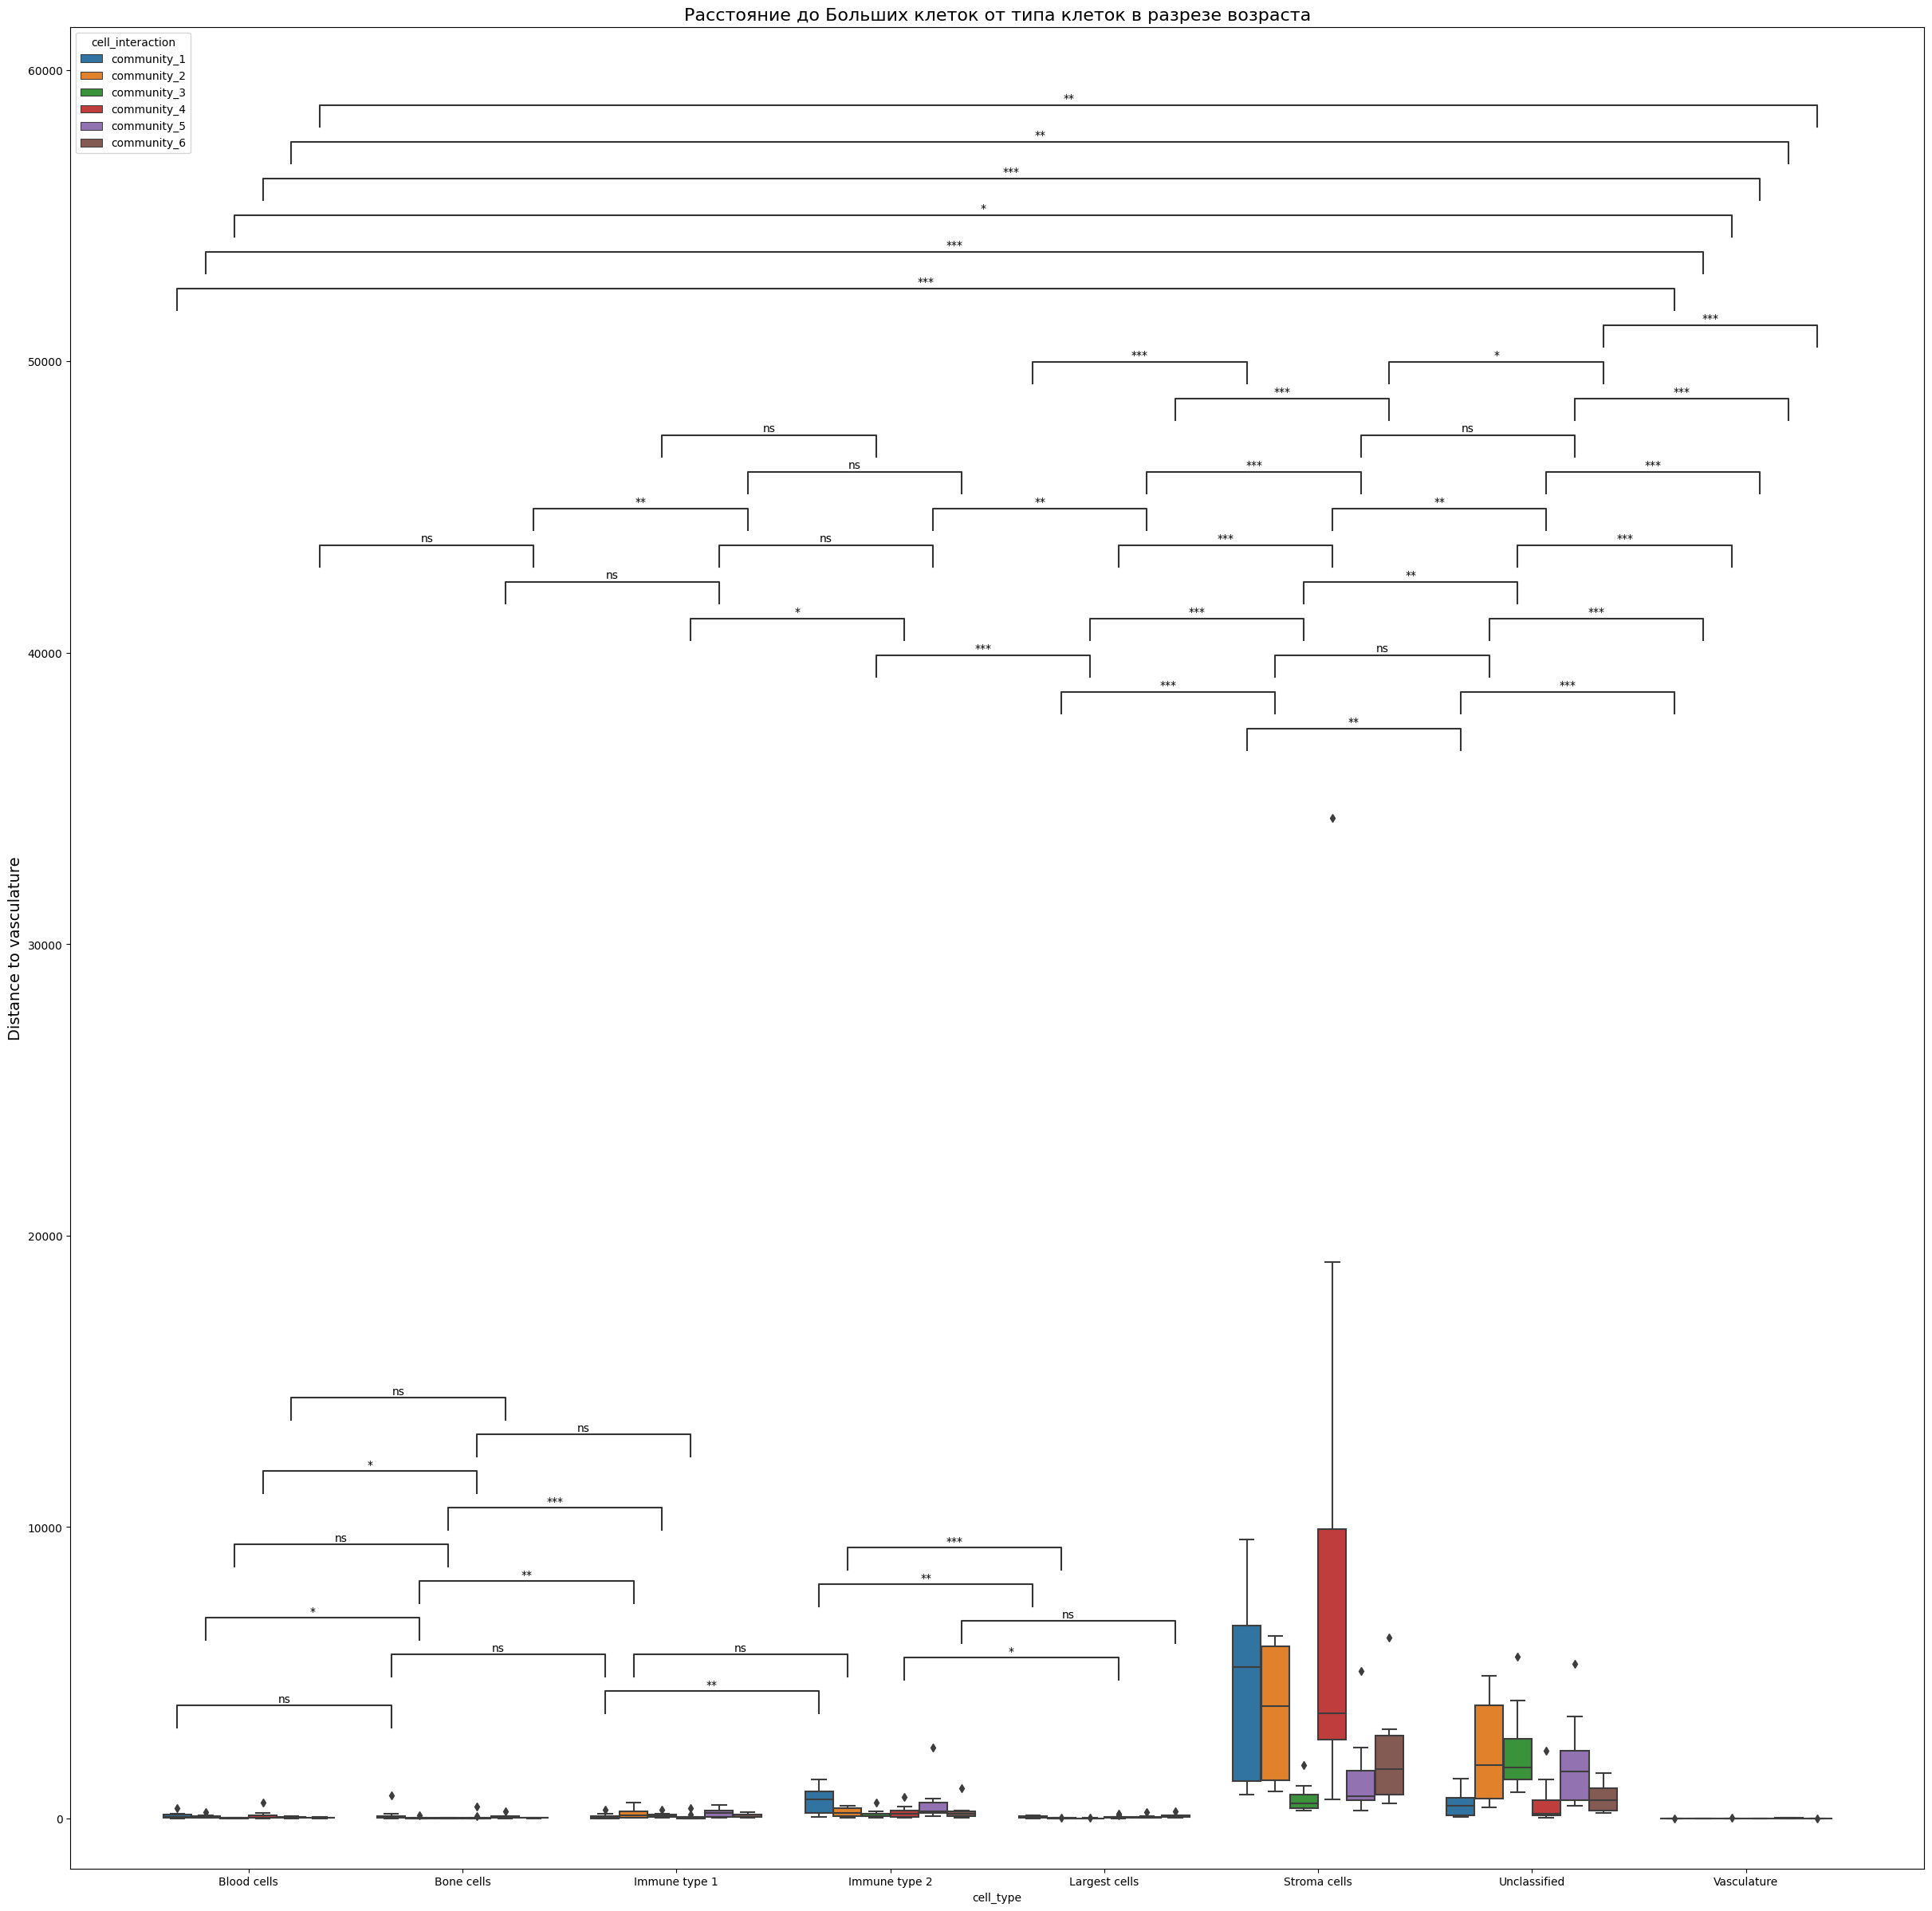

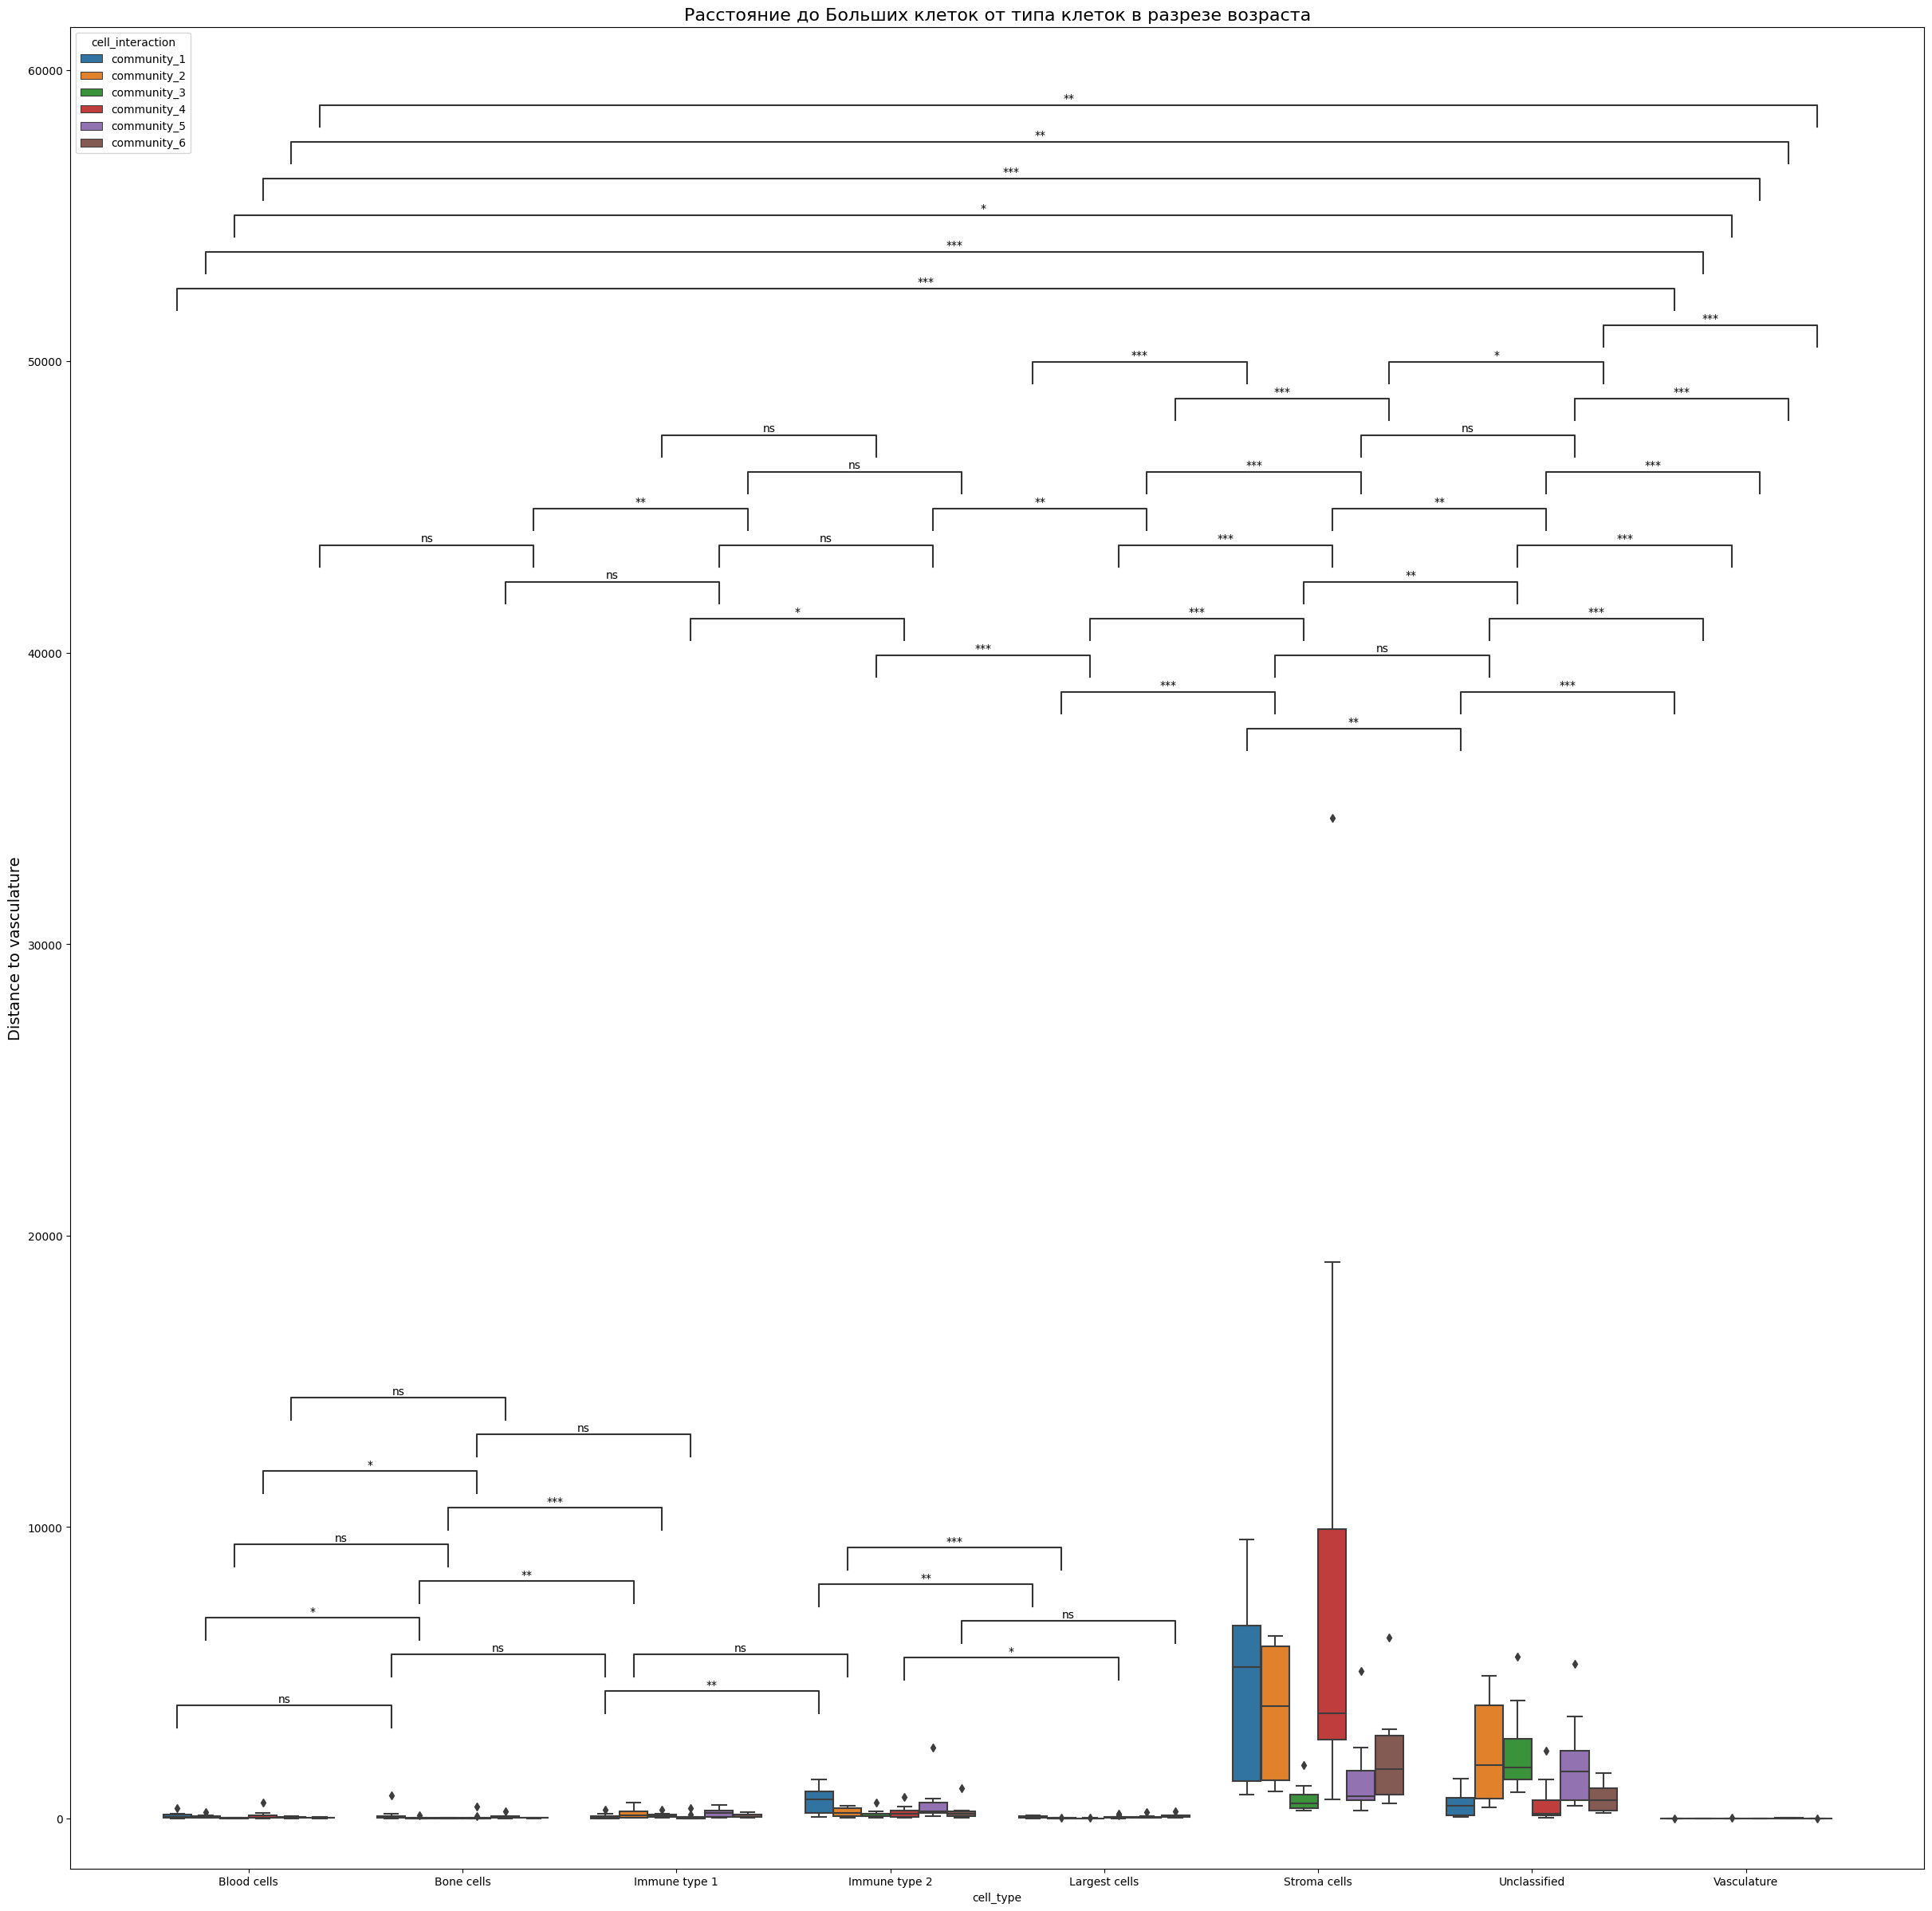

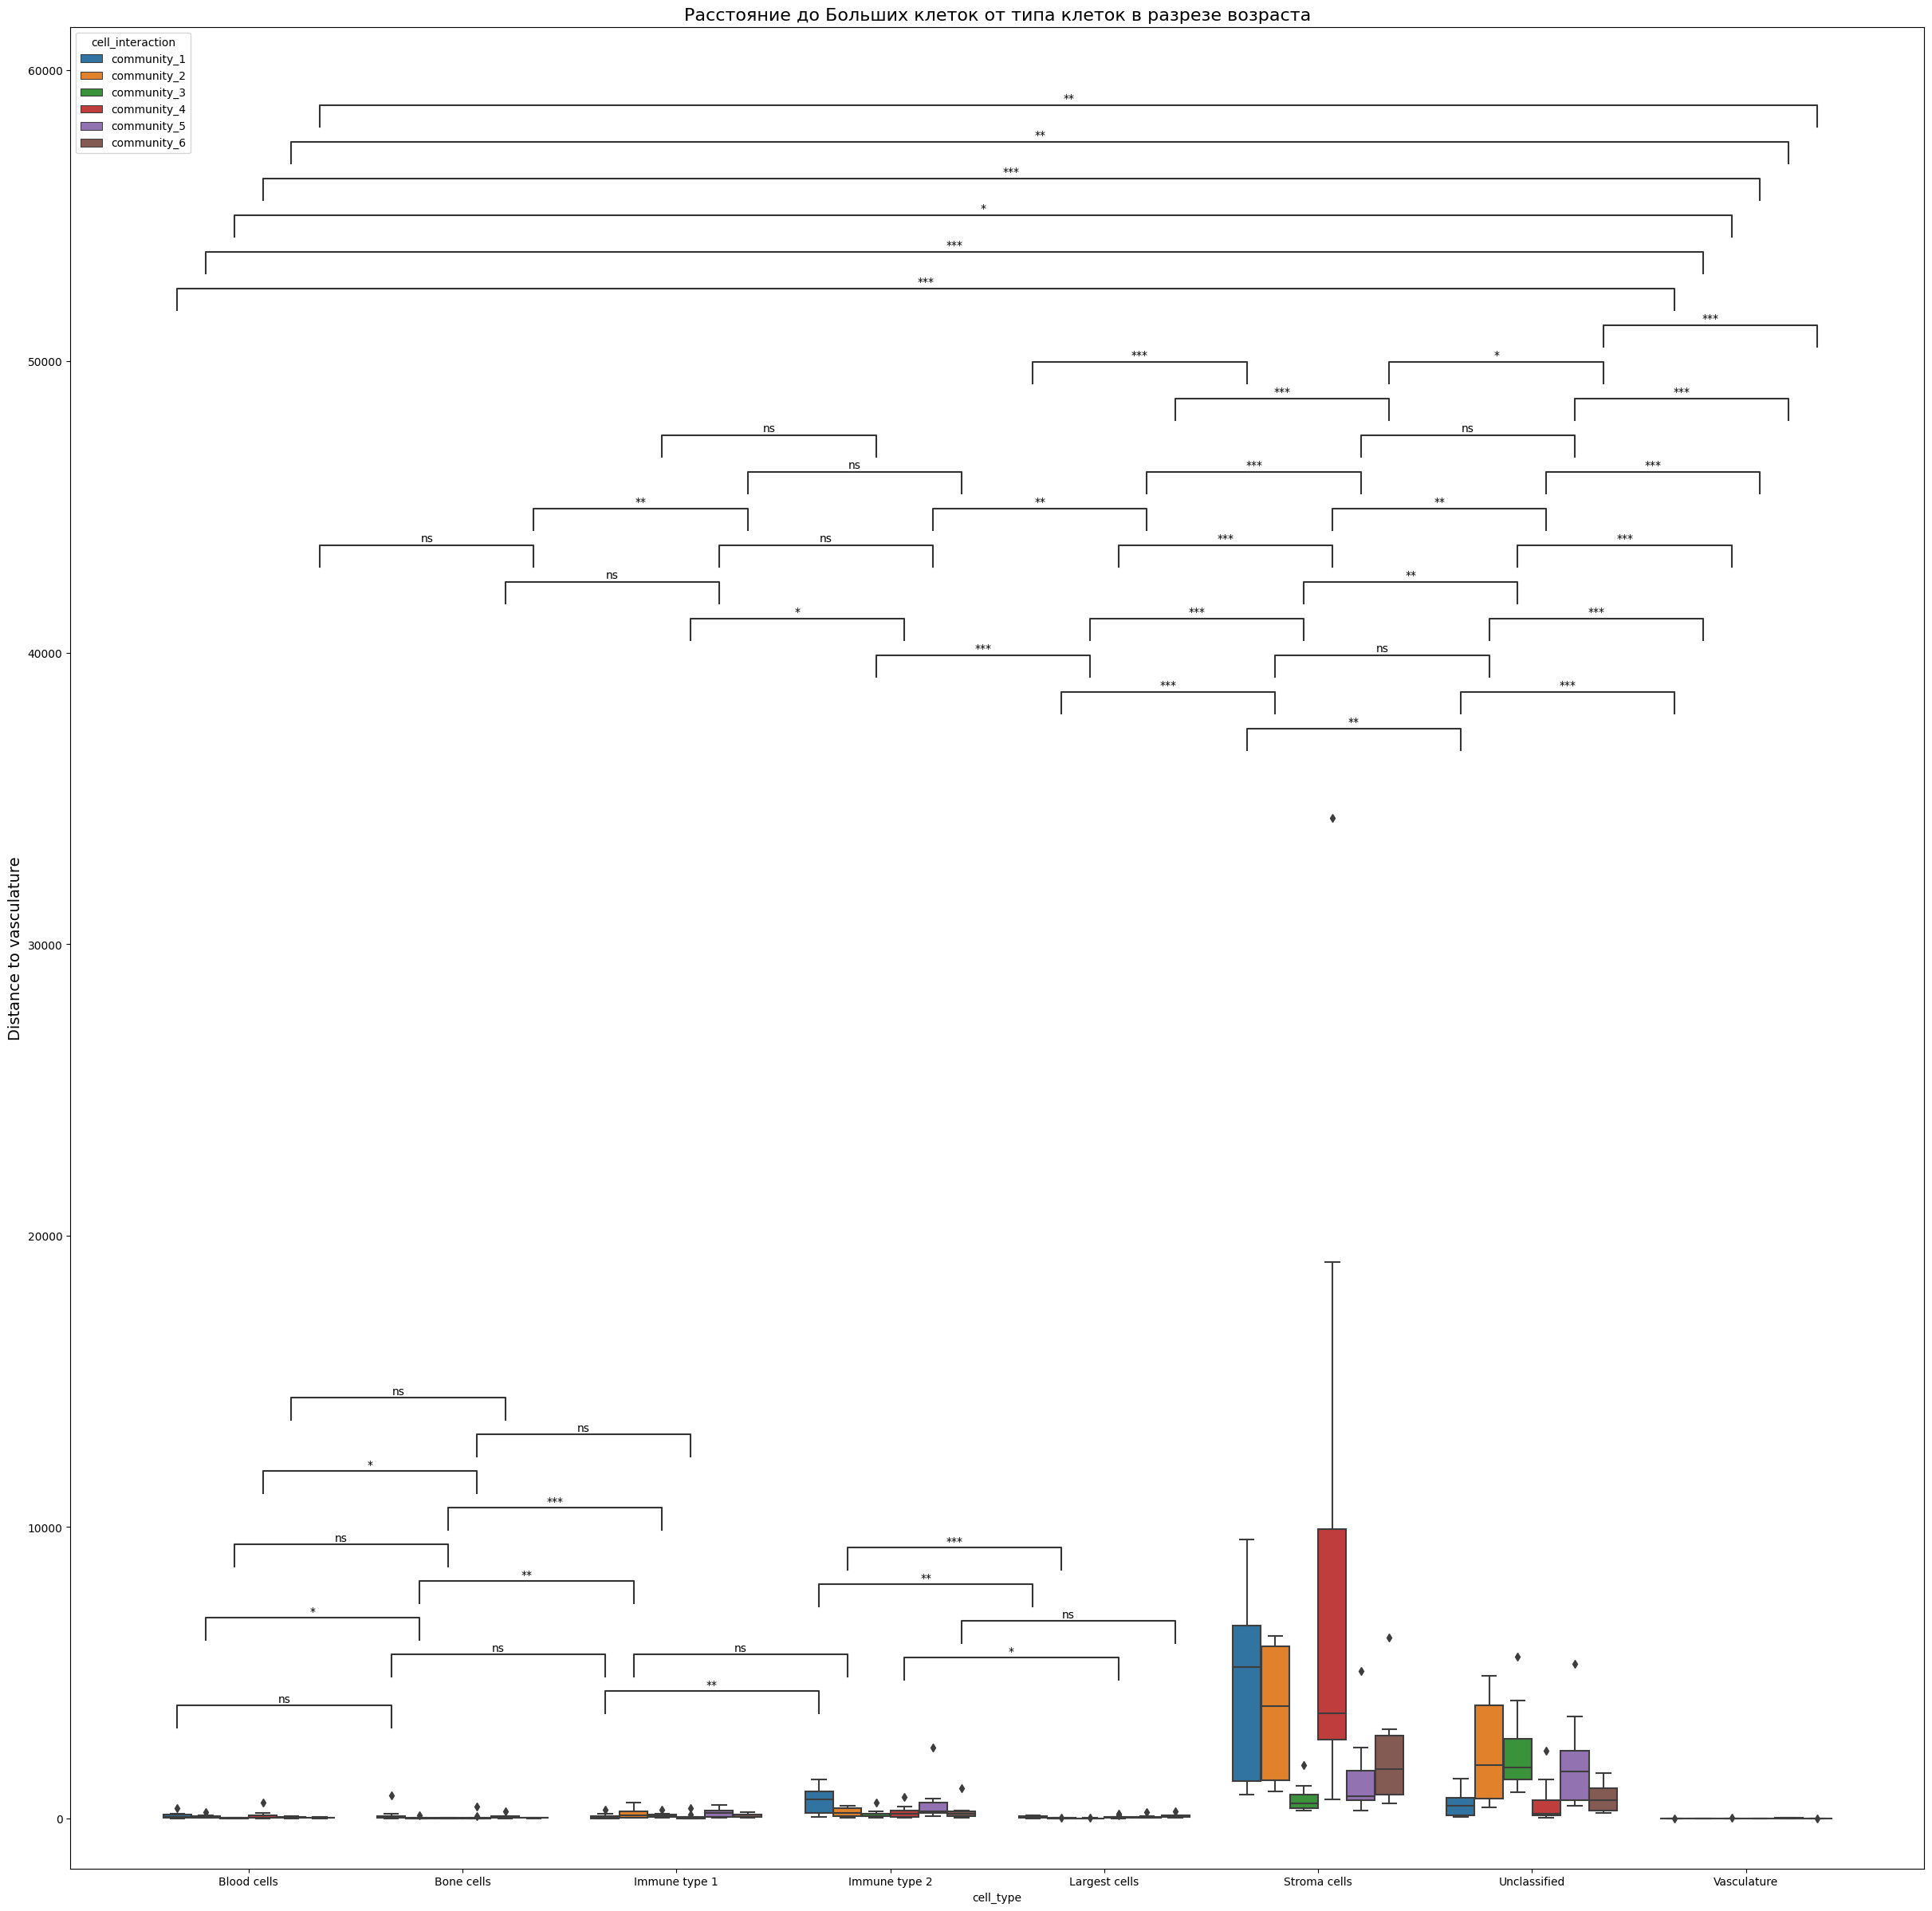

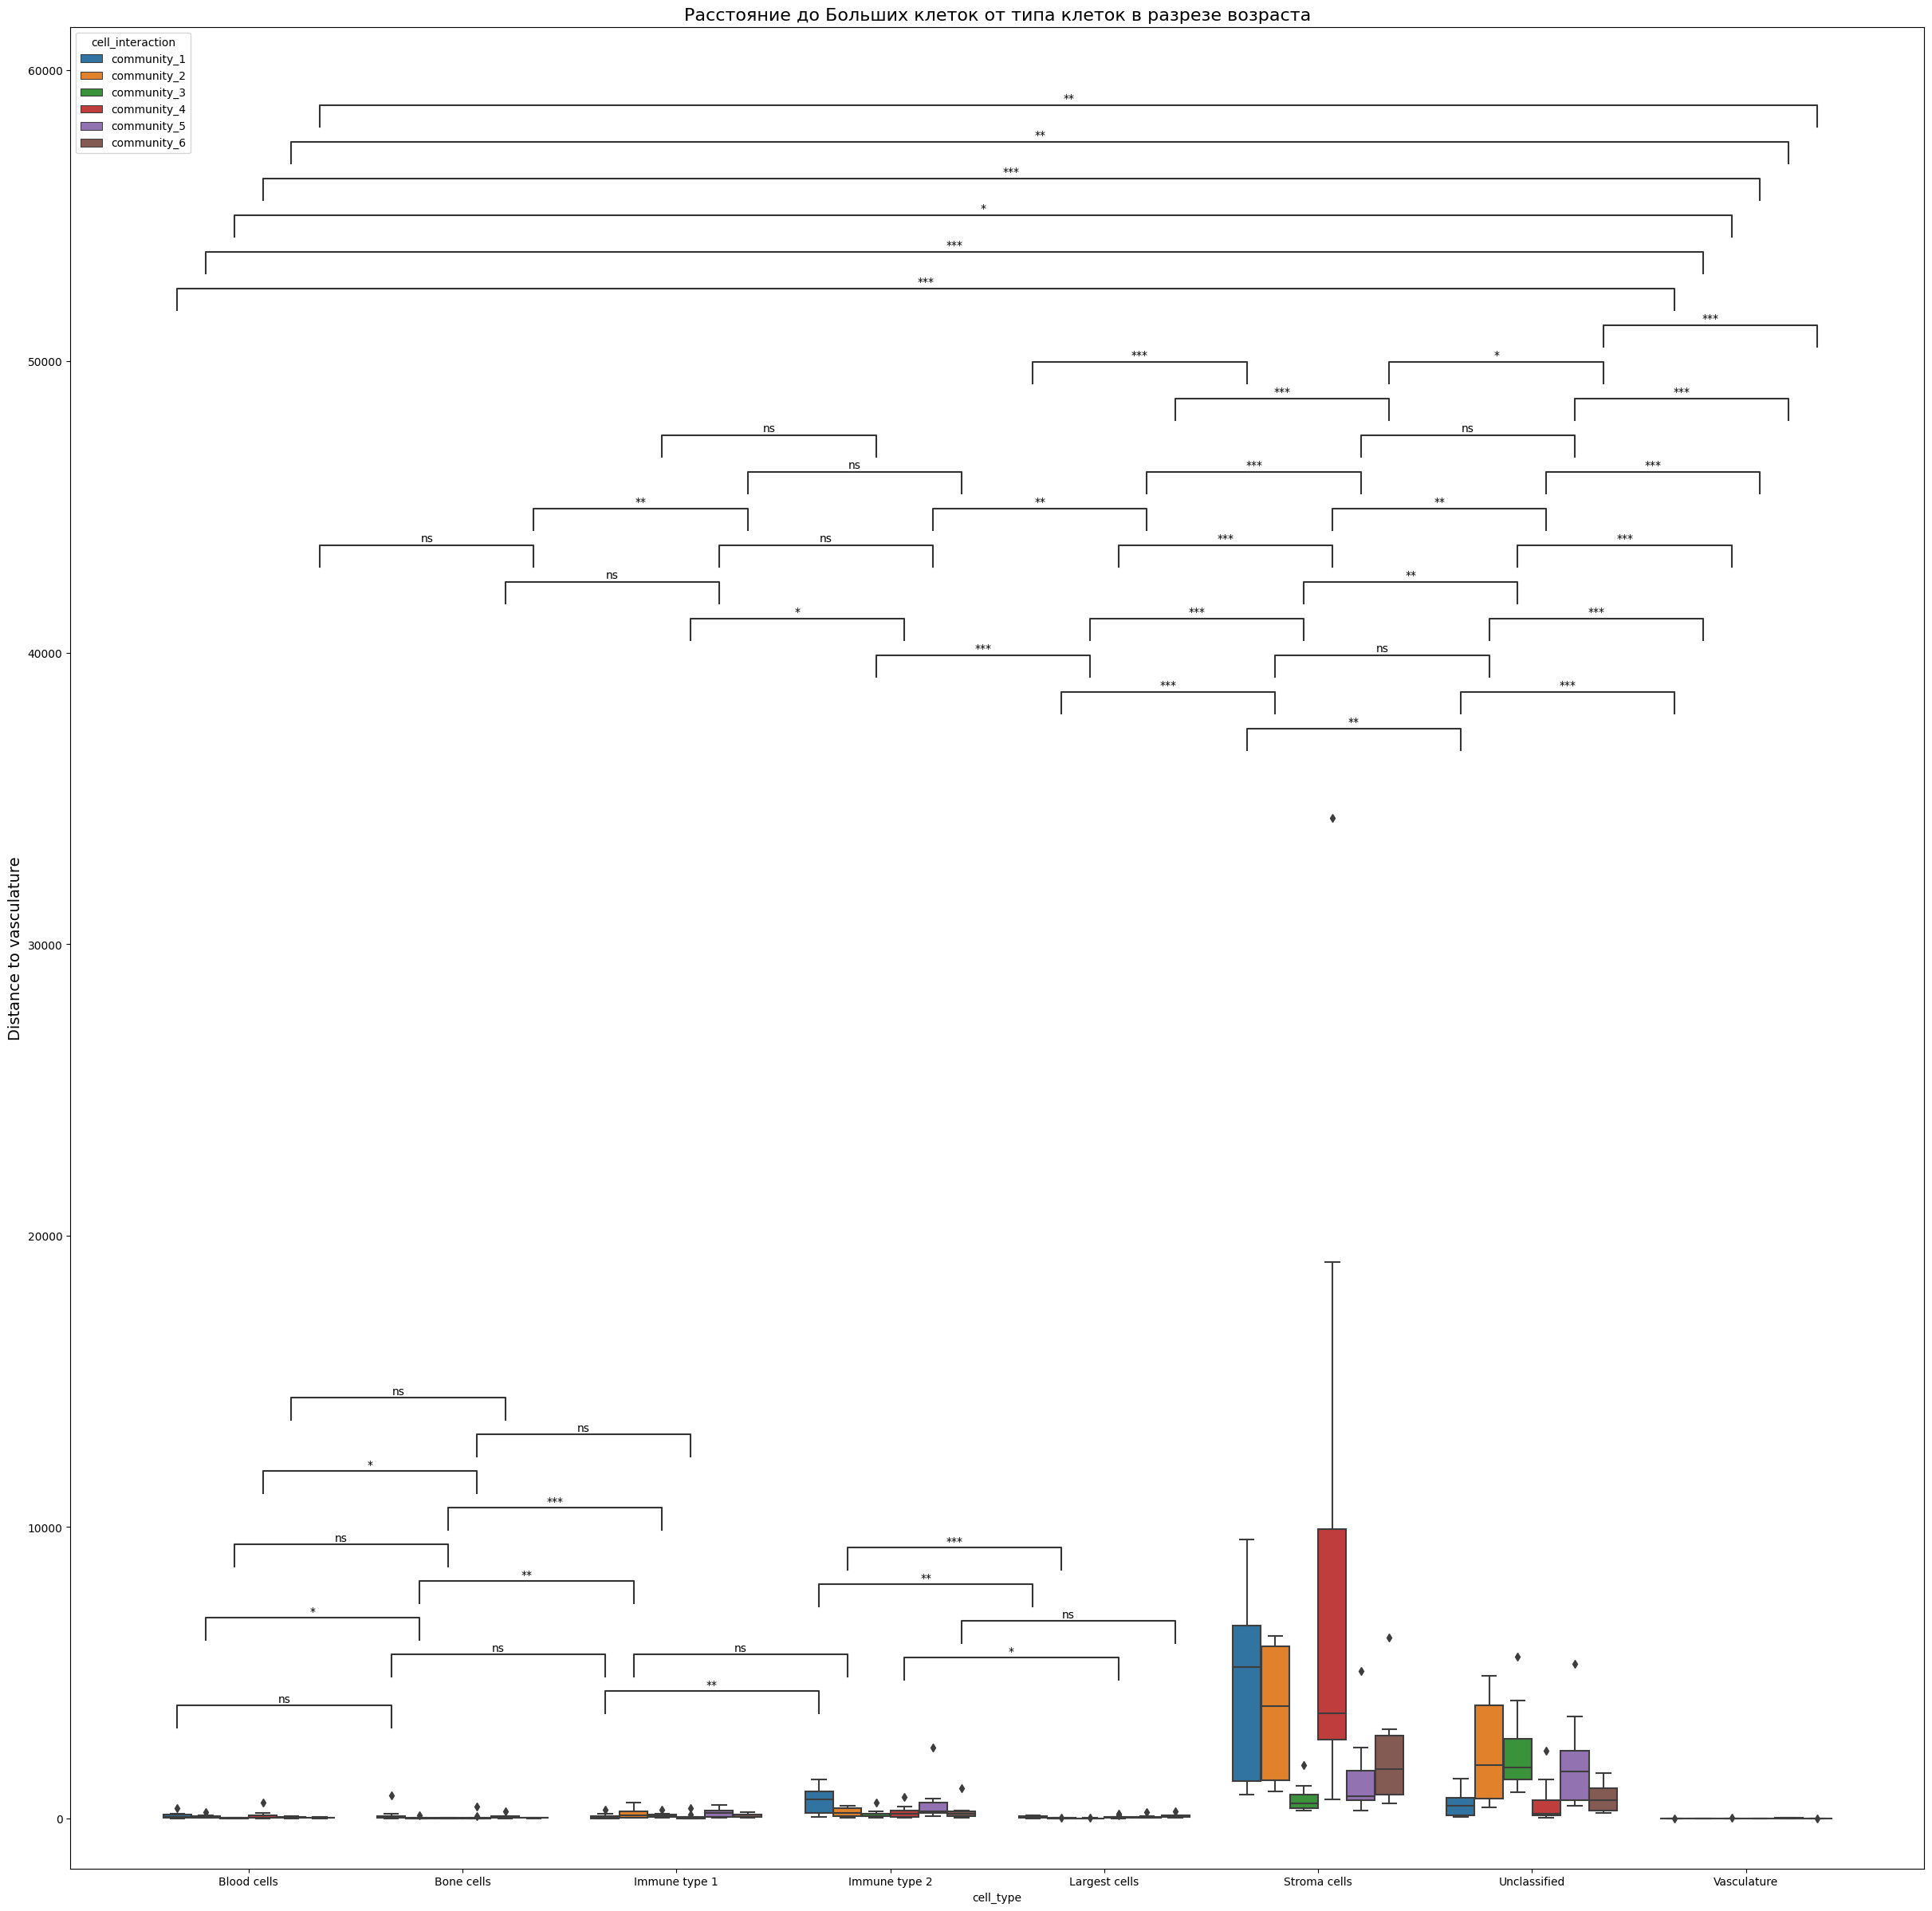

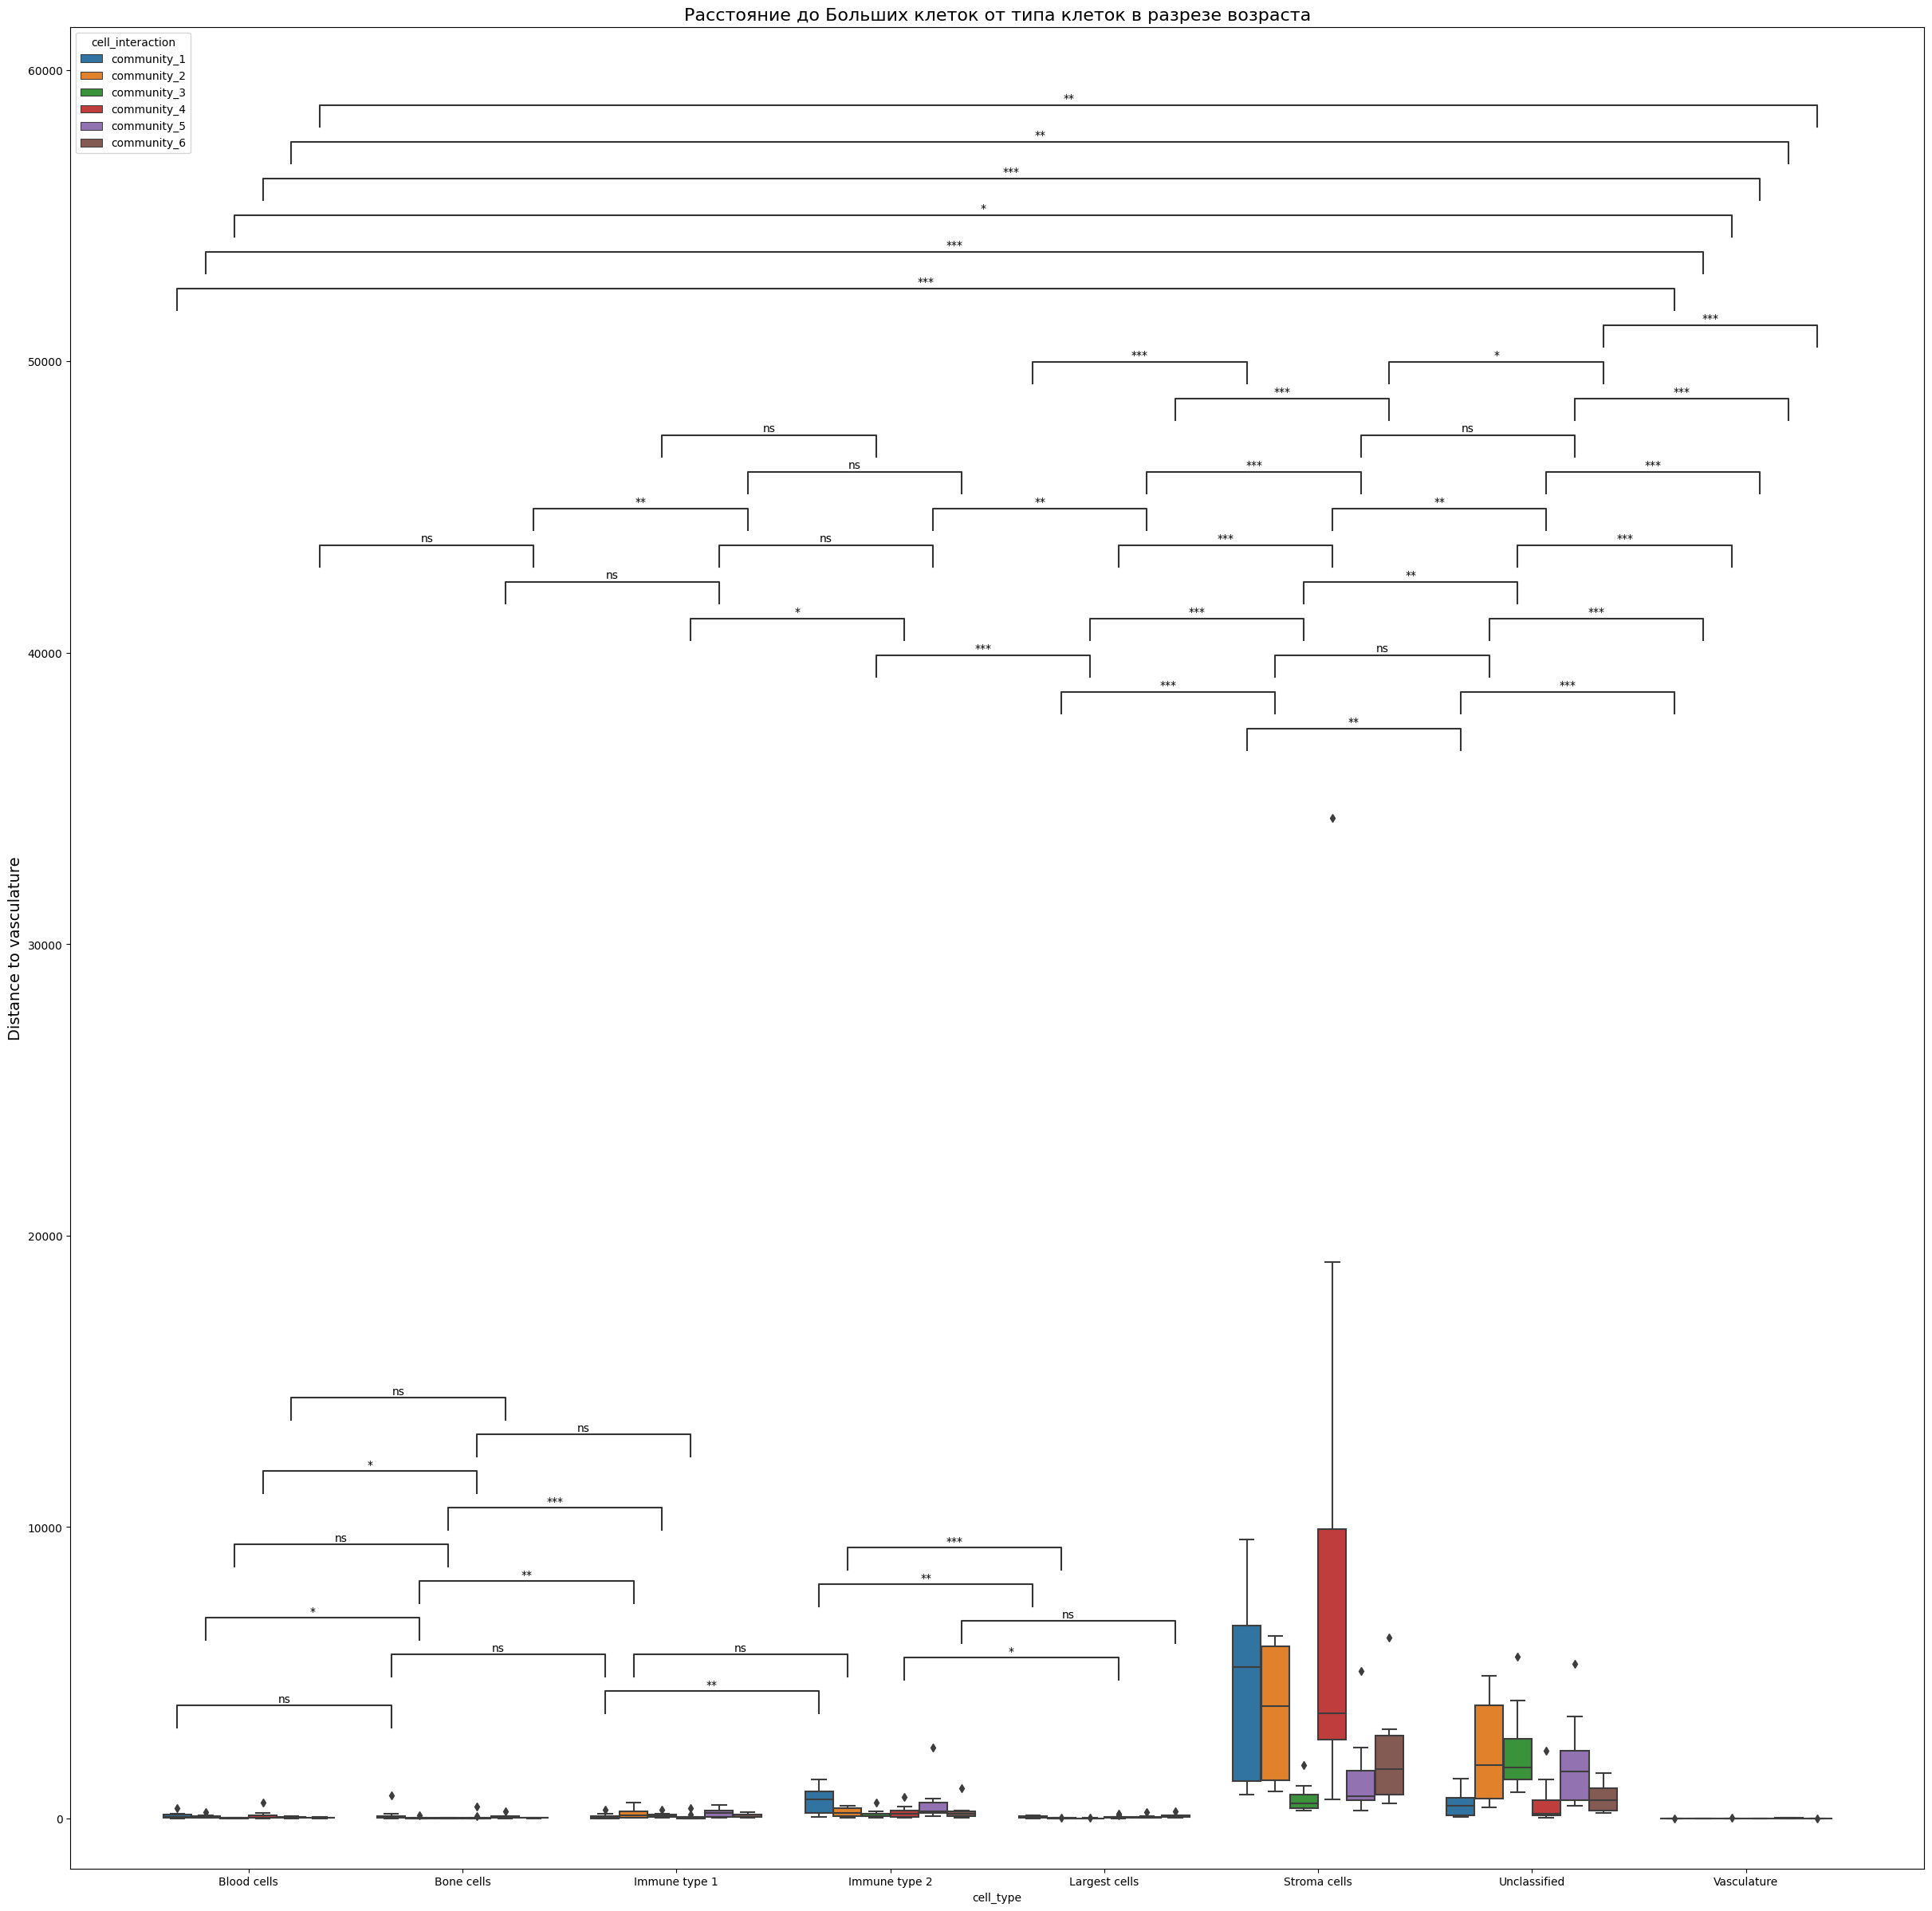

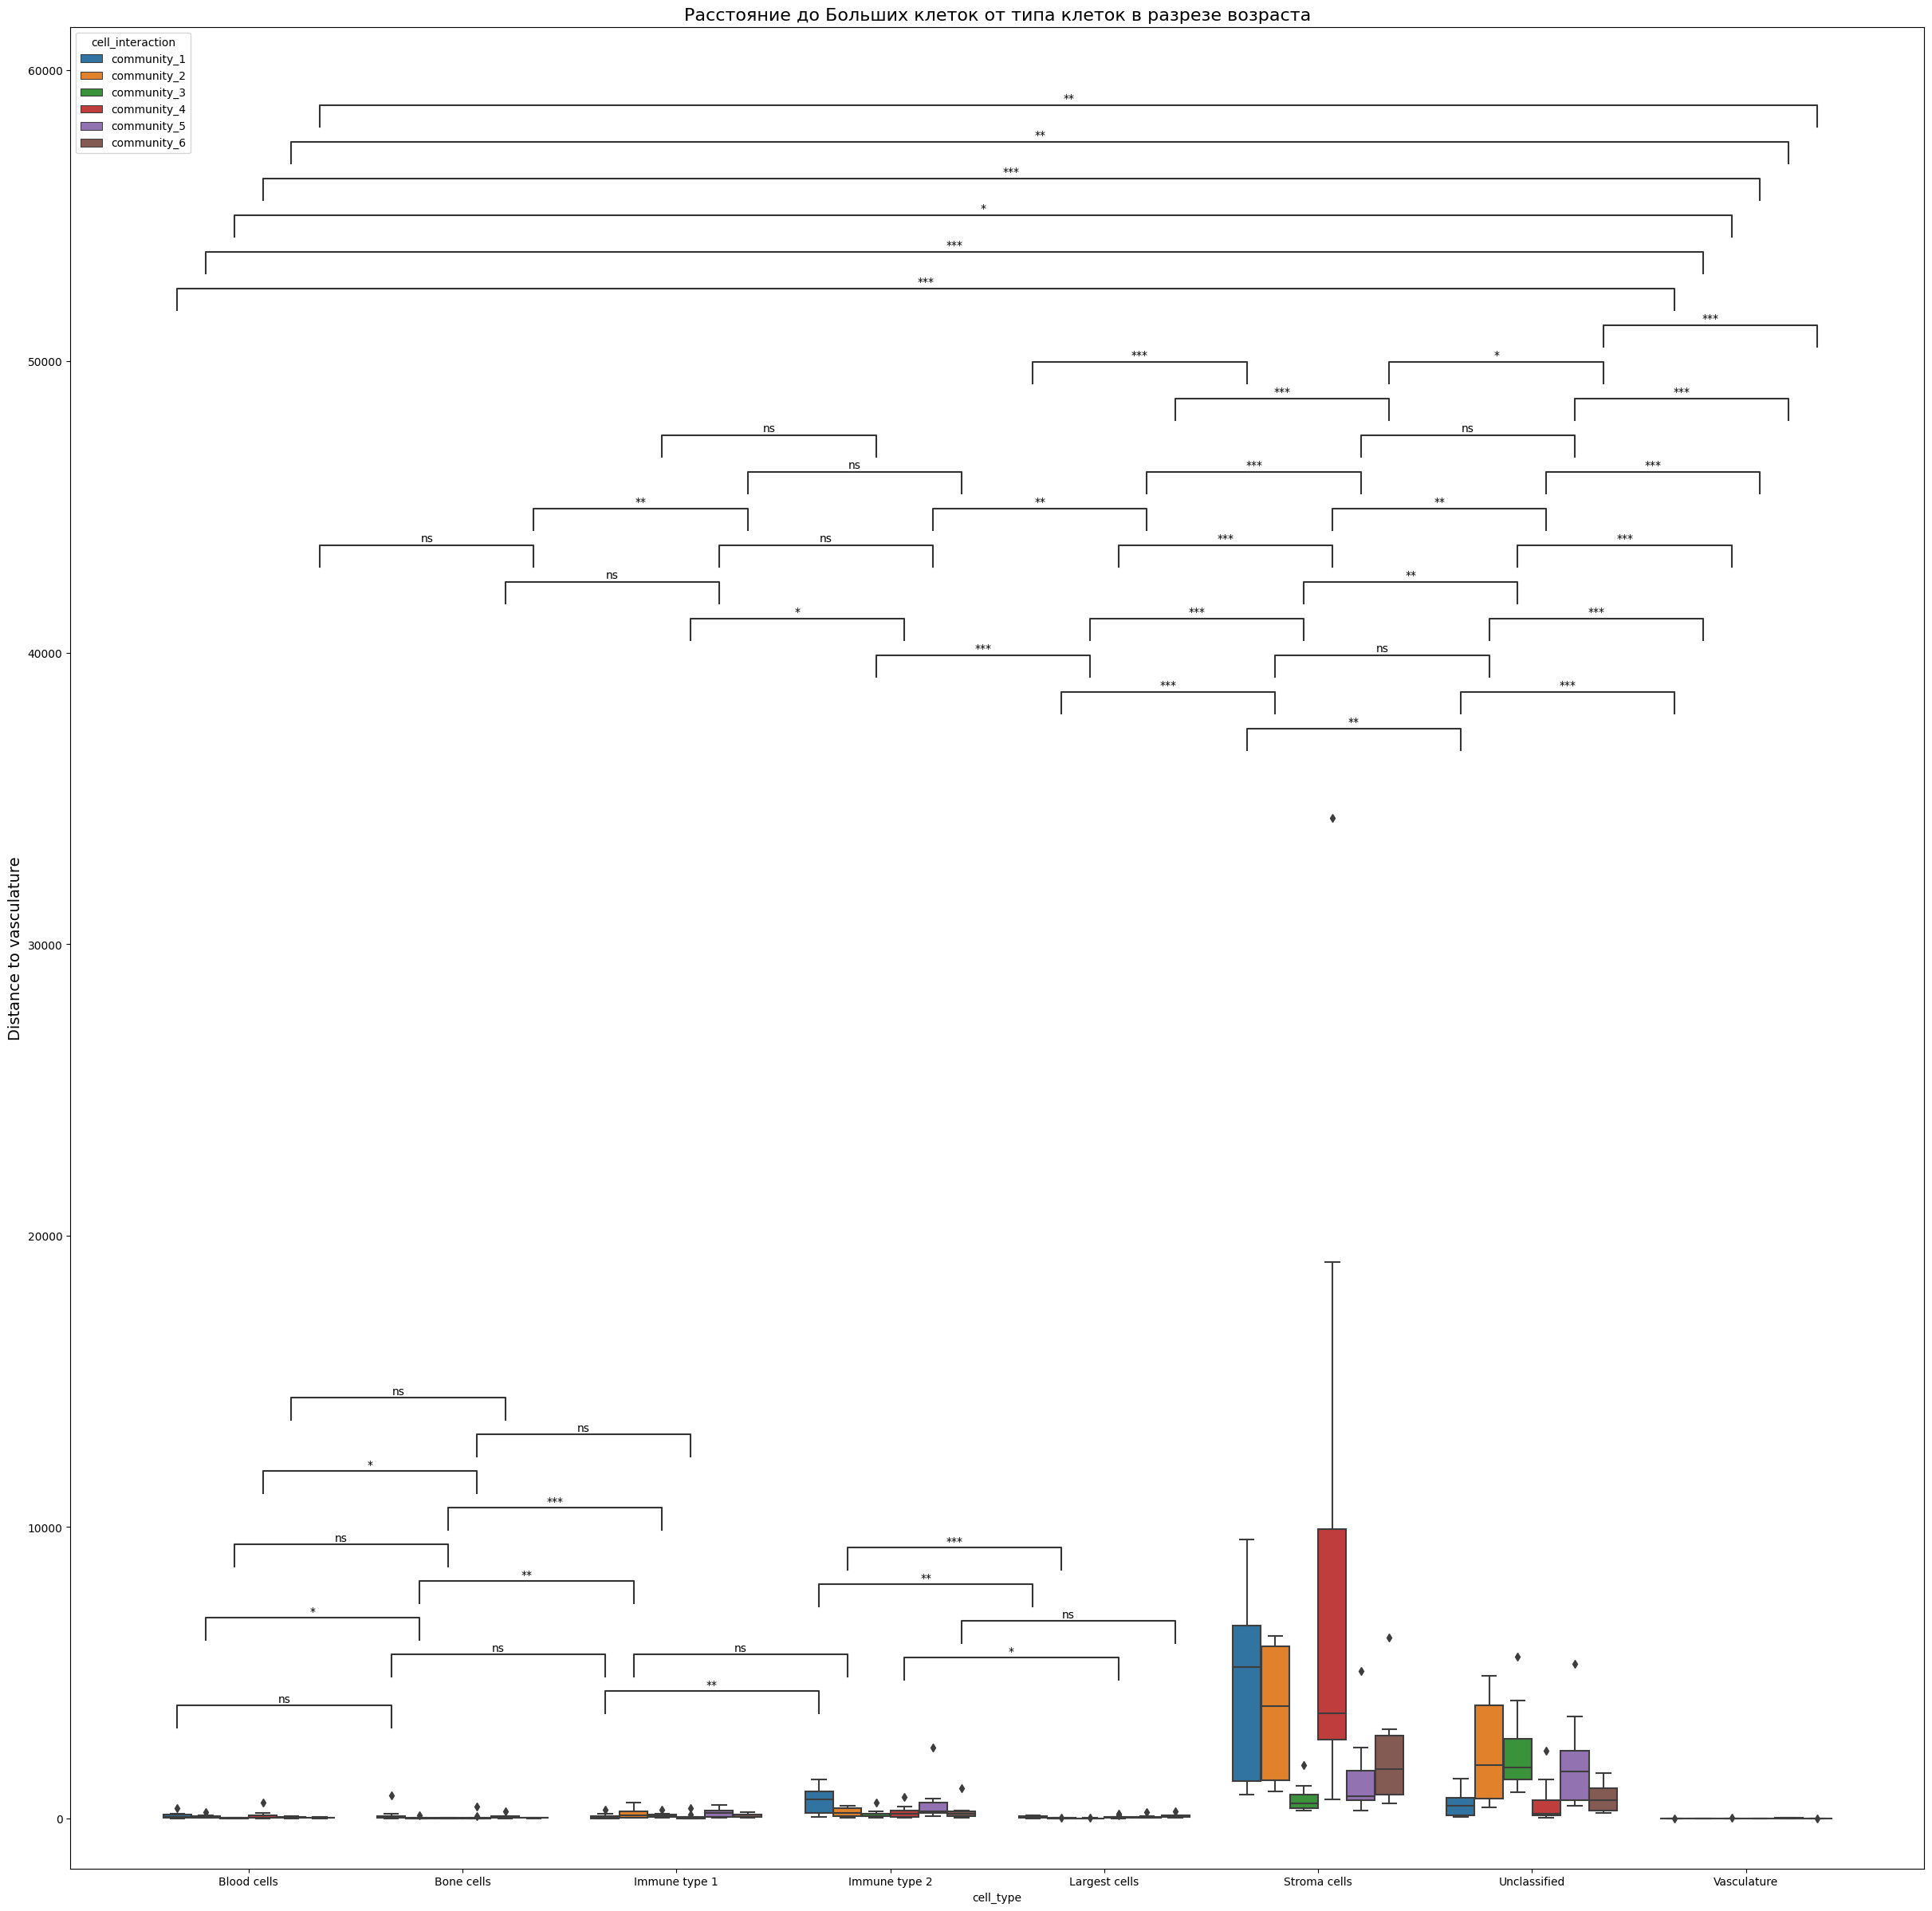

In [544]:
x='cell_type'
y = 'cell_number'
hue='cell_interaction'
hue_order = cell_interactions
order = ['Blood cells',
 'Bone cells',
 'Immune type 1',
 'Immune type 2',
 'Largest cells',
 'Stroma cells',
 'Unclassified',
 'Vasculature']


for i in range(len(order)):
    pairs = [((order[i],hue_order[j]), (order[i-1], hue_order[j]))
        for j in range(len(hue_order))
            for i in range(len(order))
    ]

    

    plt.figure(figsize=(30, 30))
    distance_cell_box = sns.boxplot(
        data=community_melt, x='cell_type', y = 'cell_number',
        hue=hue, hue_order=hue_order
    )
    distance_cell_box.axes.set_title(
        "Расстояние до Больших клеток от типа клеток в разрезе возраста", fontsize=16
    )
    distance_cell_box.set_ylabel("Distance to vasculature", fontsize=14)

    annotator = Annotator(
        distance_cell_box, pairs, data=community_melt, x=x, y=y,
        hue=hue, hue_order=hue_order
    )
    annotator.configure(test='Kruskal', text_format='star', loc='inside')
    annotator.apply_and_annotate()

 В итоге второе задание нужно решать по другому, решение в процессе

    3 Вопрос.  Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения,

по Оу — их доля в ткани пациента.

Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [545]:
df['index'] = range(df.shape[0])

In [546]:
df.head()

distance_to_vasculature  distance_to_largest_cell  immune_marker_1  \
0               988.509380                612.076506        10.803755   
1               787.852379                637.787202        11.749179   
2               960.635580                700.283468        15.124372   
3               702.033032                676.409695        14.221883   
4               830.399371                863.269930        19.978977   

   immune_marker_2 cell_interaction     cell_type  case_id  area_of_cell  \
0       187.998971      community_1  Stroma cells      891           185   
1       155.357076      community_1  Stroma cells      891           209   
2       182.626888      community_2  Stroma cells      891           254   
3       158.381917      community_3  Unclassified      891           156   
4       159.071269      community_3  Unclassified      891           194   

     age_group  index  
0  elder_group      0  
1  elder_group      1  
2  elder_group      2  
3  elder_group      3  
4  elder_group      4

In [547]:
community_cell_count = pd.pivot_table(df, 
                index=['cell_interaction', 'case_id','age_group'],
                columns='cell_type',
                values='index',
                aggfunc=len
                ).fillna(0).reset_index()

community_cell_count.head()

cell_type cell_interaction  case_id    age_group  Blood cells  Bone cells  \
0              community_1       40  elder_group         37.0        27.0   
1              community_1      199  young_group        155.0        37.0   
2              community_1      559  elder_group         42.0        29.0   
3              community_1      566  elder_group          9.0        15.0   
4              community_1      693  young_group        351.0       799.0   

cell_type  Immune type 1  Immune type 2  Largest cells  Stroma cells  \
0                   27.0         1343.0           67.0        5522.0   
1                   39.0          898.0           48.0        6490.0   
2                   11.0           56.0           11.0        1401.0   
3                    4.0          187.0           11.0         975.0   
4                  306.0         1025.0          103.0        9576.0   

cell_type  Unclassified  Vasculature  
0                 396.0          2.0  
1                 651.0          0.0  
2                 117.0          3.0  
3                  85.0          1.0  
4                1350.0          3.0

In [548]:
community_cell_count.sum(axis=1)

C:\Users\rinen\AppData\Local\Temp\ipykernel_17436\3038541443.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0      7461.0
1      8517.0
2      2229.0
3      1853.0
4     14206.0
5      6937.0
6      1935.0
7     10017.0
8      7774.0
9     10729.0
10     1948.0
11     2853.0
12    12742.0
13     5223.0
14     2510.0
15    12342.0
16     8292.0
17     5792.0
18     1891.0
19     1970.0
20     2666.0
21     3963.0
22     3156.0
23     3596.0
24     3709.0
25     7825.0
26     1506.0
27     4150.0
28    39550.0
29     4963.0
30     1610.0
31    22295.0
32    13704.0
33     7273.0
34     2016.0
35     1457.0
36     3624.0
37     4840.0
38     2508.0
39     4098.0
40     9362.0
41     4848.0
42     1687.0
43     4845.0
44     1599.0
45     2087.0
46     2452.0
47     4666.0
dtype: float64

In [549]:
cell_types = [
    'Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
    'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'
]

In [550]:
community_cell_count[cell_types] = community_cell_count[
       cell_types
].div(community_cell_count.sum(axis=1), axis=0)

C:\Users\rinen\AppData\Local\Temp\ipykernel_17436\4022970578.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [551]:
community_cell_count.head()

cell_type cell_interaction  case_id    age_group  Blood cells  Bone cells  \
0              community_1       40  elder_group     0.004959    0.003619   
1              community_1      199  young_group     0.018199    0.004344   
2              community_1      559  elder_group     0.018843    0.013010   
3              community_1      566  elder_group     0.004857    0.008095   
4              community_1      693  young_group     0.024708    0.056244   

cell_type  Immune type 1  Immune type 2  Largest cells  Stroma cells  \
0               0.003619       0.180003       0.008980      0.740115   
1               0.004579       0.105436       0.005636      0.762005   
2               0.004935       0.025123       0.004935      0.628533   
3               0.002159       0.100917       0.005936      0.526174   
4               0.021540       0.072153       0.007250      0.674081   

cell_type  Unclassified  Vasculature  
0              0.053076     0.000268  
1              0.076435     0.000000  
2              0.052490     0.001346  
3              0.045872     0.000540  
4              0.095030     0.000211

In [552]:
elder = community_cell_count[community_cell_count['age_group'] == 'elder_group']

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_2_elder_group vs. community_2_young_group: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.728e-01 Stat=8.333e-02
community_1_elder_group vs. community_1_young_group: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.489e-01 Stat=2.083e+00
community_3_elder_group vs. community_3_young_group: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.489e-01 Stat=2.083e+00
community_4_elder_group vs. community_4_young_group: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.865e-01 Stat=7.500e-01
community_5_elder_group vs. community_5_young_group: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.728e-01 Stat=8.333e-02
community_6_elder_group vs. community_6_young_group: Kruskal-Wallis independent samples (

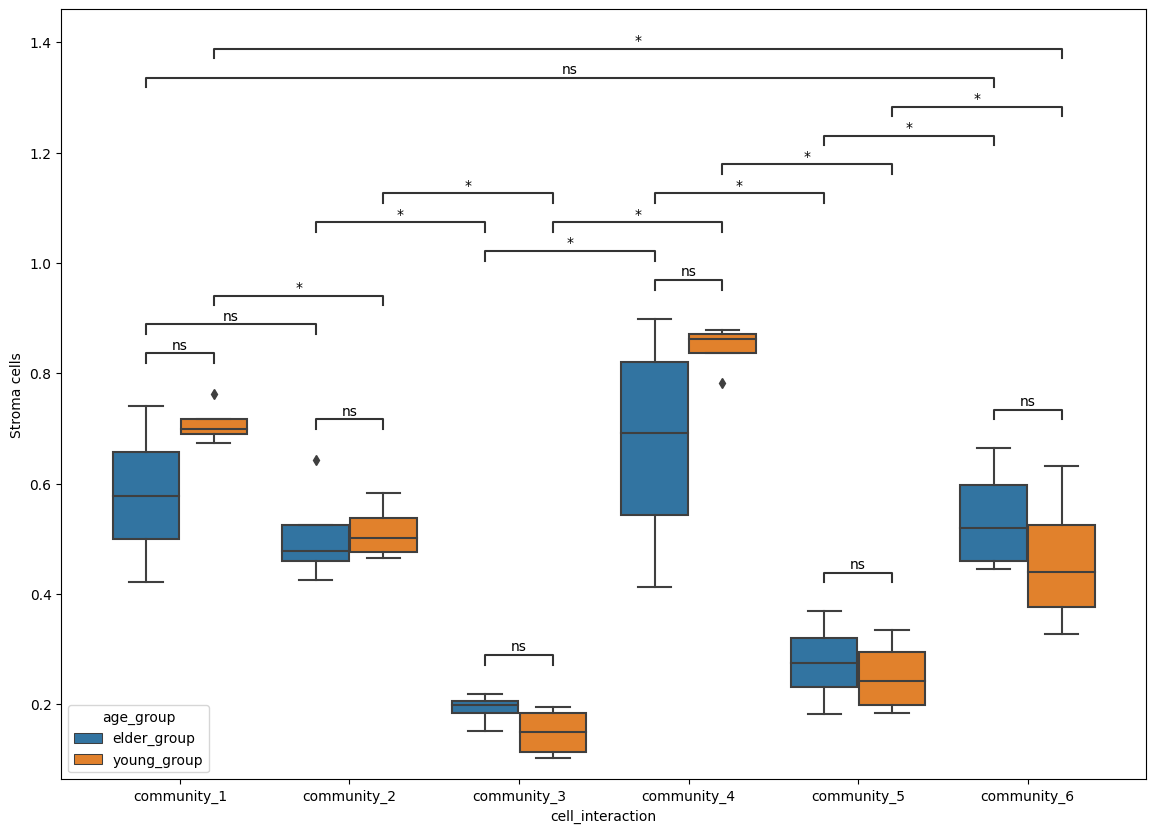

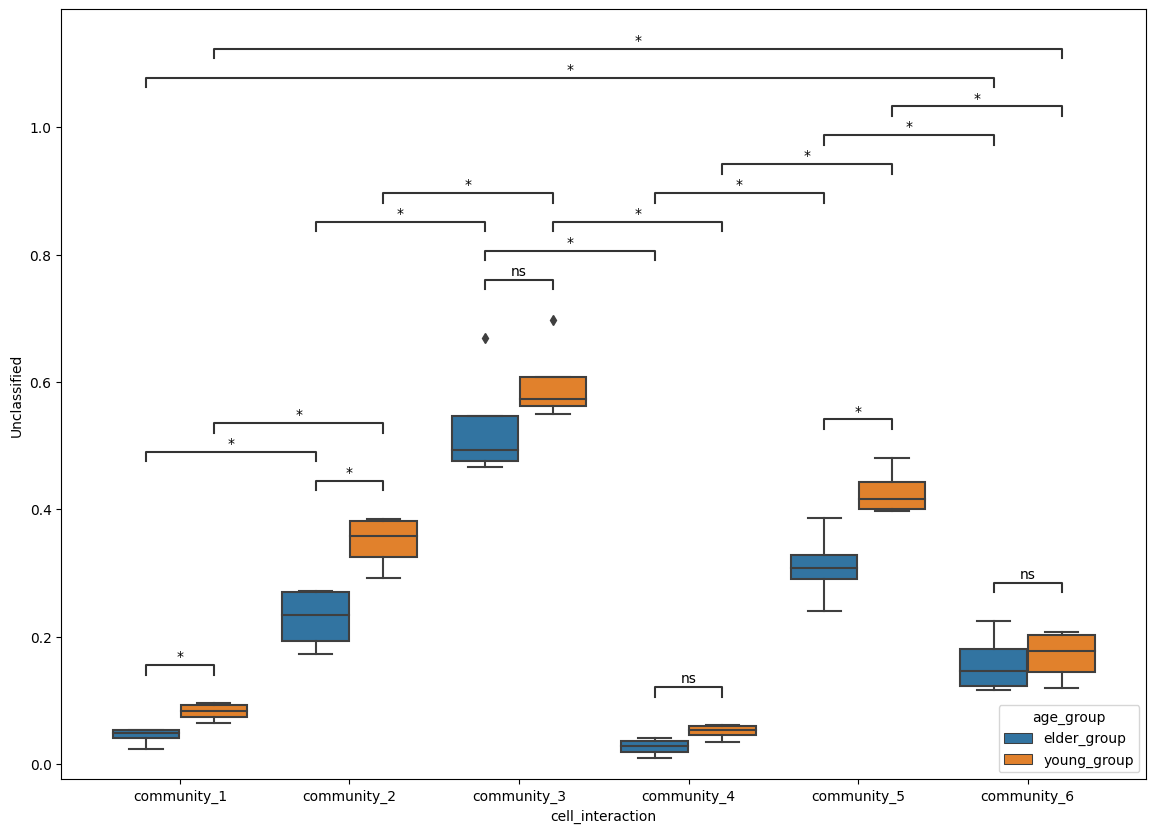

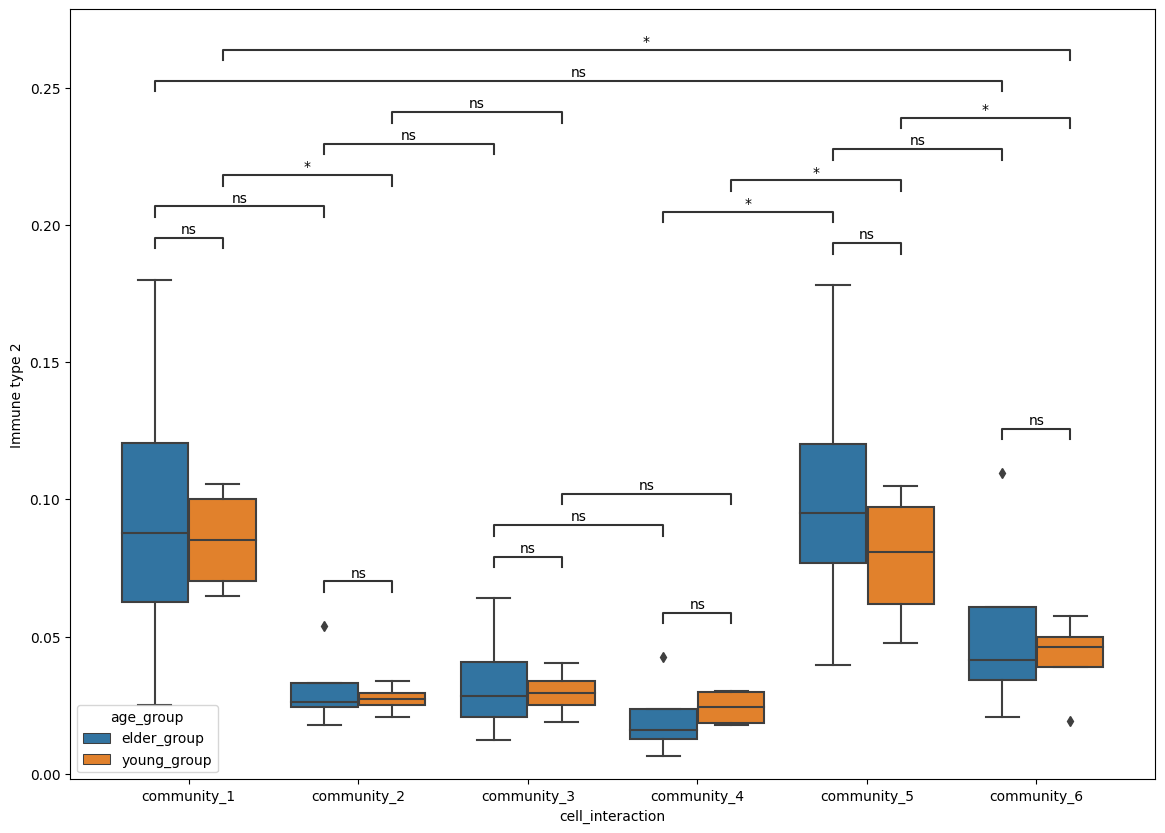

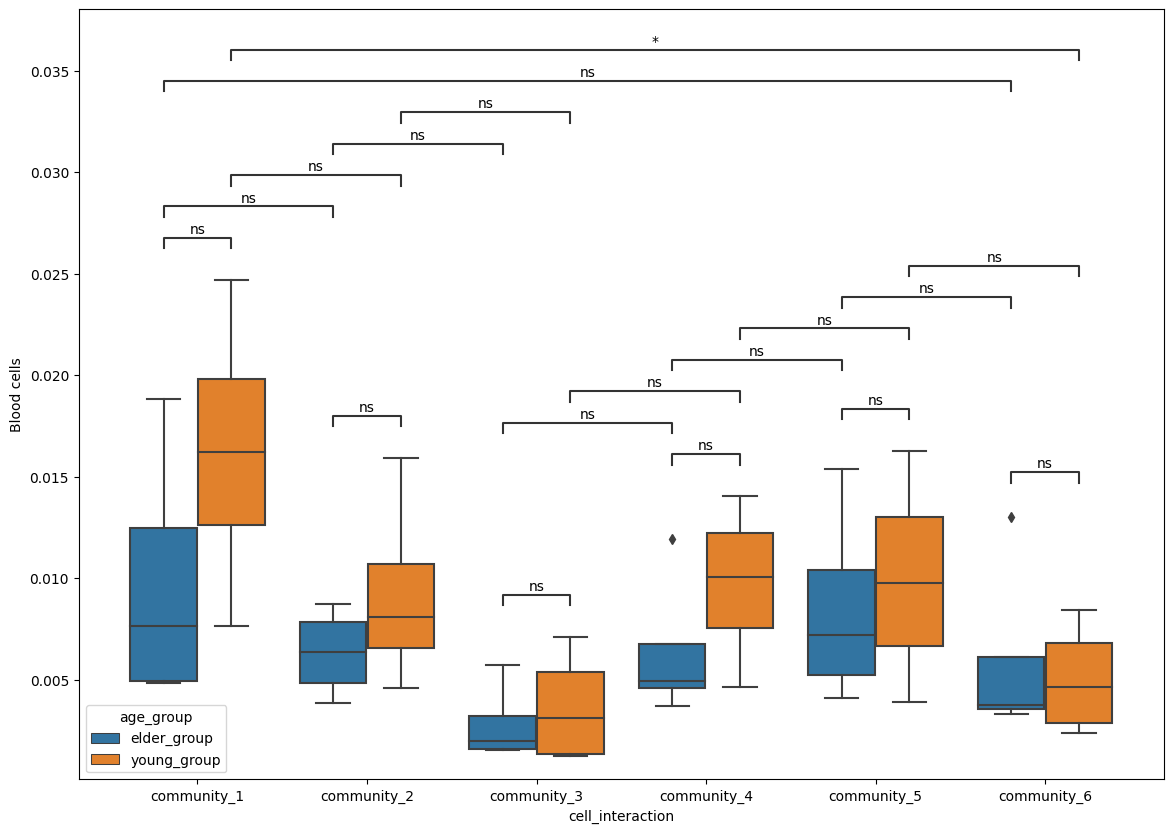

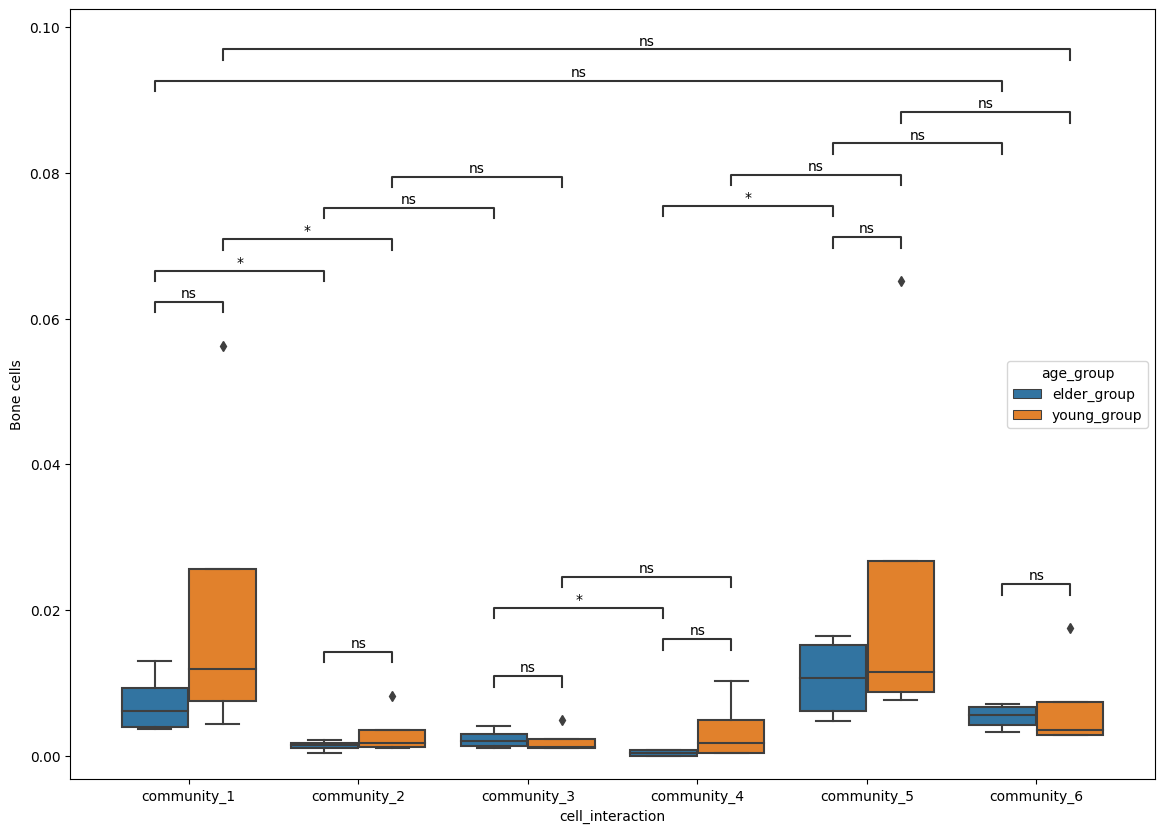

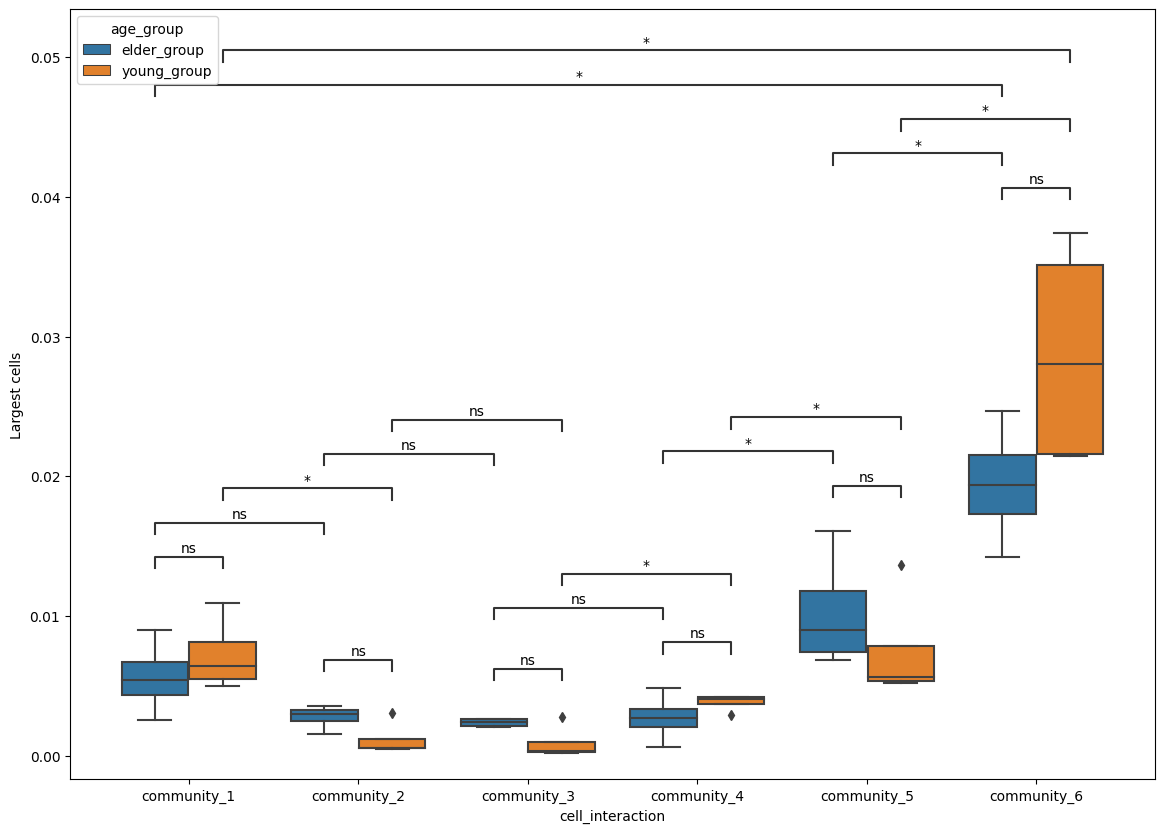

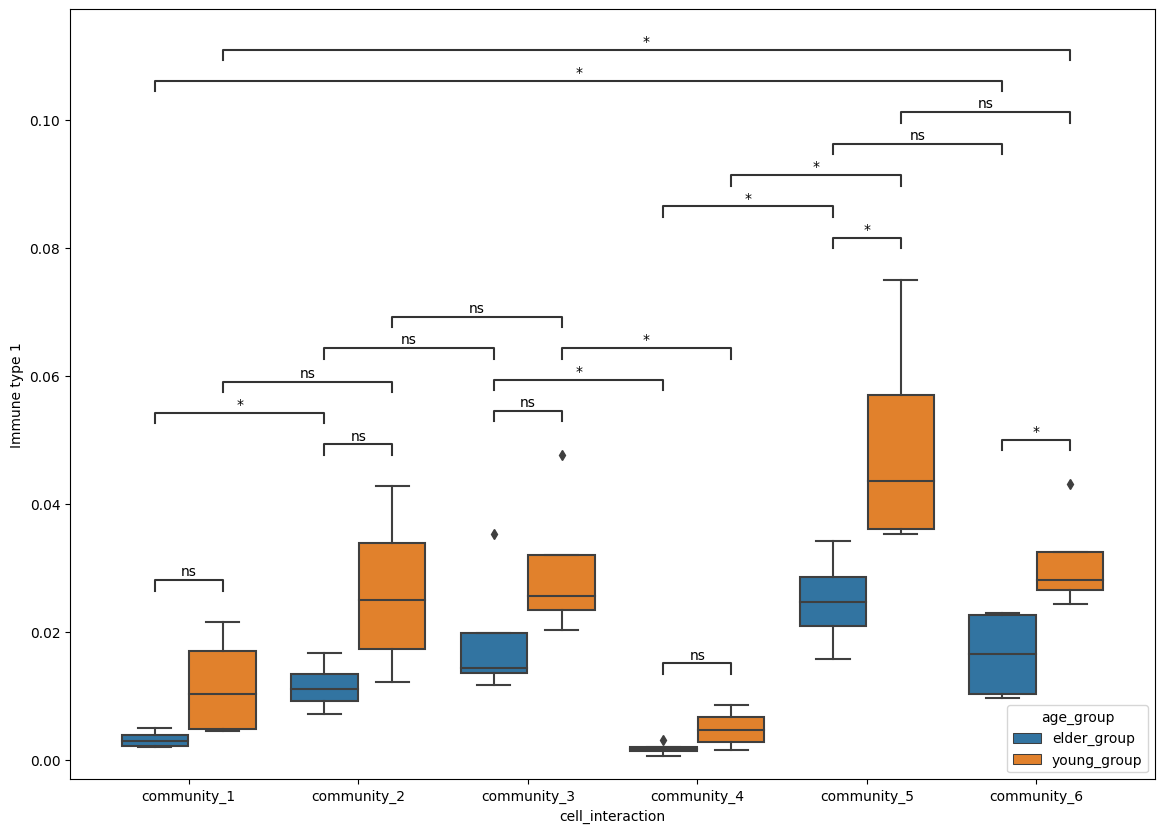

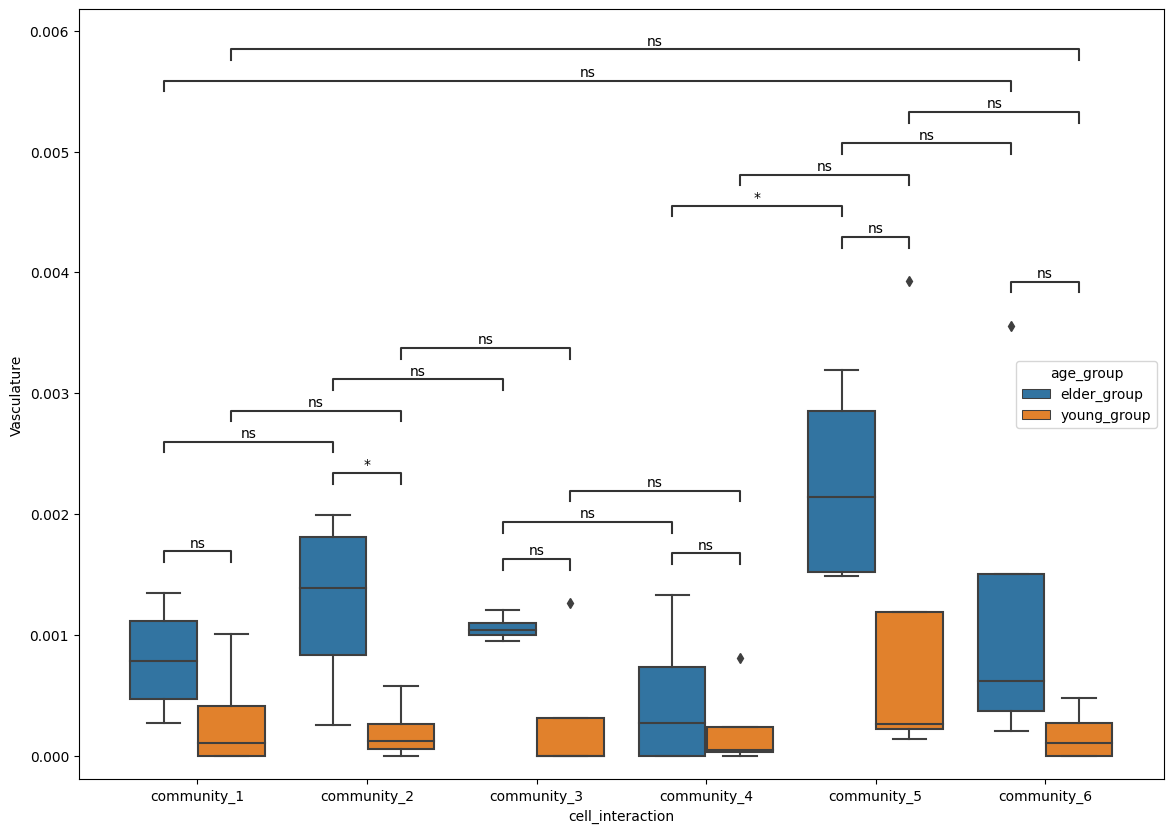

In [553]:
for i in df['cell_type'].unique():
    x='cell_interaction'
    y = i
    hue = 'age_group'

    hue_order=['elder_group','young_group']
    pairs = [
        ((i, 'elder_group'), (i, 'young_group'))
        for i in community_cell_count['cell_interaction'].unique()
    ]

    pairs = pairs + [
        ((cell_interactions[i], j), (cell_interactions[i-1], j))
        for i in range(len(cell_interactions))
                for j in hue_order
    ]


    plt.figure(figsize=(14,10))
    ax = sns.boxplot(
    data=community_cell_count, x='cell_interaction',
    y = y, hue=hue, hue_order=hue_order
    )

    annotator = Annotator(ax, pairs, data=community_cell_count, x=x, y=y,hue_order=hue_order, hue=hue)
    annotator.configure(test='Kruskal', text_format='star', loc='inside')
    annotator.apply_and_annotate()

In [1]:
H0 = 'Доля клеток в разных клетках одинаковая'
HA = 'Доля клеток различается в разных клетках'

Выводы:

1.Стромальные клетки - у пожилых окружение 1-окружение 2, окружение 1 - окружение 6 доля клеток одинакова, в остальных имеется стат.разница; у молодых - везде наблюдается разница в окружении

2.Неклассифицируемые клетки - везде имееться  стат. разница => H0 отвергается.

3.Имунные клетки 2 - у пожилых ОКР1-ОКР2, ОКР2-ОКР3, ОКР-3-ОКР4, ОКР5-ОКР6 равны, у них H0 остается, остальные имеют стат.разницу; у молодых - ОКР2-ОКР3, ОКР3-ОКР4 равны (у них H0 остается), у остальных стат.разница.

4.Клетки крови - у пожилых все равные (у всех остается H0), у молодых только ОКР1-ОКР6 различные

5.Костные клетки  - у пожилых ОКР2-ОКР3, ОКР5-ОКР6 равны (остается Н0); у молодых ОКР2-ОКР3, ОКР3-ОКР4, ОКР4-5, ОКР5-ОКР6 равны (остается Н0, хотя по графику 5-6 сомнительно)

6.Больние клетки - у пожилых ОКР1-2, ОКР2-3, ОКР 3-4 равны (остается Н0); у молодых ОКР2-3 равны (остается Н0)

7.Иммунные клетки 1 - у пожилых ОКР 2-3, ОКР5-6 равные(остаестя Н0); у молодых ОКР 1-2, ОКР 2-3, ОКР5-6 равны (остается Н0)

8.Сосудистые клетки - у пожилых ОКР 1-2, ОКР2-3, ОКР 3-4, ОКР 5-6 равны (остаестя Н0); у молодых все равны (у все остается Н0)

    4 Вопрос. Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

Если я правильно понял задачу то выборка будет только из молодых пациентов. Делим эту выборку на две: молодые с иуммными клетками молодые с стромальными клетками и сравниваем их расстояния.

In [554]:
young_immun = pandasql.sqldf("""
    SELECT 
        age_group,
        cell_type,
        distance_to_vasculature,
        distance_to_largest_cell
    FROM df
    WHERE (cell_type = 'Immune type 2'
        OR cell_type = 'Immune type 1')
        AND age_group = 'young_group'
    ORDER BY  cell_type;""")

In [555]:
young_stroma = pandasql.sqldf("""
    SELECT 
        age_group,
        cell_type,
        distance_to_vasculature,
        distance_to_largest_cell
    FROM df
    WHERE cell_type = 'Stroma cells'
        AND age_group = 'young_group'
    ORDER BY  cell_type;""")

In [556]:
test = [i for i in young_immun['distance_to_vasculature']]
control = [i for i in young_stroma['distance_to_vasculature']]

In [557]:
np.random.shuffle(test)
np.random.shuffle(control)

In [558]:
len(test), np.sum(test)

(12639, 12047012.929208785)

In [559]:
len(control), np.sum(control)

(127408, 124562141.27052422)

In [560]:
def my_func(sample1, sample2):
    mean1 = np.sum(sample1) / len(sample1)
    mean2 = np.sum(sample2) / len(sample2)

    ME = mean1 - mean2
    return ME * 100

In [561]:
results = []
for i in range(10_000):
    sample1 = np.random.choice(control, young_stroma.shape[0], replace=True)
    sample2 = np.random.choice(test, young_immun.shape[0], replace=True)
    results.append(my_func(sample1, sample2))

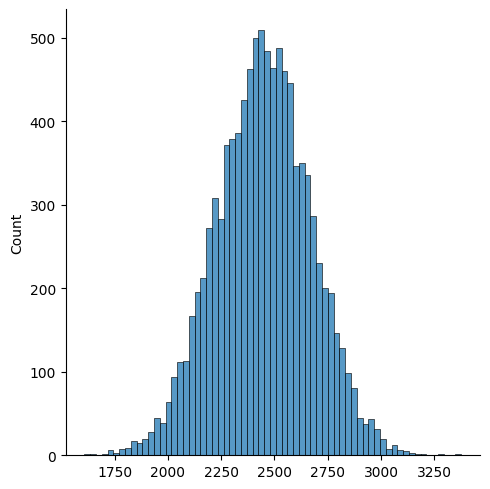

In [562]:
sns.displot(results);

In [563]:
np.std(results)

221.55000997946496

In [564]:
np.quantile(results, 0.025), np.percentile(results, 2.5)

(2012.2523069088106, 2012.2523069088106)

In [565]:
np.quantile(results, 0.975), np.percentile(results, 97.5)

(2871.7866799941003, 2871.7866799941003)

In [566]:
#Bootstrap для расстояния до сосудистых клеток у молодых
#между имунными и стромальными клетками
(2013.8552153656533, 2889.4456388125323)

(2013.8552153656533, 2889.4456388125323)

Иммунные клетки ближе лежат к сосудам, чем стромальные у молодых

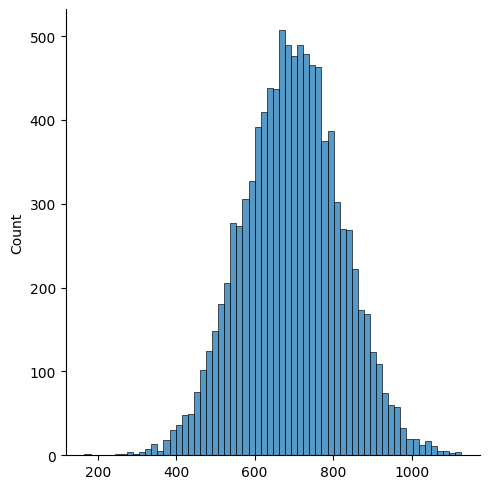

In [567]:
test = [i for i in young_immun['distance_to_largest_cell']]
control = [i for i in young_stroma['distance_to_largest_cell']]

def my_func(sample1, sample2):
    mean1 = np.sum(sample1) / len(sample1)
    mean2 = np.sum(sample2) / len(sample2)

    ME = mean1 - mean2
    return ME * 100

results = []
for i in range(10_000):
    sample1 = np.random.choice(control, young_stroma.shape[0], replace=True)
    sample2 = np.random.choice(test, young_immun.shape[0], replace=True)
    results.append(my_func(sample1, sample2))

sns.displot(results)

In [568]:
np.std(results)

125.258326657912

In [569]:
np.quantile(results, 0.025), np.percentile(results, 2.5)

(450.4249106475382, 450.4249106475382)

In [570]:
np.quantile(results, 0.975), np.percentile(results, 97.5)

(937.8110881641671, 937.8110881641671)

In [571]:
#Bootstrap для расстояния до Больших клеток
(442.7884342777213, 932.566985137424)

(442.7884342777213, 932.566985137424)

Имунные клетки распологаються дальше к большим х клеткам, чем стромальные.

    5 Вопрос. Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? Эту гипотезу необходимо проверить пермутационным тестом. В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n), запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей! колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой. Проверяем гипотезы. Комбинировать p-values для каждой возрастной группы можно с помощью этого инструмента: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html

In [572]:
H0 = 'Расстояние одинаковое'
HA = 'Клетки молодых пациентов лежат ближе к сосудам'

In [573]:
test_df = pandasql.sqldf(""" 
    SELECT
        case_id,
        age_group,
        cell_type,
        distance_to_vasculature
    FROM df
    WHERE 
        cell_type = 'Immune type 1'
        OR cell_type = 'Immune type 2'
    ORDER BY age_group, case_id, cell_type;""")

In [574]:
test_df_young = test_df[test_df['age_group'] == 'young_group']

In [575]:
y = np.array(test_df_young['distance_to_vasculature'])
y
N=len(y)


In [576]:
y

array([ 704.83078042,  930.56316729, 1203.41042736, ...,  916.56240848,
       1105.7562383 ,  747.26684149])

In [577]:
x = np.array(df['distance_to_vasculature'])

In [578]:
results = []

In [579]:
for i in range(1000):
    results.append(stats.mannwhitneyu(np.random.choice(x, N, replace=True), y))

In [580]:
results

[MannwhitneyuResult(statistic=75546536.5, pvalue=8.871627883361978e-14),
 MannwhitneyuResult(statistic=75344953.5, pvalue=5.988120628830301e-15),
 MannwhitneyuResult(statistic=74207376.5, pvalue=1.5879350577238766e-22),
 MannwhitneyuResult(statistic=75163247.5, pvalue=4.761568885323723e-16),
 MannwhitneyuResult(statistic=74910750.0, pvalue=1.202453418500404e-17),
 MannwhitneyuResult(statistic=75302585.0, pvalue=3.347064054891464e-15),
 MannwhitneyuResult(statistic=74885760.0, pvalue=8.270415248496186e-18),
 MannwhitneyuResult(statistic=74817433.5, pvalue=2.944777003065702e-18),
 MannwhitneyuResult(statistic=75077320.5, pvalue=1.3904590445890054e-16),
 MannwhitneyuResult(statistic=75119112.5, pvalue=2.5371116932078906e-16),
 MannwhitneyuResult(statistic=75189999.0, pvalue=6.954492420117909e-16),
 MannwhitneyuResult(statistic=74434658.5, pvalue=7.022994090613352e-21),
 MannwhitneyuResult(statistic=74707743.0, pvalue=5.452924997391112e-19),
 MannwhitneyuResult(statistic=74953794.0, pvalue

In [581]:
comb_p = stats.combine_pvalues(results[1], method='fisher', weights=None)
comb_p

(29.222822553575654, 7.043473336215947e-06)

Т.к. Комбинированное p-value < 0.05 => мы отвергаем нулевую гипотузе и приходим к мысли, что вероятнее всего иммунные клетки лежат ближе к сосудам у молодых. 

Это можно подтвердить, если рассмотреть задание № 1 в).